## weekdays_datasets

In [16]:
import pandas as pd
import numpy as np
import sys
import os

# Allows importing modules defined inside the project directory:
path = os.path.abspath(os.path.curdir)
while len(path) > 1 and not path.endswith('Mestrado'):
    path = os.path.abspath(os.path.join(path, '..'))
if path not in sys.path:
    sys.path.append(path)
sys.path.append('./MultiRocket')
print(sys.path)


['/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9', '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/carolina/Desktop/Mestrado/.venv/lib/python3.9/site-packages', '/Users/carolina/Desktop/Mestrado', './MultiRocket']


In [2]:
df = pd.read_csv('weekdays_datasets/df_timeseries.csv')

Colunas CSV em weekdays_dataset.zip

h00-h23: Faixa de popularidade (0-1) entre meia-noite e onze da noite

country: 0 - Brasil, 1 - Estados Unidos

city: 0 - Curitiba, 1 - Rio de Janeiro, 2 - São Paulo, 0 - Chicago, 1 - New York, 2 - San Francisco

category: 0 - bakeries, 1 - bars, 2 - coffee, 3 - dance clubs, 4 - restaurants

In [3]:
df

id       h00       h01  h02  h03  h04  h05       h06       h07  \
0          0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
1          1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
2          2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
3          3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251   
4          4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529   
...      ...       ...       ...  ...  ...  ...  ...       ...       ...   
12699  12699  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12700  12700  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12701  12701  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12702  12702  0.474252  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000   
12703  12703  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   

            h08  ...       h17       h18       h19       h20       h21  \
0      0.000000  ...  0.347754  0.522437  0.940441  0.823425  0.000000   
1      0.000000  ...  0.320058  0.212006  0.212006  0.212006  0.000000   
2      0.000000  ...  0.805263  0.483633  0.000000  0.000000  0.000000   
3      0.519247  ...  0.986970  0.917125  0.562874  0.378466  0.000000   
4      0.172893  ...  0.878997  0.994609  0.901742  0.667729  0.387283   
...         ...  ...       ...       ...       ...       ...       ...   
12699  0.000000  ...  0.430487  0.759348  0.991525  0.870099  0.588773   
12700  0.000000  ...  0.192508  0.564814  0.973335  0.966669  0.548366   
12701  0.000000  ...  0.571624  0.201609  0.144007  0.334674  0.000000   
12702  0.000000  ...  0.341396  0.630530  0.810973  0.971333  1.000000   
12703  0.000000  ...  0.341672  0.531967  0.812802  0.982816  0.000000   

            h22       h23  country  city  category  
0      0.000000  0.000000      0.0   0.0       0.0  
1      0.000000  0.000000      0.0   0.0       0.0  
2      0.000000  0.000000      0.0   0.0       0.0  
3      0.000000  0.000000      0.0   0.0       0.0  
4      0.000000  0.000000      0.0   0.0       0.0  
...         ...       ...      ...   ...       ...  
12699  0.000000  0.000000      1.0   4.0       4.0  
12700  0.000000  0.000000      1.0   4.0       4.0  
12701  0.000000  0.000000      1.0   4.0       4.0  
12702  0.897192  0.743494      1.0   4.0       4.0  
12703  0.000000  0.000000      1.0   4.0       4.0  

[12704 rows x 28 columns]

In [4]:
from sklearn.model_selection import train_test_split

df_x = df.drop(columns=['id','country', 'city', 'category'])
df_y = df['category']

X, y = np.array(df_x), np.array(df_y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)
print(X_train.shape, X_test.shape)

(9528, 24) (3176, 24)


## HIVECOTEV2

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.sklearn import RotationForest

hc2_classifier = HIVECOTEV2(
    stc_params={
        "estimator": RotationForest(n_estimators=3),
        "n_shapelet_samples": 100,
        "max_shapelets": 10,
        "batch_size": 20,
    },
    drcif_params={"n_estimators": 2, "n_intervals": 2, "att_subsample_size": 2},
    arsenal_params={"num_kernels": 50, "n_estimators": 3},
    tde_params={
        "n_parameter_samples": 10,
        "max_ensemble_size": 3,
        "randomly_selected_params": 5,
    },
)
hc2_classifier.fit(X_train, y_train)
print("predicting...")
hc2_pred = hc2_classifier.predict(X_test)
print("results...")
print(accuracy_score(y_test, hc2_pred))
print(f1_score(y_test, hc2_pred, average='weighted'))

predicting...
results...
0.6656171284634761
0.6632040546351051


In [8]:
print(precision_score(y_test, hc2_pred, average='weighted'))
print(recall_score(y_test, hc2_pred, average='weighted'))

0.6653788988462582
0.6656171284634761


validating signatures

In [51]:
hc2_pred_sig = hc2_classifier.predict(Xs)
print("validating signatures...")
accuracy_score(ys, hc2_pred_sig)

validating signatures...


0.4

## Hydra

In [9]:
import torch

X_train_tensor = torch.tensor(np.expand_dims(X_train, axis=1), dtype=torch.float32)
X_test_tensor = torch.tensor(np.expand_dims(X_test, axis=1), dtype=torch.float32)
X_train_tensor.shape

torch.Size([9528, 1, 24])

In [10]:
X_test_tensor.shape

torch.Size([3176, 1, 24])

In [11]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

transform = Hydra(X_train.shape[-1])

X_training_transform = transform(X_train_tensor)
X_test_transform = transform(X_test_tensor)

scaler = SparseScaler()

X_training_transform = scaler.fit_transform(X_training_transform)
X_test_transform = scaler.transform(X_test_transform)

hydra_classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
hydra_classifier.fit(X_training_transform, y_train)

hydra_pred = hydra_classifier.predict(X_test_transform)
print(accuracy_score(y_test, hydra_pred))
print(f1_score(y_test, hydra_pred, average='weighted'))

0.677896725440806
0.6756224614268075


In [16]:
X_test_transform.shape

torch.Size([3176, 2048])

In [17]:
print(precision_score(y_test, hydra_pred, average='weighted'))
print(recall_score(y_test, hydra_pred, average='weighted'))

0.6854186662227635
0.6854534005037783


In [58]:
hydra_pred_sig = hydra_classifier.predict(transform(torch.tensor(np.expand_dims(Xs, axis=1), dtype=torch.float32)))
accuracy_score(ys, hydra_pred_sig)

0.4

In [18]:
from multirocket.multirocket import MultiRocket
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# returns ntc format, remove the last dimension
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

nb_classes = len(np.unique(np.concatenate((y_train, y_test), axis=0)))

mrocket_classifier = MultiRocket(
    num_features=50000,
    classifier="logistic",
    verbose=2,
)
yhat_train = mrocket_classifier.fit(
    X_train, y_train,
    predict_on_train=False
)
mrocket_pred = mrocket_classifier.predict(X_test)
print(accuracy_score(y_test, mrocket_pred))
print(f1_score(y_test, mrocket_pred, average='weighted'))

[MultiRocket] Creating MultiRocket with 6250 kernels
[MultiRocket] Training with training set of (9528, 24)
[MultiRocket] Kernels applied!, took 58.84903979500086s
[MultiRocket] Transformed Shape (9528, 49728)
[MultiRocket] Training


epoch: 51:  81%|████████  | 30/37 [00:01<00:00, 16.71it/s]



<Stopped at Epoch 52>
[MultiRocket] Training done!, took 349.745s
[MultiRocket] Predicting
Kernels applied!, took 1.929s. Transformed shape: (3176, 49728).
[MultiRocket] Predicting completed, took 2.435s
0.6870277078085643
0.687774729770496


In [19]:
print(precision_score(y_test, mrocket_pred, average='weighted'))
print(recall_score(y_test, mrocket_pred, average='weighted'))

0.6893011022948712
0.6870277078085643


# Distance based: classification is based on some time series specific distance measure between series

Distance based classifiers use a distance function to measure the similarity between time series.

## Rank 1 Proximity Forest

In [10]:
# Rank 1 Proximity Forest
from sktime.classification.distance_based import ProximityForest


In [ ]:
clf_pf = ProximityForest(
    n_estimators=2, max_depth=2, n_stump_evaluations=1
) 

In [ ]:

clf_pf.fit(X_train, y_train) 
y_pred_pf = clf_pf.predict(X_test) 

In [ ]:
print(accuracy_score(y_test, y_pred_pf))
print(f1_score(y_test, y_pred_pf, average='weighted'))
print(precision_score(y_test, y_pred_pf, average='weighted'))
print(recall_score(y_test, y_pred_pf, average='weighted'))

## Rank 2 Elastic Ensemble

In [15]:
from aeon.classification.distance_based import ElasticEnsemble

clf_ee = ElasticEnsemble(
    proportion_of_param_options=0.1,
    proportion_train_for_test=0.1,
    distance_measures = ["dtw","ddtw"],
    majority_vote=True,
)
clf_ee.fit(X_train, y_train)

y_pred_ee = clf_ee.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred_ee)

0.589735516372796

In [20]:
f1_score(y_test, y_pred_ee, average='weighted')

0.5885390583618273

In [21]:
precision_score(y_test, y_pred_ee, average='weighted')

0.5990188071138511

In [22]:
recall_score(y_test, y_pred_ee, average='weighted')

0.589735516372796

# Feature based: global features are extracted and passed to a standard clas- sifier in a simple pipeline

## Rank 1 FreshPrince

In [23]:
from sktime.classification.feature_based import FreshPRINCE
#from sktime._contrib.vector_classifiers._rotation_forest import RotationForest

clf_freshPRINCE = FreshPRINCE(
    default_fc_parameters="minimal",
    n_estimators=5,
)
clf_freshPRINCE.fit(X_train, y_train)
FreshPRINCE(...)
y_pred_freshPRINCE = clf_freshPRINCE.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred_freshPRINCE)

0.4905541561712846

In [25]:
f1_score(y_test, y_pred_freshPRINCE, average='weighted')

0.49030754338841764

In [26]:
precision_score(y_test, y_pred_freshPRINCE, average='weighted')

0.49140357099664395

In [27]:
recall_score(y_test, y_pred_freshPRINCE, average='weighted')

0.4905541561712846

## Rank 2 TSFResh

In [28]:
from sktime.classification.feature_based import TSFreshClassifier
from sklearn.ensemble import RandomForestClassifier

clfTSFresh = TSFreshClassifier(
    default_fc_parameters="minimal",
    estimator=RandomForestClassifier(n_estimators=5),
)
clfTSFresh.fit(X_train, y_train)
TSFreshClassifier(...)
y_pred_TSFresh = clfTSFresh.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred_TSFresh)

0.46914357682619645

In [30]:
f1_score(y_test, y_pred_TSFresh, average='weighted')

0.4687427222431061

In [31]:
precision_score(y_test, y_pred_TSFresh, average='weighted')

0.4708554199790814

In [32]:
recall_score(y_test, y_pred_TSFresh, average='weighted')

0.46914357682619645

# Interval based: features are derived from selected phase dependent intervals in an ensemble of pipelines

Interval based classifiers adopt a random forest ensemble model, where each base classifier is a pipeline of transformation and a tree classifier

## Rank 1 DrCIF

The Diverse Representation Canonical Interval Forest (DrCIF)

In [33]:
from aeon.classification.compose import ChannelEnsembleClassifier
from aeon.classification.interval_based import DrCIFClassifier

from aeon.classification.convolution_based import RocketClassifier


cls_DrCIF = ChannelEnsembleClassifier(
    estimators=[
        ("DrCIF0", DrCIFClassifier(n_estimators=5, n_intervals=2), [0]),
        #("ROCKET3", RocketClassifier(num_kernels=1000), [3, 4]),
    ]
)

cls_DrCIF.fit(X_train, y_train)
y_pred_DrCIF = cls_DrCIF.predict(X_test)

accuracy_score(y_test, y_pred_DrCIF)

0.6347607052896725

In [34]:
f1_score(y_test, y_pred_DrCIF, average='weighted')

0.6334609409152372

In [35]:
precision_score(y_test, y_pred_DrCIF, average='weighted')

0.6366439143952461

In [36]:
recall_score(y_test, y_pred_DrCIF, average='weighted')

0.6347607052896725

## Rank 2 rSTSF

In [37]:
# Nestor Cabello, Elham Naghizade, Jianzhong Qi, Lars Kulik
# Fast, accurate and explainable time series classification through randomization.
# Data Min Know Disc (2023)

from rSTSF_functions import *

In [38]:
##Parameters that r-STSF uses

# Statistics or aggregation functions
# Note: np.percentile and np.quantile are just used as identifiers for 
# count mean-crossings (cmc) and count of values above mean (cam) statistics. See function getIntervalFeature(...)
agg_fns = [np.mean, np.std, np.polyfit, np.median, np.min, np.max, iqr, np.percentile, np.quantile]
repr_types = [1,2,3,4] # 1: Raw series, 2: Periodogram, 3: First-order Difference, 4: Autoregressive
d = 50 # Number of sets of candidate discriminatory interval features to compute
r = 500 # Number of trees

In [39]:
clf_rSTSF = rstsf(agg_fns=agg_fns, repr_types=repr_types[:1], d=1, r=2)
clf_rSTSF.fit(X_train,y_train)

In [40]:
dset_names = ["PopularTimesGoogle"]

nruns = 10

accuracies = np.zeros((len(dset_names),nruns))
training_times = []
testing_times = []

cont_dsets = 0
for dset_name in dset_names:
    print("Dataset: ", dset_name)

    inner_training_time = []
    inner_testing_time = []
    
    for nrun in range(nruns):
        print('run ',str(nrun+1))
        timeA = time.perf_counter()
        
        clf_rstsf = rstsf()
        clf_rstsf.fit(X_train, y_train)

        current_training_time = time.perf_counter()-timeA
        inner_training_time.append(current_training_time)
        print(f"training time: {current_training_time}")

        timeA = time.perf_counter()
        
        y_pred_rSTSF = clf_rstsf.predict(X_test)


        current_testing_time = time.perf_counter()-timeA
        inner_testing_time.append(current_testing_time)
        print(f"testing time: {current_testing_time}")

        accu = np.sum(y_pred_rSTSF==y_test)/len(y_test)
        print('accuracy: ', accu)
        accuracies[cont_dsets,nrun] = accu

    avg_accuracy_this_dataset = np.mean(accuracies[cont_dsets,:])
    print('avg accuracy for ' + str(nruns) + ' runs: ' , avg_accuracy_this_dataset)
    
    training_times.append(np.mean(inner_training_time))
    testing_times.append(np.mean(inner_testing_time))

    cont_dsets+=1
    print("\n")


## comment/uncomment the lines below according to the number of runs
columns = {'Dataset':dset_names,
           'run1':accuracies[:,0],
               'run2':accuracies[:,1],
               'run3':accuracies[:,2],
               'run4':accuracies[:,3],
               'run5':accuracies[:,4],
               'run6':accuracies[:,5],
               'run7':accuracies[:,6],
               'run8':accuracies[:,7],
               'run9':accuracies[:,8],
               'run10':accuracies[:,9],
           'avgAccu':np.mean(accuracies,axis=1),
           'avgTrainTime':np.array(training_times),'avgTestTime':np.array(testing_times)}
dfResults = pd.DataFrame(columns)
dfResults = dfResults[['Dataset',
                       'run1',
                           'run2',
                           'run3',
                           'run4',
                           'run5',
                           'run6',
                           'run7',
                           'run8',
                           'run9',
                           'run10',
                       'avgAccu','avgTrainTime','avgTestTime'
                      ]]


Dataset:  PopularTimesGoogle
run  1
training time: 342.3428565490758
testing time: 7.989115440985188
accuracy:  0.6700251889168766
run  2
training time: 373.0023939309176
testing time: 8.767640887992457
accuracy:  0.6719143576826196
run  3
training time: 334.70174548903015
testing time: 8.056428803014569
accuracy:  0.6706549118387909
run  4
training time: 323.02789966901764
testing time: 7.759123441996053
accuracy:  0.6715994962216625
run  5
training time: 321.23077849298716
testing time: 8.063391536008567
accuracy:  0.6728589420654912
run  6
training time: 316.4782361430116
testing time: 7.529486718005501
accuracy:  0.6712846347607053
run  7
training time: 308.3886265089968
testing time: 6.814754399936646
accuracy:  0.672544080604534
run  8
training time: 280.0867270290619
testing time: 6.571802795981057
accuracy:  0.6712846347607053
run  9
training time: 277.16675790795125
testing time: 6.764572376036085
accuracy:  0.6706549118387909
run  10
training time: 287.4950323109515
testing t

In [56]:
accu

0.6731738035264484

In [42]:
accuracy_score(y_test, y_pred_rSTSF)

0.6731738035264484

In [43]:
f1_score(y_test, y_pred_rSTSF, average='weighted')

0.6720210125150334

In [44]:
precision_score(y_test, y_pred_rSTSF, average='weighted')

0.673909545319221

In [58]:
recall_score(y_test, y_pred_rSTSF, average='weighted')

0.6731738035264484

# Shapelet based: phase independent discriminatory subseries form the basis for classification

Shapelets are subseries from the training data that are independent of the phase and can be used to discriminate between classes of time series based on their presence or absence.

## Rank 1 Random Dilated Shapelet Transform (RDST)

In [59]:
from aeon.classification.shapelet_based import RDSTClassifier

rdst_AEON = RDSTClassifier()
rdst_AEON.fit(X_train, y_train)
y_pred_rdst_AEON = rdst_AEON.predict(X_test)


0.6926952141057935

In [60]:
accuracy_score(y_test, y_pred_rdst_AEON)

0.6926952141057935

In [61]:
f1_score(y_test, y_pred_rdst_AEON, average='weighted')

0.69105993209306

In [62]:
precision_score(y_test, y_pred_rdst_AEON, average='weighted')

0.6943262284065441

In [63]:
recall_score(y_test, y_pred_rdst_AEON, average='weighted')

0.6926952141057935

## Rank 2 MrSQM

Multiple Representations Sequence Miner

In [64]:
from mrsqm import MrSQMClassifier, MrSQMTransformer
from sklearn import metrics
from scipy.interpolate import interp1d
import timeit

from sklearn.linear_model import RidgeClassifierCV

In [65]:
#Train
clf_MrSQMC = MrSQMClassifier(nsax=0, nsfa=5)
clf_MrSQMC.fit(X_train,y_train)

y_pred_MrSQMC = clf_MrSQMC.predict(X_test)

Use MrSQM Transformer

In [66]:
tfm = MrSQMTransformer()
X_train_transform = tfm.fit_transform(X_train,y_train)
X_test_transform = tfm.transform(X_test)

In [67]:
# use ridgecv classifier
ridge = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10)).fit(X_train_transform,y_train)
y_pred_ridgecvt = ridge.predict(X_test_transform)
print(metrics.accuracy_score(y_test, y_pred_ridgecvt))

0.6621536523929471


In [68]:
accuracy_score(y_test, y_pred_ridgecvt)

0.6621536523929471

In [69]:
f1_score(y_test, y_pred_ridgecvt, average='weighted')

0.6593042743917886

In [70]:
precision_score(y_test, y_pred_ridgecvt, average='weighted')

0.6632592820905993

In [71]:
recall_score(y_test, y_pred_ridgecvt, average='weighted')

0.6621536523929471

# Dictionary based: histograms of counts of repeating patterns are the fea- tures for a classifier

Similar to shapelet based algorithms, dictionary approaches extract phase- independent subseries. However, instead of measuring the distance to a sub- series, each window is converted into a short sequence of discrete symbols, commonly known as a word.

## Rank 1 Weasel-D

In [72]:
from weasel.classification.dictionary_based import WEASEL_V2

clf_WEASEL_V2 = WEASEL_V2(random_state=1379, n_jobs=4)
clf_WEASEL_V2.fit(X_train,y_train)
y_pred_WEASEL_V2 = clf_WEASEL_V2.predict(X_test)

In [73]:
accuracy_score(y_test, y_pred_WEASEL_V2)

0.6914357682619647

In [74]:
f1_score(y_test, y_pred_WEASEL_V2, average='weighted')

0.6896066643131316

In [75]:
precision_score(y_test, y_pred_WEASEL_V2, average='weighted')

0.6921659392983183

In [76]:
recall_score(y_test, y_pred_WEASEL_V2, average='weighted')

0.6914357682619647

## Rank 2 Temporal Dictonary Ensemble (TDE)

combines the best improvements introduced in WEASEL, SpatialBOSS and cBOSS and also includes several novel features.

In [77]:
from sktime.classification.dictionary_based import TemporalDictionaryEnsemble

clf_TDE = TemporalDictionaryEnsemble(
    n_parameter_samples=10,
    max_ensemble_size=3,
    randomly_selected_params=5,
) 
clf_TDE.fit(X_train, y_train) 
y_pred_TDE = clf_TDE.predict(X_test) 

In [78]:
accuracy_score(y_test, y_pred_TDE)

0.6083123425692695

In [79]:
f1_score(y_test, y_pred_TDE, average='weighted')

0.6070893529185151

In [80]:
precision_score(y_test, y_pred_TDE, average='weighted')

0.6072339870959385

In [81]:
recall_score(y_test, y_pred_TDE, average='weighted')

0.6083123425692695

# Convolution based: convolutions and pooling operations create the feature space for classification 

In [ ]:
Hydra MultiRocket
MultiRocket
Hydra

# Deep learning based: neural network based classification

Deep learning has been the most active area of TSC research since the bake off in terms of the number of publications. 

## Rank 1 InceptionTime

In [82]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sktime.classification.deep_learning.inceptiontime import InceptionTimeClassifier

sns.set_style("whitegrid")

In [83]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [84]:
network = InceptionTimeClassifier(n_epochs=10000, verbose=False)
network.fit(X_train, y_train)

2024-04-21 13:42:05.005974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


InceptionTimeClassifier(n_epochs=10000)

In [85]:
network.score(X_test, y_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step


0.08847607052896725

In [86]:
y_pred_Inception = network.predict(X_test) 

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [87]:
accuracy_score(y_test, y_pred_Inception)

0.08847607052896725

In [88]:
f1_score(y_test, y_pred_Inception, average='weighted')

0.08545425766145792

In [89]:
precision_score(y_test, y_pred_Inception, average='weighted')

0.3009053455187936

In [90]:
recall_score(y_test, y_pred_Inception, average='weighted')

0.08847607052896725

## Rank 2 ResNet

In [91]:
from sktime.classification.deep_learning.resnet import ResNetClassifier
clf_resnet = ResNetClassifier(n_epochs=10000) 
clf_resnet.fit(X_train, y_train)
y_pred_resnet = clf_resnet.predict(X_test) 

199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
accuracy_score(y_test, y_pred_resnet)

In [ ]:
f1_score(y_test, y_pred_resnet, average='weighted')

In [ ]:
precision_score(y_test, y_pred_resnet, average='weighted')

In [ ]:
recall_score(y_test, y_pred_resnet, average='weighted')

# Hybrid approaches combine two or more of the above approaches

## Rank 1 HIVE-COTE version 2 (HC2)

## Rank 2 Time Series Combination of Heterogeneous and Integrated Embeddings Forest TS-CHIEF

não encontrei o código/biblioteca

## genetic algorithms

In [227]:
from scipy.optimize import minimize

N = 1
categ = 0
# X_ini = np.random.rand(N*24)
X_cat, y_cat = extract_x_y(df,0,0,categ)
X_avg = X_cat.mean(axis=0)
X_avg = np.pad(X_avg, ((2,2)), mode='constant', constant_values=0)

def fitness(X):
    X_np = np.array(X)
    X_sig = transform(torch.tensor(np.expand_dims(
        X_np.reshape(N,24),
        axis=1
    ), dtype=torch.float32))

    violated_constraints = np.maximum(0, X_np - 1.0) + np.maximum(0, 0.0 - X_np)
    penalty = sum(violated_constraints)
    distance = np.mean([np.min([np.linalg.norm(X_avg[x:x+24] - row) for x in range(5)]) for row in X_np.reshape(N, 24)])

    y = hydra_classifier.predict(X_sig)
    
    return accuracy_score([categ]*N, y), - penalty, - distance

# return accuracy_score([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5], y)
# return accuracy_score([0,1,2,3,4,5], y)
# res = minimize(fitness, X_ini, method = 'Nelder-Mead', options={'maxiter':100, 'disp':True,'fatol':0})
# res

In [234]:
# fitness(X_ini)

(0.0, -0.0, 130.93682658688874)

In [228]:
import numpy as np
import pygad

num_generations = 10000
num_parents_mating = 10
sol_per_pop = 50
num_genes = N*24

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=lambda ga, sol, i: fitness(sol),
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=0.0,
                       init_range_high=1.0,
                       random_mutation_min_val=-0.1,
                       random_mutation_max_val=0.1)

ga_instance.run()

print("Best solution:", ga_instance.best_solution())


/Users/carolina/anaconda3/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Best solution: (array([0.00263309, 0.01618933, 0.01411421, 0.01103476, 0.00979842,
       0.0100045 , 0.01517333, 0.01234704, 0.19178997, 0.39106192,
       0.48274228, 0.46821296, 0.43727749, 0.4649771 , 0.47091612,
       0.47754438, 0.5420403 , 0.681255  , 0.75840609, 0.67349862,
       0.45992342, 0.25251185, 0.21886793, 0.06653822]), array([ 0.        , -0.        , -0.01144639]), 0)


In [266]:
ga_instance.best_solution()

(array([0.00263309, 0.01618933, 0.01411421, 0.04375813, 0.00979842,
        0.0100045 , 0.01517333, 0.01234704, 0.19178997, 0.39106192,
        0.43725721, 0.46821296, 0.44570172, 0.4649771 , 0.45060536,
        0.47754438, 0.5420403 , 0.681255  , 0.75840609, 0.67349862,
        0.45992342, 0.25792517, 0.31360897, 0.06653822]),
 array([ 1.        , -0.        , -0.11469525]),
 1)

In [81]:
ga_instance.num_generations = 9000
ga_instance.run()
ga_instance.best_solution()

(array([ 5.46944954e-01,  5.26806322e+01,  1.83465219e-01,  2.74667180e+01,
         5.64513407e-02,  2.63797925e-02,  5.23544331e-02, -2.04524092e-02,
         4.93594479e-02,  2.62616546e-02, -4.04692241e-02, -1.37356289e-02,
         4.43397657e-02,  8.18210760e-02, -1.95037527e-02, -2.23579845e-02,
         1.79466506e-02,  6.77089101e-02,  2.32786422e-02,  3.88685292e-02,
         1.76799080e-01,  3.21938516e-01,  8.36681933e-02,  9.50888062e-02]),
 array([  1.        , -78.26386922,  -0.25194653]),
 3)

In [82]:
sorted(ga_instance.last_generation_fitness,key=lambda x: x[0])

[array([  0.        ,  -1.41546584, -56.92611833]),
 array([  0.        ,  -0.18383346, -58.11232558]),
 array([  0.        ,  -0.18049151, -58.0794686 ]),
 array([  0.        ,  -0.16070508, -58.07467507]),
 array([  0.        , -28.07736137, -50.12604016]),
 array([  0.        ,  -1.51885073, -56.92624906]),
 array([  0.        ,  -0.12792826, -58.11232965]),
 array([ 0.00000000e+00, -2.37488626e-02, -5.81088693e+01]),
 array([  0.        ,  -1.49581996, -56.92624338]),
 array([  0.        ,  -0.15873586, -58.11241399]),
 array([  0.        ,  -0.1760071 , -58.10881733]),
 array([  0.        , -28.15941101, -50.12610195]),
 array([  0.        , -28.0683204 , -50.20920956]),
 array([  0.        ,  -1.45678592, -56.92625747]),
 array([  0.        ,  -0.07962053, -58.08449087]),
 array([  0.        , -28.08991123, -50.1261175 ]),
 array([  0.        ,  -1.47246413, -56.92630037]),
 array([  0.        , -26.60253754, -51.69826368]),
 array([  0.        ,  -0.18780773, -58.0748694 ]),
 ar

In [229]:
ga_instance.generations_completed

10000

In [ ]:
fig = ga_instance.plot_fitness(label=['accuracy','penalty','distance'])
fig.legend()

In [ ]:
ga_instance.last_generation_fitness

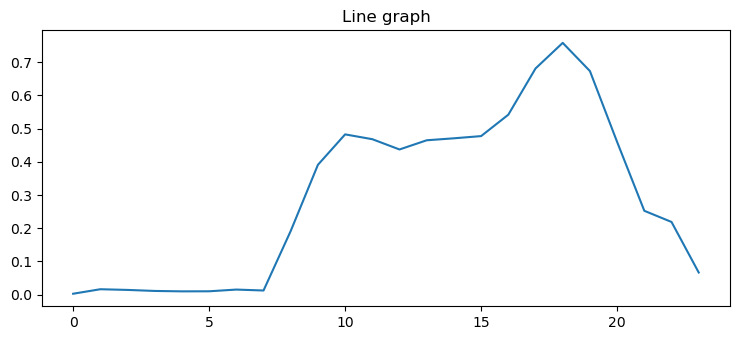

In [231]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

x = range(24)
y,fit,idx = ga_instance.best_solution()

plt.title("Line graph")
for y_ in np.array(y).reshape(N,24):
    plt.plot(x, y_)

plt.show()

In [232]:
ga_instance.save('ga_1sig_ng100_npm10_spp50_categ0_10000')

TRANSFORMERS
DTW VS TRANSFORMERS TIME SERIES
MÉTRICAS (f1-score)

OVERLEAF

ESTUDO (RELATÓRIO)
- CLASSIFICADORES (NOVAS TÉCNICAS)
- DEEP LEARNING (SUMARIZAÇÃO)
- OUTRAS TÉCNICAS (SUMARIZAÇÃO / LEVANTAMENTO)
- TESTES-PILOTO 
- USO DAS ASSINATURAS (parâmetros dos classificadores (talvez))

- aplicar em outros datasets

In [219]:
#teste
import numpy as np

# Define input signal and kernel
signal = np.array([0, 0, 1, 2, 3, 4, 5, 0, 0])
kernel = np.array([0, 0.5, 1, 1.5, 0])

# Perform 1D convolution
result = np.correlate(signal, kernel, mode='valid')

print("Convolution result:", result)
result.max()


13.0

In [17]:
#teste
two_d = np.array([
    [1,2],
    [3,4]
])

np.mean([np.correlate(
    np.array([1,2,3,4]),
    row
).max() for row in two_d])

18.0

## Reunião 16/02

*verificar se é bom ou não o uso de algoritmos genéticos

*comparar com a geração simples de signature pela média do dataframe

*ver os transformers

*ver se tem mais classificadores interessantes

*M2 do Leonardo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_filtrado = df[(df['country'] == 0) & (df['city'] == 0) & (df['category'] == 1)]
df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])

column_means = np.mean(df_teste, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), column_means)

plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('Mean of p=0 c=0 cat=0')

plt.show()

In [348]:
def extract_avg(country, city, cat):
    df_filtrado = df[(df['country'] == country) & (df['city'] == city) & (df['category'] == cat)]
    df_teste = df_filtrado.drop(columns=['id','country', 'city', 'category'])
    column_means = np.mean(df_teste, axis=0)
    return column_means

In [349]:
X_test_new = np.array([
    extract_avg(0,0,0),
    extract_avg(0,0,1),
    extract_avg(0,0,2),
    extract_avg(0,0,3),
    extract_avg(0,0,4)
    ])

In [353]:
X_test_tensor_new = torch.tensor(np.expand_dims(X_test_new, axis=1), dtype=torch.float32)
X_test_tensor_new.shape

torch.Size([5, 1, 24])

In [354]:
y_test_new = [0,1,2,3,4]

## New Hydra

In [356]:
from hydra import Hydra, SparseScaler
from sklearn.linear_model import RidgeClassifierCV

X_test_transform_new = transform(X_test_tensor_new)

X_test_transform_new = scaler.transform(X_test_transform_new)

hydra_pred_new = hydra_classifier.predict(X_test_transform_new)

print(accuracy_score(y_test_new, hydra_pred_new))
print(f1_score(y_test_new, hydra_pred_new, average='weighted'))

0.8
0.7333333333333333


In [40]:
df_timeseries = pd.read_csv('weekdays_datasets/df_timeseries.csv')

In [41]:
df_timeseries

id       h00       h01  h02  h03  h04  h05       h06       h07  \
0          0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
1          1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
2          2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
3          3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251   
4          4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529   
...      ...       ...       ...  ...  ...  ...  ...       ...       ...   
12699  12699  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12700  12700  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12701  12701  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12702  12702  0.474252  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000   
12703  12703  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   

            h08  ...       h17       h18       h19       h20       h21  \
0      0.000000  ...  0.347754  0.522437  0.940441  0.823425  0.000000   
1      0.000000  ...  0.320058  0.212006  0.212006  0.212006  0.000000   
2      0.000000  ...  0.805263  0.483633  0.000000  0.000000  0.000000   
3      0.519247  ...  0.986970  0.917125  0.562874  0.378466  0.000000   
4      0.172893  ...  0.878997  0.994609  0.901742  0.667729  0.387283   
...         ...  ...       ...       ...       ...       ...       ...   
12699  0.000000  ...  0.430487  0.759348  0.991525  0.870099  0.588773   
12700  0.000000  ...  0.192508  0.564814  0.973335  0.966669  0.548366   
12701  0.000000  ...  0.571624  0.201609  0.144007  0.334674  0.000000   
12702  0.000000  ...  0.341396  0.630530  0.810973  0.971333  1.000000   
12703  0.000000  ...  0.341672  0.531967  0.812802  0.982816  0.000000   

            h22       h23  country  city  category  
0      0.000000  0.000000      0.0   0.0       0.0  
1      0.000000  0.000000      0.0   0.0       0.0  
2      0.000000  0.000000      0.0   0.0       0.0  
3      0.000000  0.000000      0.0   0.0       0.0  
4      0.000000  0.000000      0.0   0.0       0.0  
...         ...       ...      ...   ...       ...  
12699  0.000000  0.000000      1.0   4.0       4.0  
12700  0.000000  0.000000      1.0   4.0       4.0  
12701  0.000000  0.000000      1.0   4.0       4.0  
12702  0.897192  0.743494      1.0   4.0       4.0  
12703  0.000000  0.000000      1.0   4.0       4.0  

[12704 rows x 28 columns]

In [42]:
df_timeseries = df_timeseries.rename(columns={"country": "h24", "city": "h25"})
df_timeseries

id       h00       h01  h02  h03  h04  h05       h06       h07  \
0          0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
1          1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
2          2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
3          3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251   
4          4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529   
...      ...       ...       ...  ...  ...  ...  ...       ...       ...   
12699  12699  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12700  12700  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12701  12701  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12702  12702  0.474252  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000   
12703  12703  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   

            h08  ...       h17       h18       h19       h20       h21  \
0      0.000000  ...  0.347754  0.522437  0.940441  0.823425  0.000000   
1      0.000000  ...  0.320058  0.212006  0.212006  0.212006  0.000000   
2      0.000000  ...  0.805263  0.483633  0.000000  0.000000  0.000000   
3      0.519247  ...  0.986970  0.917125  0.562874  0.378466  0.000000   
4      0.172893  ...  0.878997  0.994609  0.901742  0.667729  0.387283   
...         ...  ...       ...       ...       ...       ...       ...   
12699  0.000000  ...  0.430487  0.759348  0.991525  0.870099  0.588773   
12700  0.000000  ...  0.192508  0.564814  0.973335  0.966669  0.548366   
12701  0.000000  ...  0.571624  0.201609  0.144007  0.334674  0.000000   
12702  0.000000  ...  0.341396  0.630530  0.810973  0.971333  1.000000   
12703  0.000000  ...  0.341672  0.531967  0.812802  0.982816  0.000000   

            h22       h23  h24  h25  category  
0      0.000000  0.000000  0.0  0.0       0.0  
1      0.000000  0.000000  0.0  0.0       0.0  
2      0.000000  0.000000  0.0  0.0       0.0  
3      0.000000  0.000000  0.0  0.0       0.0  
4      0.000000  0.000000  0.0  0.0       0.0  
...         ...       ...  ...  ...       ...  
12699  0.000000  0.000000  1.0  4.0       4.0  
12700  0.000000  0.000000  1.0  4.0       4.0  
12701  0.000000  0.000000  1.0  4.0       4.0  
12702  0.897192  0.743494  1.0  4.0       4.0  
12703  0.000000  0.000000  1.0  4.0       4.0  

[12704 rows x 28 columns]

In [43]:
# df_timeseries['country'] = df_timeseries['country'].astype(int)
# df_timeseries['city'] = df_timeseries['city'].astype(int)
# df_timeseries['category'] = df_timeseries['category'].astype(int)

# # Criar a nova coluna 'target' combinando 'country', 'city' e 'category' como inteiros
# df_timeseries['category'] = (
#     df_timeseries['country'].astype(str) +
#     df_timeseries['city'].astype(str) +
#     df_timeseries['category'].astype(str)
# ).astype(int)  # Convertendo a string concatenada para inteiro

# # Excluir as colunas originais
# df_timeseries = df_timeseries.drop(columns=['country', 'city'])

# # Verifique o novo DataFrame
# print("Novo DataFrame:")
# print(df_timeseries.head())

# Se necessário, salve o novo DataFrame em um arquivo CSV
df_timeseries.to_csv('df_timeseries_targets.csv', index=False)


In [44]:
df_timeseries

id       h00       h01  h02  h03  h04  h05       h06       h07  \
0          0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
1          1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
2          2  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
3          3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251   
4          4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529   
...      ...       ...       ...  ...  ...  ...  ...       ...       ...   
12699  12699  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12700  12700  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12701  12701  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   
12702  12702  0.474252  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000   
12703  12703  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000   

            h08  ...       h17       h18       h19       h20       h21  \
0      0.000000  ...  0.347754  0.522437  0.940441  0.823425  0.000000   
1      0.000000  ...  0.320058  0.212006  0.212006  0.212006  0.000000   
2      0.000000  ...  0.805263  0.483633  0.000000  0.000000  0.000000   
3      0.519247  ...  0.986970  0.917125  0.562874  0.378466  0.000000   
4      0.172893  ...  0.878997  0.994609  0.901742  0.667729  0.387283   
...         ...  ...       ...       ...       ...       ...       ...   
12699  0.000000  ...  0.430487  0.759348  0.991525  0.870099  0.588773   
12700  0.000000  ...  0.192508  0.564814  0.973335  0.966669  0.548366   
12701  0.000000  ...  0.571624  0.201609  0.144007  0.334674  0.000000   
12702  0.000000  ...  0.341396  0.630530  0.810973  0.971333  1.000000   
12703  0.000000  ...  0.341672  0.531967  0.812802  0.982816  0.000000   

            h22       h23  h24  h25  category  
0      0.000000  0.000000  0.0  0.0       0.0  
1      0.000000  0.000000  0.0  0.0       0.0  
2      0.000000  0.000000  0.0  0.0       0.0  
3      0.000000  0.000000  0.0  0.0       0.0  
4      0.000000  0.000000  0.0  0.0       0.0  
...         ...       ...  ...  ...       ...  
12699  0.000000  0.000000  1.0  4.0       4.0  
12700  0.000000  0.000000  1.0  4.0       4.0  
12701  0.000000  0.000000  1.0  4.0       4.0  
12702  0.897192  0.743494  1.0  4.0       4.0  
12703  0.000000  0.000000  1.0  4.0       4.0  

[12704 rows x 28 columns]

In [45]:
import tsfel
cfg = tsfel.get_features_by_domain() # Extracts the temporal, statistical and spectral feature sets.
X = tsfel.time_series_features_extractor(cfg, df_timeseries, fs=100)
X.shape

(1, 4368)

In [46]:
import tsfel
import pandas as pd

import numpy as np
df = df_timeseries

cfg = tsfel.get_features_by_domain()  # You can choose from 'temporal', 'spectral', or 'statistical'

X_features = tsfel.time_series_features_extractor(cfg, df)

print(X_features)


/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/3616835579.py:9: UserWarning: Using default sampling frequency set in configuration file.
  X_features = tsfel.time_series_features_extractor(cfg, df)


   category_Absolute energy  category_Area under the curve  \
0                   91697.0                         279.35   

   category_Autocorrelation  category_Average power  category_Centroid  \
0                     314.0              721.853106          65.353144   

   category_ECDF Percentile Count_0  category_ECDF Percentile Count_1  \
0                            2540.0                           10163.0   

   category_ECDF Percentile_0  category_ECDF Percentile_1  category_ECDF_0  \
0                         1.0                         4.0         0.000079   

   ...  id_Wavelet variance_12.5Hz  id_Wavelet variance_2.78Hz  \
0  ...                 16921.31388                343230.42585   

   id_Wavelet variance_25.0Hz  id_Wavelet variance_3.12Hz  \
0                 4221.983559               270741.515647   

   id_Wavelet variance_3.57Hz  id_Wavelet variance_4.17Hz  \
0               207729.244159               152294.360257   

   id_Wavelet variance_5.0Hz  id_Wavelet va

In [47]:
type(X_features)

pandas.core.frame.DataFrame

In [48]:
cfg = tsfel.get_features_by_domain()

cfg['temporal', 'statistical'] = {}

X_custom_features = tsfel.time_series_features_extractor(cfg, df)

print(X_custom_features)


/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/358271540.py:5: UserWarning: Using default sampling frequency set in configuration file.
  X_custom_features = tsfel.time_series_features_extractor(cfg, df)


   category_Absolute energy  category_Area under the curve  \
0                   91697.0                         279.35   

   category_Autocorrelation  category_Average power  category_Centroid  \
0                     314.0              721.853106          65.353144   

   category_ECDF Percentile Count_0  category_ECDF Percentile Count_1  \
0                            2540.0                           10163.0   

   category_ECDF Percentile_0  category_ECDF Percentile_1  category_ECDF_0  \
0                         1.0                         4.0         0.000079   

   ...  id_Wavelet variance_12.5Hz  id_Wavelet variance_2.78Hz  \
0  ...                 16921.31388                343230.42585   

   id_Wavelet variance_25.0Hz  id_Wavelet variance_3.12Hz  \
0                 4221.983559               270741.515647   

   id_Wavelet variance_3.57Hz  id_Wavelet variance_4.17Hz  \
0               207729.244159               152294.360257   

   id_Wavelet variance_5.0Hz  id_Wavelet va

In [49]:
features_df = pd.DataFrame()

In [ ]:
from tqdm import tqdm

for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    # Extract the time-series values (h00 to h23) for the current row
    time_series_data = row['h00':'h23'].values
    
    # Convert the time series to the format required by TSFEL (as a single-column DataFrame)
    # time_series_transposed = pd.DataFrame(time_series_data).T
    
    # Extract features using TSFEL (without spectral features)
    extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)
    
    # Add the extracted features as a new row in the features dataframe
    features_df = pd.concat([features_df, extracted_features], axis=0, ignore_index=True)


  0%|          | 0/12704 [00:00<?, ?it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 1/12704 [00:00<2:00:48,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 2/12704 [00:01<1:52:16,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 3/12704 [00:02<2:32:31,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 4/12704 [00:02<2:37:38,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 5/12704 [00:03<2:14:47,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 6/12704 [00:03<1:57:11,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 7/12704 [00:04<1:48:16,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 8/12704 [00:04<1:34:57,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 9/12704 [00:04<1:26:27,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 10/12704 [00:05<1:23:00,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 11/12704 [00:05<1:24:46,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 12/12704 [00:05<1:19:28,  2.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 13/12704 [00:06<1:14:57,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 14/12704 [00:06<1:12:37,  2.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 15/12704 [00:06<1:10:48,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 16/12704 [00:07<1:08:09,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 17/12704 [00:07<1:08:16,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 18/12704 [00:07<1:07:31,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 19/12704 [00:07<1:07:22,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 20/12704 [00:08<1:07:39,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 21/12704 [00:08<1:07:01,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 22/12704 [00:08<1:06:35,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 23/12704 [00:09<1:08:12,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 24/12704 [00:09<1:07:33,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 25/12704 [00:09<1:07:00,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 26/12704 [00:10<1:07:25,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 27/12704 [00:10<1:07:46,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 28/12704 [00:10<1:07:05,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 29/12704 [00:11<1:06:00,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 30/12704 [00:11<1:06:00,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 31/12704 [00:11<1:05:17,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 32/12704 [00:12<1:05:43,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 33/12704 [00:12<1:05:31,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 34/12704 [00:12<1:05:21,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 35/12704 [00:12<1:04:41,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 36/12704 [00:13<1:03:54,  3.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 37/12704 [00:13<1:14:46,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 38/12704 [00:14<1:24:48,  2.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 39/12704 [00:14<1:18:26,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 40/12704 [00:14<1:14:18,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 41/12704 [00:15<1:10:54,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 42/12704 [00:15<1:10:30,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 43/12704 [00:15<1:08:20,  3.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 44/12704 [00:16<1:06:36,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 45/12704 [00:16<1:06:38,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 46/12704 [00:16<1:06:51,  3.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 47/12704 [00:17<1:05:23,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 48/12704 [00:17<1:04:28,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 49/12704 [00:17<1:03:57,  3.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 50/12704 [00:17<1:04:15,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 51/12704 [00:18<1:24:14,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 52/12704 [00:18<1:19:45,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 53/12704 [00:19<1:14:30,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 54/12704 [00:19<1:11:20,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 55/12704 [00:19<1:08:39,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 56/12704 [00:20<1:06:52,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 57/12704 [00:20<1:05:43,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 58/12704 [00:20<1:05:55,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 59/12704 [00:20<1:04:35,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 60/12704 [00:21<1:04:51,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 61/12704 [00:21<1:03:19,  3.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 62/12704 [00:21<1:02:56,  3.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  0%|          | 63/12704 [00:22<1:02:46,  3.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 64/12704 [00:22<1:01:56,  3.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 65/12704 [00:23<1:21:45,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 66/12704 [00:23<1:22:11,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 67/12704 [00:23<1:16:02,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 68/12704 [00:24<1:11:07,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 69/12704 [00:24<1:07:16,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 70/12704 [00:24<1:05:38,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 71/12704 [00:24<1:04:57,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 72/12704 [00:25<1:04:32,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 73/12704 [00:25<1:04:10,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 74/12704 [00:25<1:04:13,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 75/12704 [00:26<1:04:01,  3.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 76/12704 [00:26<1:04:37,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 77/12704 [00:26<1:04:55,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 78/12704 [00:27<1:14:39,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 79/12704 [00:27<1:23:30,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 80/12704 [00:27<1:16:13,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 81/12704 [00:28<1:12:17,  2.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 82/12704 [00:28<1:09:15,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 83/12704 [00:28<1:06:29,  3.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 84/12704 [00:29<1:07:09,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 85/12704 [00:29<1:06:15,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 86/12704 [00:29<1:05:04,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 87/12704 [00:30<1:04:19,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 88/12704 [00:30<1:03:55,  3.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 89/12704 [00:30<1:03:47,  3.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 90/12704 [00:30<1:03:42,  3.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 91/12704 [00:31<1:21:39,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 92/12704 [00:31<1:22:39,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 93/12704 [00:32<1:18:31,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 94/12704 [00:32<1:14:07,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 95/12704 [00:32<1:10:33,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 96/12704 [00:33<1:08:34,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 97/12704 [00:33<1:06:58,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 98/12704 [00:33<1:05:07,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 99/12704 [00:34<1:04:20,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 100/12704 [00:34<1:04:04,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 101/12704 [00:34<1:04:18,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 102/12704 [00:35<1:04:17,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 103/12704 [00:35<1:04:28,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 104/12704 [00:35<1:19:39,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 105/12704 [00:36<1:23:18,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 106/12704 [00:36<1:18:12,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 107/12704 [00:36<1:13:15,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 108/12704 [00:37<1:10:23,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 109/12704 [00:37<1:08:18,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 110/12704 [00:37<1:06:52,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 111/12704 [00:38<1:06:35,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 112/12704 [00:38<1:05:36,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 113/12704 [00:38<1:04:44,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 114/12704 [00:39<1:04:08,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 115/12704 [00:39<1:04:11,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 116/12704 [00:39<1:04:34,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 117/12704 [00:40<1:16:42,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 118/12704 [00:40<1:25:23,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 119/12704 [00:40<1:18:13,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 120/12704 [00:41<1:13:48,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 121/12704 [00:41<1:10:48,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 122/12704 [00:41<1:08:50,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 123/12704 [00:42<1:07:00,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 124/12704 [00:42<1:05:50,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 125/12704 [00:42<1:05:07,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 126/12704 [00:43<1:11:49,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 127/12704 [00:43<1:15:57,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 128/12704 [00:44<1:29:34,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 129/12704 [00:44<1:22:05,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 130/12704 [00:44<1:17:54,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 131/12704 [00:45<1:14:31,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 132/12704 [00:45<1:11:06,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 133/12704 [00:45<1:09:23,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 134/12704 [00:46<1:08:00,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 135/12704 [00:46<1:07:03,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 136/12704 [00:46<1:05:55,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 137/12704 [00:46<1:05:12,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 138/12704 [00:47<1:04:40,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 139/12704 [00:47<1:04:35,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 140/12704 [00:48<1:22:08,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 141/12704 [00:48<1:19:04,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 142/12704 [00:48<1:14:40,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 143/12704 [00:49<1:11:04,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 144/12704 [00:49<1:09:12,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 145/12704 [00:49<1:08:00,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 146/12704 [00:50<1:06:37,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 147/12704 [00:50<1:05:58,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 148/12704 [00:50<1:05:26,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 149/12704 [00:50<1:05:08,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 150/12704 [00:51<1:04:55,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 151/12704 [00:51<1:06:15,  3.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 152/12704 [00:52<1:19:15,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 153/12704 [00:52<1:22:31,  2.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 154/12704 [00:52<1:17:01,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 155/12704 [00:53<1:12:22,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 156/12704 [00:53<1:10:10,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 157/12704 [00:53<1:08:36,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|          | 158/12704 [00:54<1:07:07,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 159/12704 [00:54<1:06:11,  3.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 160/12704 [00:54<1:05:31,  3.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 161/12704 [00:55<1:05:04,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 162/12704 [00:55<1:17:11,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 163/12704 [00:56<1:25:35,  2.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 164/12704 [00:56<1:21:48,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 165/12704 [00:56<1:19:47,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 166/12704 [00:57<1:15:43,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 167/12704 [00:57<1:10:53,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 168/12704 [00:57<1:08:36,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 169/12704 [00:57<1:06:27,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 170/12704 [00:58<1:05:41,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 171/12704 [00:58<1:05:06,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 172/12704 [00:59<1:20:52,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 173/12704 [00:59<1:21:33,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 174/12704 [00:59<1:16:59,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 175/12704 [01:00<1:14:23,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 176/12704 [01:00<1:15:43,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 177/12704 [01:00<1:13:48,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 178/12704 [01:01<1:16:59,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 179/12704 [01:01<1:15:02,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 180/12704 [01:01<1:12:04,  2.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 181/12704 [01:02<1:10:54,  2.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 182/12704 [01:02<1:10:11,  2.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 183/12704 [01:03<1:30:12,  2.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 184/12704 [01:03<1:24:03,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 185/12704 [01:03<1:18:10,  2.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 186/12704 [01:04<1:16:29,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 187/12704 [01:04<1:13:39,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 188/12704 [01:04<1:11:21,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 189/12704 [01:05<1:09:28,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  1%|▏         | 190/12704 [01:05<1:07:48,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 191/12704 [01:05<1:07:57,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 192/12704 [01:06<1:29:07,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 193/12704 [01:06<1:23:58,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 194/12704 [01:07<1:18:28,  2.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 195/12704 [01:07<1:19:15,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 196/12704 [01:07<1:23:39,  2.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 197/12704 [01:08<1:19:33,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 198/12704 [01:08<1:16:58,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 199/12704 [01:08<1:13:25,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 200/12704 [01:09<1:11:16,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 201/12704 [01:09<1:27:15,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 202/12704 [01:10<1:22:28,  2.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 203/12704 [01:10<1:16:37,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 204/12704 [01:10<1:12:24,  2.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 205/12704 [01:11<1:09:44,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 206/12704 [01:11<1:08:37,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 207/12704 [01:11<1:07:52,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 208/12704 [01:12<1:06:40,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 209/12704 [01:12<1:05:08,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 210/12704 [01:12<1:12:02,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 211/12704 [01:13<1:22:06,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 212/12704 [01:13<1:18:29,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 213/12704 [01:13<1:13:03,  2.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 214/12704 [01:14<1:10:33,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 215/12704 [01:14<1:08:58,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 216/12704 [01:14<1:17:28,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 217/12704 [01:15<1:24:01,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 218/12704 [01:15<1:18:36,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 219/12704 [01:16<1:25:37,  2.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 220/12704 [01:16<1:31:02,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 221/12704 [01:17<1:23:13,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 222/12704 [01:17<1:17:10,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 223/12704 [01:17<1:13:25,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 224/12704 [01:18<1:10:38,  2.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 225/12704 [01:18<1:09:37,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 226/12704 [01:18<1:08:15,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 227/12704 [01:18<1:07:18,  3.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 228/12704 [01:19<1:06:43,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 229/12704 [01:19<1:05:37,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 230/12704 [01:19<1:05:09,  3.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 231/12704 [01:20<1:26:25,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 232/12704 [01:20<1:20:15,  2.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 233/12704 [01:21<1:15:29,  2.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 234/12704 [01:21<1:12:20,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 235/12704 [01:21<1:09:37,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 236/12704 [01:22<1:07:39,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 237/12704 [01:22<1:06:19,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 238/12704 [01:22<1:06:16,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 239/12704 [01:23<1:22:59,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 240/12704 [01:23<1:22:25,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 241/12704 [01:24<1:17:03,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 242/12704 [01:24<1:13:47,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 243/12704 [01:24<1:11:44,  2.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 244/12704 [01:24<1:09:49,  2.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 245/12704 [01:25<1:08:36,  3.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 246/12704 [01:25<1:07:43,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 247/12704 [01:25<1:06:52,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 248/12704 [01:26<1:06:58,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 249/12704 [01:26<1:05:58,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 250/12704 [01:26<1:05:37,  3.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 251/12704 [01:27<1:26:16,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 252/12704 [01:27<1:19:59,  2.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 253/12704 [01:28<1:16:55,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 254/12704 [01:28<1:14:56,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 255/12704 [01:28<1:11:52,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 256/12704 [01:29<1:09:25,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 257/12704 [01:29<1:07:46,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 258/12704 [01:29<1:07:18,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 259/12704 [01:30<1:26:43,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 260/12704 [01:30<1:22:23,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 261/12704 [01:31<1:17:21,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 262/12704 [01:31<1:13:47,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 263/12704 [01:31<1:12:28,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 264/12704 [01:31<1:09:10,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 265/12704 [01:32<1:07:48,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 266/12704 [01:32<1:06:22,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 267/12704 [01:33<1:25:49,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 268/12704 [01:33<1:19:11,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 269/12704 [01:33<1:14:36,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 270/12704 [01:34<1:11:52,  2.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 271/12704 [01:34<1:10:10,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 272/12704 [01:34<1:08:45,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 273/12704 [01:35<1:07:47,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 274/12704 [01:35<1:07:57,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 275/12704 [01:35<1:21:33,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 276/12704 [01:36<1:21:19,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 277/12704 [01:36<1:17:11,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 278/12704 [01:37<1:13:40,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 279/12704 [01:37<1:11:45,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 280/12704 [01:37<1:09:54,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 281/12704 [01:37<1:08:23,  3.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 282/12704 [01:38<1:07:36,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 283/12704 [01:39<1:38:40,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 284/12704 [01:39<1:44:24,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 285/12704 [01:40<1:46:57,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 286/12704 [01:40<1:40:10,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 287/12704 [01:40<1:29:38,  2.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 288/12704 [01:41<1:24:17,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 289/12704 [01:41<1:18:24,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 290/12704 [01:41<1:14:51,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 291/12704 [01:42<1:30:15,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 292/12704 [01:42<1:24:48,  2.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 293/12704 [01:43<1:20:33,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 294/12704 [01:43<1:15:54,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 295/12704 [01:43<1:13:52,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 296/12704 [01:44<1:10:53,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 297/12704 [01:44<1:09:13,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 298/12704 [01:44<1:09:25,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 299/12704 [01:45<1:21:21,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 300/12704 [01:45<1:28:04,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 301/12704 [01:46<1:20:25,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 302/12704 [01:46<1:16:15,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 303/12704 [01:46<1:12:15,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 304/12704 [01:47<1:10:19,  2.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 305/12704 [01:47<1:08:13,  3.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 306/12704 [01:47<1:05:47,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 307/12704 [01:48<1:16:37,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 308/12704 [01:48<1:33:36,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 309/12704 [01:49<1:35:04,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 310/12704 [01:49<1:26:58,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 311/12704 [01:50<1:41:57,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 312/12704 [01:50<1:34:04,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 313/12704 [01:51<1:26:10,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 314/12704 [01:51<1:30:58,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 315/12704 [01:52<1:48:16,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 316/12704 [01:52<1:56:17,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  2%|▏         | 317/12704 [01:53<1:43:07,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 318/12704 [01:53<1:32:40,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 319/12704 [01:54<1:58:36,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 320/12704 [01:55<2:04:41,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 321/12704 [01:55<2:09:46,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 322/12704 [01:56<2:02:27,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 323/12704 [01:57<2:11:48,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 324/12704 [01:57<2:02:29,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 325/12704 [01:58<2:05:44,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 326/12704 [01:58<2:03:32,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 327/12704 [01:59<2:04:04,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 328/12704 [01:59<2:04:47,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 329/12704 [02:00<2:10:01,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 330/12704 [02:01<1:53:49,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 331/12704 [02:01<2:00:24,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 332/12704 [02:02<2:05:51,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 333/12704 [02:02<1:49:30,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 334/12704 [02:03<2:00:40,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 335/12704 [02:04<2:12:11,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 336/12704 [02:04<2:11:20,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 337/12704 [02:05<2:12:04,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 338/12704 [02:06<2:09:02,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 339/12704 [02:06<1:59:40,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 340/12704 [02:07<2:01:02,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 341/12704 [02:07<1:46:48,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 342/12704 [02:08<1:56:39,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 343/12704 [02:08<1:55:18,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 344/12704 [02:09<2:00:11,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 345/12704 [02:09<1:58:37,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 346/12704 [02:11<2:49:24,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 347/12704 [02:11<2:34:27,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 348/12704 [02:12<2:27:03,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 349/12704 [02:12<2:07:00,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 350/12704 [02:13<2:18:54,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 351/12704 [02:14<2:40:09,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 352/12704 [02:15<2:25:28,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 353/12704 [02:15<2:15:22,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 354/12704 [02:16<2:16:01,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 355/12704 [02:17<2:09:24,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 356/12704 [02:17<2:00:22,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 357/12704 [02:18<1:56:43,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 358/12704 [02:18<1:54:01,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 359/12704 [02:19<1:47:20,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 360/12704 [02:19<1:33:40,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 361/12704 [02:19<1:37:40,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 362/12704 [02:20<1:49:24,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 363/12704 [02:21<2:00:58,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 364/12704 [02:22<2:11:21,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 365/12704 [02:22<2:03:45,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 366/12704 [02:22<1:52:53,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 367/12704 [02:23<1:46:27,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 368/12704 [02:23<1:37:10,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 369/12704 [02:24<1:30:09,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 370/12704 [02:24<1:52:33,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 371/12704 [02:25<1:56:13,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 372/12704 [02:26<1:50:24,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 373/12704 [02:26<1:40:00,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 374/12704 [02:26<1:33:05,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 375/12704 [02:27<2:04:39,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 376/12704 [02:28<2:14:53,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 377/12704 [02:29<2:10:23,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 378/12704 [02:29<2:04:53,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 379/12704 [02:30<2:03:32,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 380/12704 [02:30<2:09:42,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 381/12704 [02:31<2:00:19,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 382/12704 [02:31<1:43:16,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 383/12704 [02:32<1:31:51,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 384/12704 [02:32<1:23:33,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 385/12704 [02:32<1:17:35,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 386/12704 [02:32<1:14:56,  2.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 387/12704 [02:33<1:24:39,  2.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 388/12704 [02:33<1:26:36,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 389/12704 [02:34<1:18:56,  2.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 390/12704 [02:34<1:12:27,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 391/12704 [02:34<1:08:31,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 392/12704 [02:35<1:05:48,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 393/12704 [02:35<1:05:13,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 394/12704 [02:35<1:03:58,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 395/12704 [02:35<1:02:35,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 396/12704 [02:36<1:01:40,  3.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 397/12704 [02:36<1:19:27,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 398/12704 [02:37<1:20:18,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 399/12704 [02:37<1:15:14,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 400/12704 [02:37<1:11:37,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 401/12704 [02:38<1:08:24,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 402/12704 [02:38<1:05:34,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 403/12704 [02:38<1:03:37,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 404/12704 [02:39<1:01:49,  3.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 405/12704 [02:39<1:02:08,  3.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 406/12704 [02:39<1:21:45,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 407/12704 [02:40<1:15:00,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 408/12704 [02:40<1:10:21,  2.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 409/12704 [02:40<1:07:05,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 410/12704 [02:41<1:04:57,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 411/12704 [02:41<1:05:34,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 412/12704 [02:41<1:02:40,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 413/12704 [02:42<1:03:06,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 414/12704 [02:42<1:01:56,  3.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 415/12704 [02:42<1:21:09,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 416/12704 [02:43<1:17:26,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 417/12704 [02:43<1:12:03,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 418/12704 [02:43<1:07:09,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 419/12704 [02:44<1:04:22,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 420/12704 [02:44<1:02:30,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 421/12704 [02:44<1:03:13,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 422/12704 [02:45<1:02:48,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 423/12704 [02:45<1:01:32,  3.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 424/12704 [02:45<1:18:20,  2.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 425/12704 [02:46<1:17:16,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 426/12704 [02:46<1:11:36,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 427/12704 [02:46<1:08:45,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 428/12704 [02:47<1:06:34,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 429/12704 [02:47<1:04:50,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 430/12704 [02:47<1:03:00,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 431/12704 [02:48<1:01:25,  3.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 432/12704 [02:48<1:00:33,  3.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 433/12704 [02:48<1:20:29,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 434/12704 [02:49<1:16:07,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 435/12704 [02:49<1:11:31,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 436/12704 [02:49<1:07:51,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 437/12704 [02:50<1:06:23,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 438/12704 [02:50<1:04:19,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 439/12704 [02:50<1:03:16,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 440/12704 [02:51<1:03:55,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 441/12704 [02:51<1:03:28,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 442/12704 [02:51<1:19:53,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 443/12704 [02:52<1:21:55,  2.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  3%|▎         | 444/12704 [02:52<1:15:15,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 445/12704 [02:52<1:10:51,  2.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 446/12704 [02:53<1:07:44,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 447/12704 [02:53<1:05:43,  3.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 448/12704 [02:53<1:04:51,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 449/12704 [02:54<1:03:34,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 450/12704 [02:54<1:02:24,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 451/12704 [02:55<1:17:49,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 452/12704 [02:55<1:16:16,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 453/12704 [02:55<1:11:57,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 454/12704 [02:55<1:07:54,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 455/12704 [02:56<1:06:26,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 456/12704 [02:56<1:05:13,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 457/12704 [02:56<1:02:53,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 458/12704 [02:57<1:01:35,  3.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 459/12704 [02:57<1:00:46,  3.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 460/12704 [02:58<1:21:39,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 461/12704 [02:58<1:17:32,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 462/12704 [02:58<1:12:43,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 463/12704 [02:59<1:11:47,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 464/12704 [02:59<1:09:11,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 465/12704 [02:59<1:05:48,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 466/12704 [02:59<1:03:44,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 467/12704 [03:00<1:02:30,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 468/12704 [03:00<1:10:55,  2.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 469/12704 [03:01<1:15:56,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 470/12704 [03:01<1:12:01,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 471/12704 [03:01<1:07:46,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 472/12704 [03:01<1:03:58,  3.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 473/12704 [03:02<1:03:10,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 474/12704 [03:02<1:02:34,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 475/12704 [03:02<1:01:01,  3.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▎         | 476/12704 [03:03<1:00:05,  3.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 477/12704 [03:03<1:13:10,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 478/12704 [03:04<1:18:00,  2.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 479/12704 [03:04<1:16:10,  2.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 480/12704 [03:04<1:10:36,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 481/12704 [03:04<1:07:06,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 482/12704 [03:05<1:04:55,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 483/12704 [03:05<1:04:24,  3.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 484/12704 [03:05<1:04:45,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 485/12704 [03:06<1:02:57,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 486/12704 [03:06<1:03:09,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 487/12704 [03:07<1:21:00,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 488/12704 [03:07<1:16:35,  2.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 489/12704 [03:07<1:13:04,  2.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 490/12704 [03:08<1:09:01,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 491/12704 [03:08<1:06:01,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 492/12704 [03:08<1:04:00,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 493/12704 [03:08<1:03:14,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 494/12704 [03:09<1:02:25,  3.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 495/12704 [03:09<1:20:33,  2.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 496/12704 [03:10<1:14:01,  2.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 497/12704 [03:10<1:09:31,  2.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 498/12704 [03:10<1:06:30,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 499/12704 [03:11<1:05:01,  3.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 500/12704 [03:11<1:04:04,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 501/12704 [03:11<1:02:41,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 502/12704 [03:11<1:01:58,  3.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 503/12704 [03:12<1:21:00,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 504/12704 [03:12<1:17:08,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 505/12704 [03:13<1:13:30,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 506/12704 [03:13<1:10:00,  2.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 507/12704 [03:13<1:06:24,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 508/12704 [03:14<1:04:26,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 509/12704 [03:14<1:03:23,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 510/12704 [03:14<1:03:45,  3.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 511/12704 [03:14<1:01:49,  3.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 512/12704 [03:15<1:13:06,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 513/12704 [03:15<1:17:15,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 514/12704 [03:16<1:11:55,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 515/12704 [03:16<1:09:07,  2.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 516/12704 [03:16<1:07:15,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 517/12704 [03:17<1:08:18,  2.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 518/12704 [03:17<1:18:29,  2.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 519/12704 [03:17<1:13:39,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 520/12704 [03:18<1:24:59,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 521/12704 [03:18<1:20:56,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 522/12704 [03:19<1:13:13,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 523/12704 [03:19<1:10:39,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 524/12704 [03:19<1:07:16,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 525/12704 [03:20<1:05:06,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 526/12704 [03:20<1:03:11,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 527/12704 [03:20<1:03:12,  3.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 528/12704 [03:20<1:01:58,  3.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 529/12704 [03:21<1:20:17,  2.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 530/12704 [03:21<1:13:39,  2.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 531/12704 [03:22<1:09:21,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 532/12704 [03:22<1:07:34,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 533/12704 [03:22<1:05:04,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 534/12704 [03:23<1:04:56,  3.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 535/12704 [03:23<1:04:18,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 536/12704 [03:23<1:07:06,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 537/12704 [03:24<1:11:50,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 538/12704 [03:24<1:14:27,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 539/12704 [03:24<1:11:53,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 540/12704 [03:25<1:07:36,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 541/12704 [03:25<1:04:25,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 542/12704 [03:25<1:03:14,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 543/12704 [03:25<1:02:25,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 544/12704 [03:26<1:02:36,  3.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 545/12704 [03:26<1:12:39,  2.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 546/12704 [03:27<1:23:20,  2.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 547/12704 [03:27<1:16:57,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 548/12704 [03:27<1:12:16,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 549/12704 [03:28<1:09:11,  2.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 550/12704 [03:28<1:06:18,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 551/12704 [03:28<1:04:24,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 552/12704 [03:29<1:02:52,  3.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 553/12704 [03:29<1:02:42,  3.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 554/12704 [03:30<1:24:26,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 555/12704 [03:30<1:16:45,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 556/12704 [03:30<1:10:33,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 557/12704 [03:30<1:08:29,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 558/12704 [03:31<1:08:42,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 559/12704 [03:31<1:06:53,  3.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 560/12704 [03:31<1:05:06,  3.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 561/12704 [03:32<1:27:08,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 562/12704 [03:33<1:36:14,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 563/12704 [03:33<1:39:31,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 564/12704 [03:34<1:48:50,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 565/12704 [03:34<1:44:04,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 566/12704 [03:35<1:31:49,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 567/12704 [03:35<1:22:41,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 568/12704 [03:35<1:16:53,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 569/12704 [03:36<1:12:02,  2.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 570/12704 [03:36<1:24:58,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  4%|▍         | 571/12704 [03:37<1:24:37,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 572/12704 [03:37<1:18:13,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 573/12704 [03:37<1:12:38,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 574/12704 [03:37<1:07:56,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 575/12704 [03:38<1:05:28,  3.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 576/12704 [03:38<1:05:29,  3.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 577/12704 [03:38<1:03:50,  3.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 578/12704 [03:39<1:10:27,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 579/12704 [03:39<1:23:32,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 580/12704 [03:40<1:18:59,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 581/12704 [03:40<1:22:39,  2.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 582/12704 [03:40<1:14:39,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 583/12704 [03:41<1:09:20,  2.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 584/12704 [03:41<1:07:10,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 585/12704 [03:41<1:05:24,  3.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 586/12704 [03:42<1:16:08,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 587/12704 [03:42<1:21:16,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 588/12704 [03:43<1:14:51,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 589/12704 [03:43<1:10:47,  2.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 590/12704 [03:43<1:07:12,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 591/12704 [03:43<1:07:51,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 592/12704 [03:44<1:05:47,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 593/12704 [03:44<1:04:08,  3.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 594/12704 [03:45<1:19:06,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 595/12704 [03:45<1:16:25,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 596/12704 [03:45<1:12:05,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 597/12704 [03:46<1:09:37,  2.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 598/12704 [03:46<1:06:53,  3.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 599/12704 [03:46<1:04:15,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 600/12704 [03:47<1:03:27,  3.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 601/12704 [03:47<1:02:07,  3.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 602/12704 [03:47<1:11:06,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 603/12704 [03:48<1:15:33,  2.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 604/12704 [03:48<1:16:39,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 605/12704 [03:48<1:12:06,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 606/12704 [03:49<1:08:08,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 607/12704 [03:49<1:06:11,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 608/12704 [03:50<1:18:19,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 609/12704 [03:50<1:19:13,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 610/12704 [03:50<1:25:11,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 611/12704 [03:51<1:30:49,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 612/12704 [03:51<1:22:55,  2.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 613/12704 [03:52<1:16:07,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 614/12704 [03:52<1:11:19,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 615/12704 [03:52<1:08:01,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 616/12704 [03:52<1:06:11,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 617/12704 [03:53<1:05:58,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 618/12704 [03:53<1:25:16,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 619/12704 [03:54<1:23:46,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 620/12704 [03:54<1:16:31,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 621/12704 [03:54<1:11:55,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 622/12704 [03:55<1:08:07,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 623/12704 [03:55<1:07:32,  2.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 624/12704 [03:55<1:05:52,  3.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 625/12704 [03:56<1:19:55,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 626/12704 [03:56<1:22:12,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 627/12704 [03:57<1:17:56,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 628/12704 [03:57<1:14:24,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 629/12704 [03:57<1:10:46,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 630/12704 [03:58<1:08:06,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 631/12704 [03:58<1:05:56,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 632/12704 [03:58<1:06:20,  3.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 633/12704 [03:59<1:20:28,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 634/12704 [03:59<1:18:52,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▍         | 635/12704 [04:00<1:14:58,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 636/12704 [04:00<1:13:09,  2.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 637/12704 [04:00<1:08:57,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 638/12704 [04:00<1:07:14,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 639/12704 [04:01<1:05:27,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 640/12704 [04:01<1:07:54,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 641/12704 [04:02<1:21:45,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 642/12704 [04:02<1:26:00,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 643/12704 [04:03<1:18:52,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 644/12704 [04:03<1:15:04,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 645/12704 [04:03<1:13:32,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 646/12704 [04:03<1:09:41,  2.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 647/12704 [04:04<1:08:37,  2.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 648/12704 [04:04<1:05:58,  3.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 649/12704 [04:05<1:21:19,  2.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 650/12704 [04:05<1:20:09,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 651/12704 [04:05<1:15:42,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 652/12704 [04:06<1:11:43,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 653/12704 [04:06<1:24:51,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 654/12704 [04:07<1:37:43,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 655/12704 [04:07<1:27:30,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 656/12704 [04:08<1:18:58,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 657/12704 [04:08<1:28:29,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 658/12704 [04:08<1:22:08,  2.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 659/12704 [04:09<1:17:11,  2.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 660/12704 [04:09<1:12:17,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 661/12704 [04:09<1:09:27,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 662/12704 [04:10<1:06:48,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 663/12704 [04:10<1:05:58,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 664/12704 [04:10<1:03:48,  3.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 665/12704 [04:11<1:15:13,  2.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 666/12704 [04:11<1:16:48,  2.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 667/12704 [04:12<1:12:20,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 668/12704 [04:12<1:10:05,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 669/12704 [04:12<1:06:58,  2.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 670/12704 [04:12<1:04:36,  3.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 671/12704 [04:13<1:02:48,  3.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 672/12704 [04:13<1:02:37,  3.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 673/12704 [04:14<1:15:47,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 674/12704 [04:14<1:17:28,  2.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 675/12704 [04:14<1:18:18,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 676/12704 [04:15<1:13:17,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 677/12704 [04:15<1:13:15,  2.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 678/12704 [04:15<1:09:48,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 679/12704 [04:16<1:08:53,  2.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 680/12704 [04:16<1:06:07,  3.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 681/12704 [04:17<1:22:48,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 682/12704 [04:17<1:18:12,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 683/12704 [04:17<1:14:35,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 684/12704 [04:18<1:10:04,  2.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 685/12704 [04:18<1:08:35,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 686/12704 [04:18<1:06:35,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 687/12704 [04:19<1:06:51,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 688/12704 [04:19<1:24:37,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 689/12704 [04:20<1:21:31,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 690/12704 [04:20<1:16:30,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 691/12704 [04:20<1:12:08,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 692/12704 [04:20<1:08:45,  2.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 693/12704 [04:21<1:06:41,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 694/12704 [04:21<1:14:25,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 695/12704 [04:22<1:19:49,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 696/12704 [04:22<1:16:26,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 697/12704 [04:22<1:12:41,  2.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  5%|▌         | 698/12704 [04:23<1:09:07,  2.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 699/12704 [04:23<1:07:52,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 700/12704 [04:23<1:07:37,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 701/12704 [04:24<1:05:00,  3.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 702/12704 [04:24<1:26:03,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 703/12704 [04:25<1:31:31,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 704/12704 [04:25<1:25:54,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 705/12704 [04:26<1:24:33,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 706/12704 [04:26<1:19:05,  2.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 707/12704 [04:26<1:14:18,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 708/12704 [04:27<1:10:41,  2.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 709/12704 [04:27<1:07:28,  2.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 710/12704 [04:27<1:20:04,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 711/12704 [04:28<1:23:05,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 712/12704 [04:28<1:17:04,  2.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 713/12704 [04:28<1:12:04,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 714/12704 [04:29<1:07:58,  2.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 715/12704 [04:29<1:06:23,  3.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 716/12704 [04:29<1:05:43,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 717/12704 [04:30<1:10:51,  2.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 718/12704 [04:30<1:15:45,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 719/12704 [04:31<1:17:47,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 720/12704 [04:31<1:18:08,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 721/12704 [04:31<1:12:57,  2.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 722/12704 [04:32<1:10:12,  2.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 723/12704 [04:32<1:07:15,  2.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 724/12704 [04:32<1:05:02,  3.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 725/12704 [04:33<1:20:50,  2.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 726/12704 [04:34<1:38:24,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 727/12704 [04:34<1:46:13,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 728/12704 [04:34<1:32:52,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 729/12704 [04:35<1:25:13,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 730/12704 [04:35<1:19:12,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 731/12704 [04:35<1:12:17,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 732/12704 [04:36<1:08:45,  2.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 733/12704 [04:36<1:28:09,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 734/12704 [04:37<1:24:48,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 735/12704 [04:37<1:16:47,  2.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 736/12704 [04:37<1:11:53,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 737/12704 [04:38<1:10:04,  2.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 738/12704 [04:38<1:08:20,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 739/12704 [04:39<1:22:14,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 740/12704 [04:39<1:26:42,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 741/12704 [04:39<1:19:54,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 742/12704 [04:40<1:15:45,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 743/12704 [04:40<1:11:05,  2.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 744/12704 [04:40<1:08:09,  2.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 745/12704 [04:41<1:05:29,  3.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 746/12704 [04:41<1:06:31,  3.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 747/12704 [04:42<1:26:02,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 748/12704 [04:42<1:19:10,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 749/12704 [04:42<1:12:50,  2.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 750/12704 [04:43<1:09:48,  2.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 751/12704 [04:43<1:07:34,  2.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 752/12704 [04:43<1:07:42,  2.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 753/12704 [04:44<1:17:18,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 754/12704 [04:44<1:26:43,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 755/12704 [04:45<1:22:52,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 756/12704 [04:45<1:19:03,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 757/12704 [04:45<1:15:53,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 758/12704 [04:46<1:13:42,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 759/12704 [04:46<1:11:47,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 760/12704 [04:46<1:11:46,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 761/12704 [04:47<1:22:32,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 762/12704 [04:47<1:25:53,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 763/12704 [04:48<1:21:19,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 764/12704 [04:48<1:15:51,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 765/12704 [04:48<1:13:55,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 766/12704 [04:49<1:11:49,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 767/12704 [04:49<1:09:14,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 768/12704 [04:50<1:24:50,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 769/12704 [04:50<1:21:15,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 770/12704 [04:50<1:18:10,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 771/12704 [04:51<1:14:48,  2.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 772/12704 [04:51<1:11:56,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 773/12704 [04:51<1:09:16,  2.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 774/12704 [04:52<1:30:06,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 775/12704 [04:52<1:23:47,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 776/12704 [04:53<1:17:10,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 777/12704 [04:53<1:13:41,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 778/12704 [04:53<1:11:17,  2.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 779/12704 [04:54<1:09:43,  2.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 780/12704 [04:54<1:19:19,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 781/12704 [04:55<1:40:37,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 782/12704 [04:56<1:49:28,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 783/12704 [04:56<1:37:48,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 784/12704 [04:56<1:29:06,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 785/12704 [04:57<1:21:38,  2.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 786/12704 [04:57<1:16:07,  2.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 787/12704 [04:57<1:12:57,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 788/12704 [04:58<1:31:42,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 789/12704 [04:58<1:27:48,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 790/12704 [04:59<1:26:39,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 791/12704 [04:59<1:22:07,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 792/12704 [05:00<1:15:32,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▌         | 793/12704 [05:00<1:13:20,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 794/12704 [05:00<1:19:11,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 795/12704 [05:01<1:34:46,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 796/12704 [05:02<1:41:59,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 797/12704 [05:02<1:38:22,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 798/12704 [05:02<1:30:36,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 799/12704 [05:03<1:22:30,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 800/12704 [05:03<1:37:38,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 801/12704 [05:04<1:32:03,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 802/12704 [05:04<1:22:53,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 803/12704 [05:04<1:16:51,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 804/12704 [05:05<1:16:32,  2.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 805/12704 [05:05<1:12:41,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 806/12704 [05:05<1:11:46,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 807/12704 [05:06<1:27:28,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 808/12704 [05:07<1:27:09,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 809/12704 [05:07<1:20:30,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 810/12704 [05:07<1:17:15,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 811/12704 [05:08<1:14:44,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 812/12704 [05:08<1:11:15,  2.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 813/12704 [05:08<1:11:08,  2.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 814/12704 [05:09<1:18:58,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 815/12704 [05:09<1:25:52,  2.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 816/12704 [05:10<1:19:53,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 817/12704 [05:10<1:24:30,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 818/12704 [05:11<1:31:47,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 819/12704 [05:11<1:33:43,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 820/12704 [05:12<1:37:31,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 821/12704 [05:12<1:36:39,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 822/12704 [05:13<1:34:23,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 823/12704 [05:13<1:33:03,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 824/12704 [05:14<1:34:40,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  6%|▋         | 825/12704 [05:14<1:29:13,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 826/12704 [05:14<1:24:27,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 827/12704 [05:15<1:27:30,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 828/12704 [05:15<1:42:43,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 829/12704 [05:16<1:32:27,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 830/12704 [05:16<1:26:28,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 831/12704 [05:17<1:33:31,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 832/12704 [05:18<1:57:52,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 833/12704 [05:18<1:58:03,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 834/12704 [05:19<1:53:32,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 835/12704 [05:19<1:48:35,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 836/12704 [05:20<1:36:51,  2.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 837/12704 [05:20<1:29:31,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 838/12704 [05:20<1:35:15,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 839/12704 [05:21<1:26:42,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 840/12704 [05:21<1:30:23,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 841/12704 [05:22<1:22:51,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 842/12704 [05:22<1:17:08,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 843/12704 [05:22<1:13:24,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 844/12704 [05:23<1:13:06,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 845/12704 [05:23<1:23:21,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 846/12704 [05:24<1:24:54,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 847/12704 [05:24<1:23:58,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 848/12704 [05:24<1:20:46,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 849/12704 [05:25<1:13:53,  2.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 850/12704 [05:25<1:13:15,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 851/12704 [05:26<1:15:31,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 852/12704 [05:26<1:21:03,  2.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 853/12704 [05:26<1:25:12,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 854/12704 [05:27<1:20:30,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 855/12704 [05:27<1:16:39,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 856/12704 [05:28<1:15:18,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 857/12704 [05:28<1:12:52,  2.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 858/12704 [05:28<1:22:48,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 859/12704 [05:29<1:25:00,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 860/12704 [05:29<1:17:22,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 861/12704 [05:30<1:18:07,  2.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 862/12704 [05:30<1:15:45,  2.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 863/12704 [05:30<1:13:09,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 864/12704 [05:31<1:11:32,  2.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 865/12704 [05:31<1:26:44,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 866/12704 [05:32<1:23:40,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 867/12704 [05:32<1:22:15,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 868/12704 [05:32<1:19:01,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 869/12704 [05:33<1:17:19,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 870/12704 [05:33<1:13:04,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 871/12704 [05:33<1:11:12,  2.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 872/12704 [05:34<1:29:32,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 873/12704 [05:35<1:39:27,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 874/12704 [05:35<1:53:19,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 875/12704 [05:36<1:38:08,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 876/12704 [05:36<1:30:34,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 877/12704 [05:36<1:22:32,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 878/12704 [05:37<1:18:58,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 879/12704 [05:37<1:28:34,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 880/12704 [05:38<1:28:44,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 881/12704 [05:38<1:23:28,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 882/12704 [05:39<1:18:02,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 883/12704 [05:39<1:15:09,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 884/12704 [05:39<1:12:21,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 885/12704 [05:40<1:27:02,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 886/12704 [05:40<1:21:37,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 887/12704 [05:41<1:19:39,  2.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 888/12704 [05:41<1:20:06,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 889/12704 [05:41<1:15:44,  2.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 890/12704 [05:42<1:12:26,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 891/12704 [05:42<1:24:27,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 892/12704 [05:43<1:23:29,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 893/12704 [05:43<1:20:28,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 894/12704 [05:43<1:23:43,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 895/12704 [05:44<1:30:05,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 896/12704 [05:44<1:30:27,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 897/12704 [05:45<1:27:12,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 898/12704 [05:45<1:22:01,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 899/12704 [05:46<1:16:56,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 900/12704 [05:46<1:14:24,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 901/12704 [05:46<1:12:15,  2.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 902/12704 [05:47<1:25:10,  2.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 903/12704 [05:47<1:28:26,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 904/12704 [05:48<1:23:22,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 905/12704 [05:48<1:18:47,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 906/12704 [05:48<1:18:16,  2.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 907/12704 [05:49<1:14:16,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 908/12704 [05:49<1:13:18,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 909/12704 [05:50<1:30:18,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 910/12704 [05:50<1:25:52,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 911/12704 [05:51<1:22:29,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 912/12704 [05:51<1:18:32,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 913/12704 [05:51<1:14:54,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 914/12704 [05:52<1:31:05,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 915/12704 [05:52<1:25:44,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 916/12704 [05:53<1:19:52,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 917/12704 [05:53<1:39:37,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 918/12704 [05:54<1:44:49,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 919/12704 [05:54<1:31:34,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 920/12704 [05:55<1:27:47,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 921/12704 [05:55<1:28:37,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 922/12704 [05:56<1:28:17,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 923/12704 [05:56<1:22:35,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 924/12704 [05:56<1:18:01,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 925/12704 [05:57<1:16:43,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 926/12704 [05:57<1:27:14,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 927/12704 [05:58<1:24:26,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 928/12704 [05:58<1:22:23,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 929/12704 [05:58<1:19:08,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 930/12704 [05:59<1:16:27,  2.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 931/12704 [05:59<1:12:49,  2.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 932/12704 [06:00<1:27:24,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 933/12704 [06:00<1:27:22,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 934/12704 [06:00<1:24:38,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 935/12704 [06:01<1:21:01,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 936/12704 [06:01<1:17:05,  2.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 937/12704 [06:02<1:14:17,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 938/12704 [06:02<1:28:50,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 939/12704 [06:03<1:26:16,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 940/12704 [06:03<1:21:26,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 941/12704 [06:03<1:23:44,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 942/12704 [06:04<1:20:07,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 943/12704 [06:04<1:16:02,  2.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 944/12704 [06:04<1:13:49,  2.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 945/12704 [06:05<1:24:24,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 946/12704 [06:05<1:25:34,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 947/12704 [06:06<1:22:50,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 948/12704 [06:06<1:19:03,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 949/12704 [06:07<1:14:05,  2.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 950/12704 [06:07<1:14:26,  2.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 951/12704 [06:08<1:33:55,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  7%|▋         | 952/12704 [06:08<1:35:11,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 953/12704 [06:08<1:27:08,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 954/12704 [06:09<1:20:04,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 955/12704 [06:09<1:15:17,  2.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 956/12704 [06:09<1:11:07,  2.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 957/12704 [06:10<1:33:00,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 958/12704 [06:11<1:55:23,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 959/12704 [06:11<1:44:05,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 960/12704 [06:12<1:34:58,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 961/12704 [06:12<1:27:45,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 962/12704 [06:13<1:22:54,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 963/12704 [06:13<1:16:23,  2.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 964/12704 [06:13<1:23:06,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 965/12704 [06:14<1:23:28,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 966/12704 [06:14<1:21:21,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 967/12704 [06:15<1:17:45,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 968/12704 [06:15<1:18:06,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 969/12704 [06:15<1:13:13,  2.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 970/12704 [06:16<1:12:22,  2.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 971/12704 [06:16<1:29:32,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 972/12704 [06:17<1:23:02,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 973/12704 [06:17<1:16:38,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 974/12704 [06:17<1:14:42,  2.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 975/12704 [06:18<1:12:50,  2.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 976/12704 [06:18<1:19:10,  2.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 977/12704 [06:19<1:23:14,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 978/12704 [06:19<1:31:14,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 979/12704 [06:20<1:37:22,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 980/12704 [06:20<1:36:12,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 981/12704 [06:21<1:54:25,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 982/12704 [06:22<2:06:31,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 983/12704 [06:23<2:16:36,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 984/12704 [06:23<2:20:55,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 985/12704 [06:24<2:07:35,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 986/12704 [06:24<1:50:09,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 987/12704 [06:25<1:39:44,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 988/12704 [06:25<1:31:14,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 989/12704 [06:25<1:21:44,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 990/12704 [06:26<1:18:02,  2.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 991/12704 [06:26<1:26:35,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 992/12704 [06:27<1:29:37,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 993/12704 [06:27<1:25:19,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 994/12704 [06:28<1:24:07,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 995/12704 [06:28<1:18:42,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 996/12704 [06:28<1:14:37,  2.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 997/12704 [06:29<1:26:33,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 998/12704 [06:30<1:47:44,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 999/12704 [06:30<1:52:41,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1000/12704 [06:31<2:18:10,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1001/12704 [06:32<2:12:56,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1002/12704 [06:32<2:04:42,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1003/12704 [06:33<1:57:20,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1004/12704 [06:34<1:58:09,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1005/12704 [06:34<1:58:45,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1006/12704 [06:35<1:51:09,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1007/12704 [06:35<1:57:09,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1008/12704 [06:36<2:00:11,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1009/12704 [06:36<1:50:47,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1010/12704 [06:37<2:08:07,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1011/12704 [06:38<2:07:13,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1012/12704 [06:38<1:50:37,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1013/12704 [06:39<1:36:54,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1014/12704 [06:39<1:34:24,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1015/12704 [06:39<1:28:09,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1016/12704 [06:40<1:39:50,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1017/12704 [06:41<1:43:12,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1018/12704 [06:41<1:34:53,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1019/12704 [06:41<1:30:13,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1020/12704 [06:42<1:22:55,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1021/12704 [06:42<1:30:38,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1022/12704 [06:43<1:51:00,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1023/12704 [06:44<1:55:41,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1024/12704 [06:44<1:57:02,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1025/12704 [06:45<1:47:11,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1026/12704 [06:45<1:40:13,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1027/12704 [06:46<1:33:32,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1028/12704 [06:47<2:06:12,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1029/12704 [06:48<2:53:13,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1030/12704 [06:49<2:53:59,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1031/12704 [06:50<2:45:25,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1032/12704 [06:51<2:43:04,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1033/12704 [06:51<2:40:15,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1034/12704 [06:52<2:29:19,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1035/12704 [06:53<2:27:42,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1036/12704 [06:54<2:47:48,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1037/12704 [06:55<2:32:57,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1038/12704 [06:55<2:12:28,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1039/12704 [06:56<2:18:05,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1040/12704 [06:56<2:04:48,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1041/12704 [06:57<2:07:15,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1042/12704 [06:58<2:06:03,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1043/12704 [06:58<2:07:41,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1044/12704 [06:59<2:03:46,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1045/12704 [06:59<1:53:40,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1046/12704 [07:00<1:51:03,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1047/12704 [07:01<2:11:08,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1048/12704 [07:01<2:01:45,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1049/12704 [07:03<2:47:45,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1050/12704 [07:03<2:29:39,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1051/12704 [07:05<3:09:13,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1052/12704 [07:05<3:00:43,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1053/12704 [07:06<2:32:04,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1054/12704 [07:06<2:17:12,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1055/12704 [07:07<2:07:10,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1056/12704 [07:07<1:55:05,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1057/12704 [07:08<1:43:13,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1058/12704 [07:08<1:38:55,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1059/12704 [07:09<1:38:35,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1060/12704 [07:10<1:58:15,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1061/12704 [07:10<1:55:00,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1062/12704 [07:11<1:52:04,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1063/12704 [07:11<2:02:20,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1064/12704 [07:12<2:10:11,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1065/12704 [07:13<2:37:34,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1066/12704 [07:15<2:59:04,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1067/12704 [07:15<2:44:30,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1068/12704 [07:16<2:44:27,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1069/12704 [07:17<2:25:37,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1070/12704 [07:17<2:18:28,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1071/12704 [07:18<2:14:24,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1072/12704 [07:19<2:13:13,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1073/12704 [07:19<2:01:12,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1074/12704 [07:20<2:05:30,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1075/12704 [07:20<1:58:35,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1076/12704 [07:21<1:52:58,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1077/12704 [07:21<1:40:23,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1078/12704 [07:22<1:32:15,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  8%|▊         | 1079/12704 [07:22<1:27:10,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1080/12704 [07:23<1:37:35,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1081/12704 [07:23<1:44:59,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1082/12704 [07:24<1:33:39,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1083/12704 [07:24<1:29:10,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1084/12704 [07:24<1:26:07,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1085/12704 [07:25<1:20:12,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1086/12704 [07:25<1:36:13,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1087/12704 [07:26<1:48:30,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1088/12704 [07:27<1:41:51,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1089/12704 [07:27<1:36:21,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1090/12704 [07:27<1:26:51,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1091/12704 [07:28<1:25:31,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1092/12704 [07:29<2:02:30,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1093/12704 [07:30<2:07:45,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1094/12704 [07:30<2:02:56,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1095/12704 [07:31<2:10:29,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1096/12704 [07:31<2:01:40,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1097/12704 [07:32<2:22:52,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1098/12704 [07:33<2:18:14,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1099/12704 [07:34<2:10:39,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1100/12704 [07:34<2:15:44,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1101/12704 [07:35<2:19:36,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1102/12704 [07:36<2:30:07,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1103/12704 [07:37<2:25:00,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1104/12704 [07:37<2:22:36,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1105/12704 [07:38<2:21:24,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1106/12704 [07:39<2:27:32,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1107/12704 [07:40<2:26:25,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1108/12704 [07:40<2:16:12,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1109/12704 [07:41<2:08:08,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1110/12704 [07:41<1:58:44,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▊         | 1111/12704 [07:42<1:49:48,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1112/12704 [07:42<1:38:47,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1113/12704 [07:43<1:41:11,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1114/12704 [07:43<1:47:12,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1115/12704 [07:44<1:51:06,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1116/12704 [07:45<1:48:02,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1117/12704 [07:45<1:37:30,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1118/12704 [07:45<1:37:23,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1119/12704 [07:46<1:37:26,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1120/12704 [07:47<1:43:52,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1121/12704 [07:47<1:53:41,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1122/12704 [07:49<2:37:46,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1123/12704 [07:50<2:53:16,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1124/12704 [07:51<2:46:48,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1125/12704 [07:51<2:52:08,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1126/12704 [07:52<2:38:46,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1127/12704 [07:53<2:39:42,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1128/12704 [07:54<2:37:21,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1129/12704 [07:54<2:32:15,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1130/12704 [07:55<2:43:30,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1131/12704 [07:56<2:44:10,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1132/12704 [07:57<2:47:41,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1133/12704 [07:58<2:29:44,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1134/12704 [07:59<2:32:15,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1135/12704 [07:59<2:23:12,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1136/12704 [08:00<2:17:23,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1137/12704 [08:01<2:12:08,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1138/12704 [08:01<2:17:42,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1139/12704 [08:02<2:06:15,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1140/12704 [08:02<1:56:11,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1141/12704 [08:03<1:59:19,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1142/12704 [08:03<1:52:03,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1143/12704 [08:04<1:41:30,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1144/12704 [08:04<1:37:28,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1145/12704 [08:05<1:30:37,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1146/12704 [08:05<1:28:47,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1147/12704 [08:06<1:40:34,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1148/12704 [08:06<1:36:43,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1149/12704 [08:07<1:25:33,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1150/12704 [08:07<1:23:39,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1151/12704 [08:07<1:20:16,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1152/12704 [08:08<1:27:49,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1153/12704 [08:09<1:39:23,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1154/12704 [08:09<1:33:46,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1155/12704 [08:09<1:26:29,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1156/12704 [08:10<1:28:10,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1157/12704 [08:10<1:20:59,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1158/12704 [08:11<1:44:40,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1159/12704 [08:12<1:50:59,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1160/12704 [08:12<1:50:43,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1161/12704 [08:13<1:41:36,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1162/12704 [08:13<1:34:34,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1163/12704 [08:13<1:28:15,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1164/12704 [08:14<1:35:58,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1165/12704 [08:14<1:30:28,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1166/12704 [08:15<1:29:36,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1167/12704 [08:15<1:26:57,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1168/12704 [08:16<1:22:06,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1169/12704 [08:16<1:39:37,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1170/12704 [08:17<1:33:53,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1171/12704 [08:17<1:25:06,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1172/12704 [08:17<1:19:43,  2.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1173/12704 [08:18<1:17:57,  2.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1174/12704 [08:18<1:25:25,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1175/12704 [08:19<1:25:31,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1176/12704 [08:19<1:22:34,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1177/12704 [08:20<1:29:20,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1178/12704 [08:20<1:22:14,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1179/12704 [08:21<1:36:45,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1180/12704 [08:21<1:35:32,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1181/12704 [08:22<1:27:53,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1182/12704 [08:22<1:26:17,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1183/12704 [08:22<1:22:21,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1184/12704 [08:23<1:28:32,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1185/12704 [08:23<1:28:01,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1186/12704 [08:24<1:26:48,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1187/12704 [08:24<1:22:37,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1188/12704 [08:25<1:41:01,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1189/12704 [08:26<1:51:00,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1190/12704 [08:26<1:52:28,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1191/12704 [08:27<1:43:37,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1192/12704 [08:27<1:37:24,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1193/12704 [08:28<1:30:02,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1194/12704 [08:28<1:22:08,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1195/12704 [08:28<1:20:13,  2.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1196/12704 [08:29<1:28:43,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1197/12704 [08:29<1:31:46,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1198/12704 [08:30<1:26:46,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1199/12704 [08:30<1:23:49,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1200/12704 [08:31<1:18:11,  2.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1201/12704 [08:31<1:28:37,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1202/12704 [08:31<1:24:22,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1203/12704 [08:32<1:25:01,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1204/12704 [08:32<1:21:27,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1205/12704 [08:33<1:15:57,  2.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


  9%|▉         | 1206/12704 [08:33<1:15:09,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1207/12704 [08:34<1:22:58,  2.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1208/12704 [08:34<1:25:23,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1209/12704 [08:34<1:20:43,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1210/12704 [08:35<1:22:35,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1211/12704 [08:35<1:17:52,  2.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1212/12704 [08:36<1:28:30,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1213/12704 [08:36<1:33:38,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1214/12704 [08:37<1:28:03,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1215/12704 [08:37<1:38:09,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1216/12704 [08:38<1:51:08,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1217/12704 [08:39<1:46:24,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1218/12704 [08:39<1:35:37,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1219/12704 [08:39<1:34:17,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1220/12704 [08:40<1:27:48,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1221/12704 [08:40<1:21:19,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1222/12704 [08:41<1:26:22,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1223/12704 [08:41<1:23:08,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1224/12704 [08:42<1:35:43,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1225/12704 [08:42<1:38:17,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1226/12704 [08:43<1:45:08,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1227/12704 [08:44<1:57:40,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1228/12704 [08:44<2:05:23,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1229/12704 [08:46<2:41:37,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1230/12704 [08:46<2:24:55,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1231/12704 [08:47<2:28:27,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1232/12704 [08:48<2:19:56,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1233/12704 [08:48<2:16:03,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1234/12704 [08:49<2:13:35,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1235/12704 [08:50<1:59:29,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1236/12704 [08:50<1:52:58,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1237/12704 [08:50<1:44:38,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1238/12704 [08:51<1:52:54,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1239/12704 [08:52<1:47:15,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1240/12704 [08:52<1:42:48,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1241/12704 [08:53<1:35:58,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1242/12704 [08:53<1:36:20,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1243/12704 [08:54<1:42:53,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1244/12704 [08:54<1:54:52,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1245/12704 [08:55<1:51:45,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1246/12704 [08:56<1:48:31,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1247/12704 [08:56<1:38:20,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1248/12704 [08:56<1:36:21,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1249/12704 [08:57<1:40:39,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1250/12704 [08:57<1:36:27,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1251/12704 [08:58<1:30:23,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1252/12704 [08:58<1:25:56,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1253/12704 [08:59<1:24:32,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1254/12704 [08:59<1:26:51,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1255/12704 [09:00<1:30:43,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1256/12704 [09:00<1:25:02,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1257/12704 [09:00<1:19:24,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1258/12704 [09:01<1:14:51,  2.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1259/12704 [09:01<1:09:52,  2.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1260/12704 [09:02<1:18:49,  2.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1261/12704 [09:02<1:22:17,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1262/12704 [09:02<1:23:53,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1263/12704 [09:03<1:18:19,  2.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1264/12704 [09:03<1:20:35,  2.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1265/12704 [09:04<1:26:17,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1266/12704 [09:04<1:23:35,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1267/12704 [09:05<1:24:37,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1268/12704 [09:05<1:29:36,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1269/12704 [09:06<1:37:39,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|▉         | 1270/12704 [09:07<1:48:34,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1271/12704 [09:07<1:44:53,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1272/12704 [09:08<1:58:03,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1273/12704 [09:08<1:50:10,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1274/12704 [09:09<1:41:13,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1275/12704 [09:09<1:32:26,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1276/12704 [09:09<1:24:01,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1277/12704 [09:10<1:25:21,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1278/12704 [09:10<1:34:12,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1279/12704 [09:11<1:35:17,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1280/12704 [09:11<1:31:03,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1281/12704 [09:12<1:23:19,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1282/12704 [09:12<1:20:44,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1283/12704 [09:13<1:32:58,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1284/12704 [09:13<1:29:54,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1285/12704 [09:14<1:26:57,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1286/12704 [09:14<1:24:26,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1287/12704 [09:15<1:24:47,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1288/12704 [09:15<1:36:26,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1289/12704 [09:16<1:34:51,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1290/12704 [09:16<1:31:27,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1291/12704 [09:17<1:29:23,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1292/12704 [09:17<1:21:58,  2.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1293/12704 [09:17<1:16:46,  2.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1294/12704 [09:18<1:19:20,  2.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1295/12704 [09:18<1:27:46,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1296/12704 [09:19<1:35:16,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1297/12704 [09:20<1:46:58,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1298/12704 [09:20<1:39:06,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1299/12704 [09:20<1:29:39,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1300/12704 [09:21<1:39:24,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1301/12704 [09:21<1:31:41,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1302/12704 [09:22<1:31:07,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1303/12704 [09:22<1:25:12,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1304/12704 [09:23<1:21:36,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1305/12704 [09:23<1:21:33,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1306/12704 [09:23<1:21:32,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1307/12704 [09:24<1:22:29,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1308/12704 [09:24<1:28:18,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1309/12704 [09:25<1:22:25,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1310/12704 [09:25<1:21:06,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1311/12704 [09:26<1:25:15,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1312/12704 [09:26<1:25:07,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1313/12704 [09:27<1:32:24,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1314/12704 [09:27<1:23:59,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1315/12704 [09:28<1:26:37,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1316/12704 [09:28<1:30:11,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1317/12704 [09:28<1:27:55,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1318/12704 [09:29<1:32:47,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1319/12704 [09:29<1:29:55,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1320/12704 [09:30<1:26:08,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1321/12704 [09:31<1:37:09,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1322/12704 [09:31<1:55:38,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1323/12704 [09:32<2:04:43,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1324/12704 [09:33<1:57:55,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1325/12704 [09:33<1:45:36,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1326/12704 [09:34<1:46:13,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1327/12704 [09:34<1:37:34,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1328/12704 [09:35<1:41:43,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1329/12704 [09:35<1:40:00,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1330/12704 [09:36<1:45:51,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1331/12704 [09:37<2:36:24,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1332/12704 [09:38<2:46:27,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 10%|█         | 1333/12704 [09:39<2:40:16,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1334/12704 [09:40<2:28:07,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1335/12704 [09:40<2:14:44,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1336/12704 [09:41<1:57:58,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1337/12704 [09:41<2:00:50,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1338/12704 [09:42<1:49:25,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1339/12704 [09:43<2:08:30,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1340/12704 [09:43<2:01:59,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1341/12704 [09:44<1:50:47,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1342/12704 [09:44<1:44:43,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1343/12704 [09:44<1:34:04,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1344/12704 [09:45<1:44:24,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1345/12704 [09:46<1:44:56,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1346/12704 [09:46<1:57:58,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1347/12704 [09:47<1:57:08,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1348/12704 [09:48<1:52:15,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1349/12704 [09:48<1:57:44,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1350/12704 [09:49<2:21:22,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1351/12704 [09:50<2:18:29,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1352/12704 [09:51<2:10:57,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1353/12704 [09:51<2:02:51,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1354/12704 [09:52<1:59:53,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1355/12704 [09:52<1:53:31,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1356/12704 [09:53<1:41:54,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1357/12704 [09:53<1:46:10,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1358/12704 [09:54<1:47:50,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1359/12704 [09:54<1:45:16,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1360/12704 [09:55<1:41:07,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1361/12704 [09:55<1:40:29,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1362/12704 [09:56<1:37:21,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1363/12704 [09:57<2:00:53,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1364/12704 [09:57<1:59:08,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1365/12704 [09:58<2:17:47,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1366/12704 [09:59<2:11:11,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1367/12704 [10:00<2:08:37,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1368/12704 [10:00<1:57:32,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1369/12704 [10:01<2:00:49,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1370/12704 [10:02<2:34:28,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1371/12704 [10:03<2:34:25,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1372/12704 [10:04<2:27:22,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1373/12704 [10:04<2:20:03,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1374/12704 [10:05<2:03:49,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1375/12704 [10:05<2:04:59,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1376/12704 [10:06<2:22:48,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1377/12704 [10:07<2:21:44,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1378/12704 [10:08<2:20:19,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1379/12704 [10:09<2:19:32,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1380/12704 [10:09<2:00:50,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1381/12704 [10:10<2:00:36,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1382/12704 [10:10<2:01:14,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1383/12704 [10:11<1:44:37,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1384/12704 [10:11<1:53:45,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1385/12704 [10:12<2:11:12,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1386/12704 [10:13<1:57:13,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1387/12704 [10:13<1:48:02,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1388/12704 [10:14<2:05:16,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1389/12704 [10:15<2:01:37,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1390/12704 [10:15<2:03:44,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1391/12704 [10:17<2:39:41,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1392/12704 [10:17<2:23:26,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1393/12704 [10:18<2:11:37,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1394/12704 [10:18<2:06:35,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1395/12704 [10:19<2:06:22,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1396/12704 [10:20<2:03:02,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1397/12704 [10:20<1:55:33,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1398/12704 [10:21<1:46:20,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1399/12704 [10:21<1:51:57,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1400/12704 [10:22<1:39:33,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1401/12704 [10:22<1:34:40,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1402/12704 [10:23<1:48:46,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1403/12704 [10:24<2:04:48,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1404/12704 [10:24<2:14:22,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1405/12704 [10:25<2:02:33,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1406/12704 [10:26<1:57:02,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1407/12704 [10:26<1:51:16,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1408/12704 [10:27<1:47:45,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1409/12704 [10:27<1:46:59,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1410/12704 [10:28<1:49:23,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1411/12704 [10:28<1:47:22,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1412/12704 [10:29<1:43:33,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1413/12704 [10:30<1:52:03,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1414/12704 [10:30<1:53:48,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1415/12704 [10:31<2:24:13,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1416/12704 [10:32<2:30:37,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1417/12704 [10:33<2:32:49,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1418/12704 [10:34<2:25:22,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1419/12704 [10:34<2:15:50,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1420/12704 [10:35<2:15:36,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1421/12704 [10:35<2:01:13,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1422/12704 [10:36<1:56:39,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1423/12704 [10:37<2:00:28,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1424/12704 [10:37<1:53:01,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1425/12704 [10:38<1:54:37,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1426/12704 [10:39<1:58:53,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1427/12704 [10:39<1:50:53,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1428/12704 [10:40<1:52:05,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█         | 1429/12704 [10:40<1:51:30,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1430/12704 [10:41<1:46:54,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1431/12704 [10:41<1:49:11,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1432/12704 [10:42<1:52:01,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1433/12704 [10:43<1:57:54,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1434/12704 [10:44<2:08:01,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1435/12704 [10:44<2:07:23,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1436/12704 [10:45<2:20:23,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1437/12704 [10:46<2:21:29,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1438/12704 [10:47<2:18:05,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1439/12704 [10:47<2:14:40,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1440/12704 [10:48<2:01:23,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1441/12704 [10:48<1:59:17,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1442/12704 [10:49<1:53:15,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1443/12704 [10:49<1:50:21,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1444/12704 [10:50<1:53:22,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1445/12704 [10:51<1:56:48,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1446/12704 [10:51<1:57:54,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1447/12704 [10:52<1:59:00,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1448/12704 [10:53<1:59:22,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1449/12704 [10:53<1:53:26,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1450/12704 [10:54<1:50:49,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1451/12704 [10:54<1:48:09,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1452/12704 [10:55<1:52:24,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1453/12704 [10:56<1:55:17,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1454/12704 [10:56<2:07:48,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1455/12704 [10:57<2:05:19,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1456/12704 [10:58<2:12:41,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1457/12704 [10:58<2:03:08,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1458/12704 [10:59<1:55:25,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1459/12704 [11:00<2:10:27,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 11%|█▏        | 1460/12704 [11:01<2:21:29,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1461/12704 [11:02<2:33:06,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1462/12704 [11:02<2:23:46,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1463/12704 [11:03<2:11:46,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1464/12704 [11:03<2:02:58,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1465/12704 [11:04<1:55:30,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1466/12704 [11:04<1:52:51,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1467/12704 [11:05<1:50:17,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1468/12704 [11:06<1:53:55,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1469/12704 [11:06<1:52:28,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1470/12704 [11:07<1:40:20,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1471/12704 [11:07<1:35:31,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1472/12704 [11:08<1:32:04,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1473/12704 [11:08<1:31:05,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1474/12704 [11:09<1:36:52,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1475/12704 [11:09<1:48:06,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1476/12704 [11:10<1:43:24,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1477/12704 [11:10<1:34:03,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1478/12704 [11:11<1:45:08,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1479/12704 [11:12<1:50:49,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1480/12704 [11:12<2:04:19,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1481/12704 [11:13<2:02:42,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1482/12704 [11:14<1:50:39,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1483/12704 [11:14<1:48:25,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1484/12704 [11:15<1:43:27,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1485/12704 [11:15<1:32:22,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1486/12704 [11:15<1:36:02,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1487/12704 [11:16<1:29:01,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1488/12704 [11:16<1:24:13,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1489/12704 [11:17<1:22:40,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1490/12704 [11:17<1:19:30,  2.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1491/12704 [11:17<1:18:33,  2.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1492/12704 [11:18<1:22:31,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1493/12704 [11:19<1:30:44,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1494/12704 [11:19<1:29:18,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1495/12704 [11:19<1:26:25,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1496/12704 [11:20<1:25:33,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1497/12704 [11:21<1:38:56,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1498/12704 [11:21<1:32:27,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1499/12704 [11:21<1:30:16,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1500/12704 [11:22<1:30:00,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1501/12704 [11:23<1:49:42,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1502/12704 [11:24<2:10:59,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1503/12704 [11:24<2:05:27,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1504/12704 [11:25<1:59:26,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1505/12704 [11:25<1:52:37,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1506/12704 [11:26<1:49:42,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1507/12704 [11:26<1:44:05,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1508/12704 [11:27<1:34:12,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1509/12704 [11:27<1:28:55,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1510/12704 [11:28<1:27:57,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1511/12704 [11:28<1:28:27,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1512/12704 [11:29<1:27:12,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1513/12704 [11:29<1:23:32,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1514/12704 [11:29<1:21:42,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1515/12704 [11:30<1:19:53,  2.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1516/12704 [11:30<1:19:48,  2.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1517/12704 [11:31<1:26:45,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1518/12704 [11:31<1:34:35,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1519/12704 [11:32<1:27:48,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1520/12704 [11:32<1:22:58,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1521/12704 [11:33<1:28:05,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1522/12704 [11:34<1:45:51,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1523/12704 [11:34<2:07:26,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1524/12704 [11:35<2:10:52,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1525/12704 [11:36<1:57:25,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1526/12704 [11:36<1:53:11,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1527/12704 [11:37<1:45:58,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1528/12704 [11:37<1:34:54,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1529/12704 [11:37<1:26:45,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1530/12704 [11:38<1:26:29,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1531/12704 [11:38<1:24:30,  2.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1532/12704 [11:39<1:28:05,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1533/12704 [11:39<1:28:25,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1534/12704 [11:40<1:30:54,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1535/12704 [11:40<1:24:49,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1536/12704 [11:41<1:28:14,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1537/12704 [11:41<1:32:09,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1538/12704 [11:42<1:25:24,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1539/12704 [11:42<1:29:03,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1540/12704 [11:43<1:28:00,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1541/12704 [11:43<1:28:38,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1542/12704 [11:44<1:36:03,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1543/12704 [11:45<2:04:03,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1544/12704 [11:45<2:04:54,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1545/12704 [11:46<1:49:55,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1546/12704 [11:47<1:52:51,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1547/12704 [11:47<1:47:13,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1548/12704 [11:47<1:40:16,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1549/12704 [11:48<1:33:01,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1550/12704 [11:48<1:29:08,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1551/12704 [11:49<1:33:07,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1552/12704 [11:50<1:48:35,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1553/12704 [11:50<1:39:56,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1554/12704 [11:50<1:33:39,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1555/12704 [11:51<1:25:27,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1556/12704 [11:51<1:20:22,  2.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1557/12704 [11:52<1:25:29,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1558/12704 [11:52<1:27:34,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1559/12704 [11:53<1:21:25,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1560/12704 [11:53<1:22:08,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1561/12704 [11:53<1:21:26,  2.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1562/12704 [11:54<1:23:16,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1563/12704 [11:54<1:18:32,  2.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1564/12704 [11:55<1:38:07,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1565/12704 [11:56<1:56:35,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1566/12704 [11:56<1:50:05,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1567/12704 [11:57<1:49:28,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1568/12704 [11:58<1:58:41,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1569/12704 [11:58<1:51:24,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1570/12704 [11:59<1:50:32,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1571/12704 [11:59<1:40:42,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1572/12704 [12:00<1:31:54,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1573/12704 [12:00<1:32:18,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1574/12704 [12:01<1:33:30,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1575/12704 [12:01<1:33:00,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1576/12704 [12:02<1:26:20,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1577/12704 [12:02<1:22:15,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1578/12704 [12:03<1:35:12,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1579/12704 [12:03<1:30:12,  2.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1580/12704 [12:04<1:32:21,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1581/12704 [12:04<1:40:45,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1582/12704 [12:05<1:49:39,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1583/12704 [12:06<1:52:25,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1584/12704 [12:06<1:49:29,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1585/12704 [12:07<1:47:05,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1586/12704 [12:07<1:36:24,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▏        | 1587/12704 [12:07<1:29:10,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 12%|█▎        | 1588/12704 [12:08<1:26:05,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1589/12704 [12:08<1:25:10,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1590/12704 [12:09<1:27:23,  2.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1591/12704 [12:09<1:28:27,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1592/12704 [12:10<1:29:23,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1593/12704 [12:10<1:23:49,  2.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1594/12704 [12:11<1:30:08,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1595/12704 [12:11<1:34:14,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1596/12704 [12:12<1:34:41,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1597/12704 [12:12<1:31:20,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1598/12704 [12:13<1:25:03,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1599/12704 [12:13<1:28:57,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1600/12704 [12:14<1:29:08,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1601/12704 [12:14<1:30:59,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1602/12704 [12:15<1:27:30,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1603/12704 [12:15<1:37:45,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1604/12704 [12:16<1:51:06,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1605/12704 [12:17<1:52:47,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1606/12704 [12:17<1:55:21,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1607/12704 [12:18<1:54:46,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1608/12704 [12:18<1:42:51,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1609/12704 [12:19<1:33:46,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1610/12704 [12:19<1:35:58,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1611/12704 [12:20<1:31:35,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1612/12704 [12:20<1:27:29,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1613/12704 [12:21<1:30:30,  2.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1614/12704 [12:21<1:25:27,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1615/12704 [12:22<1:22:36,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1616/12704 [12:22<1:28:25,  2.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1617/12704 [12:23<1:30:31,  2.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1618/12704 [12:23<1:27:24,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1619/12704 [12:23<1:25:18,  2.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1620/12704 [12:24<1:25:47,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1621/12704 [12:24<1:24:39,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1622/12704 [12:25<1:25:47,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1623/12704 [12:25<1:22:12,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1624/12704 [12:26<1:33:28,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1625/12704 [12:27<1:50:07,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1626/12704 [12:27<1:55:41,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1627/12704 [12:28<2:01:04,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1628/12704 [12:29<1:57:34,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1629/12704 [12:29<1:53:54,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1630/12704 [12:30<1:51:36,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1631/12704 [12:30<1:45:20,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1632/12704 [12:31<1:42:28,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1633/12704 [12:31<1:41:28,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1634/12704 [12:32<1:33:40,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1635/12704 [12:32<1:34:17,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1636/12704 [12:33<1:31:48,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1637/12704 [12:33<1:25:44,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1638/12704 [12:34<1:30:45,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1639/12704 [12:34<1:21:29,  2.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1640/12704 [12:35<1:28:54,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1641/12704 [12:35<1:25:14,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1642/12704 [12:36<1:25:40,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1643/12704 [12:36<1:36:16,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1644/12704 [12:37<1:57:58,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1645/12704 [12:38<2:06:25,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1646/12704 [12:38<1:58:00,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1647/12704 [12:39<1:51:17,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1648/12704 [12:39<1:44:28,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1649/12704 [12:40<1:45:36,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1650/12704 [12:41<1:46:04,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1651/12704 [12:41<1:43:55,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1652/12704 [12:42<1:37:31,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1653/12704 [12:42<1:36:03,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1654/12704 [12:43<1:34:23,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1655/12704 [12:43<1:35:53,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1656/12704 [12:44<1:39:59,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1657/12704 [12:44<1:34:50,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1658/12704 [12:45<1:33:21,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1659/12704 [12:45<1:31:19,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1660/12704 [12:46<1:36:55,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1661/12704 [12:46<1:34:26,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1662/12704 [12:47<1:32:23,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1663/12704 [12:47<1:31:15,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1664/12704 [12:48<1:47:58,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1665/12704 [12:49<2:04:12,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1666/12704 [12:50<2:02:00,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1667/12704 [12:50<1:55:43,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1668/12704 [12:51<1:52:36,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1669/12704 [12:51<1:47:40,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1670/12704 [12:52<1:51:11,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1671/12704 [12:52<1:45:47,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1672/12704 [12:53<1:41:52,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1673/12704 [12:53<1:44:20,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1674/12704 [12:54<1:48:48,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1675/12704 [12:54<1:36:12,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1676/12704 [12:55<1:30:32,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1677/12704 [12:55<1:26:01,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1678/12704 [12:56<1:28:35,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1679/12704 [12:56<1:28:56,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1680/12704 [12:57<1:25:11,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1681/12704 [12:57<1:42:00,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1682/12704 [12:58<1:50:23,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1683/12704 [12:59<1:51:28,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1684/12704 [12:59<1:51:09,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1685/12704 [13:00<1:50:01,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1686/12704 [13:01<1:46:57,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1687/12704 [13:01<1:41:30,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1688/12704 [13:01<1:34:17,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1689/12704 [13:02<1:38:03,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1690/12704 [13:02<1:28:43,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1691/12704 [13:03<1:23:50,  2.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1692/12704 [13:03<1:22:31,  2.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1693/12704 [13:04<1:21:37,  2.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1694/12704 [13:04<1:20:57,  2.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1695/12704 [13:05<1:31:37,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1696/12704 [13:05<1:31:04,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1697/12704 [13:06<1:24:51,  2.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1698/12704 [13:06<1:33:35,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1699/12704 [13:07<1:35:22,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1700/12704 [13:07<1:34:59,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1701/12704 [13:08<1:49:23,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1702/12704 [13:09<2:00:27,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1703/12704 [13:09<1:58:53,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1704/12704 [13:10<1:56:46,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1705/12704 [13:11<1:59:10,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1706/12704 [13:11<1:55:03,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1707/12704 [13:12<1:45:43,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1708/12704 [13:12<1:43:14,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1709/12704 [13:13<1:39:31,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1710/12704 [13:13<1:33:31,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1711/12704 [13:14<1:33:12,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1712/12704 [13:14<1:33:11,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1713/12704 [13:15<1:33:05,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1714/12704 [13:15<1:25:05,  2.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 13%|█▎        | 1715/12704 [13:16<1:33:11,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1716/12704 [13:16<1:36:38,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1717/12704 [13:17<1:39:39,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1718/12704 [13:17<1:41:38,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1719/12704 [13:18<1:50:30,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1720/12704 [13:19<2:09:01,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1721/12704 [13:20<2:06:20,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1722/12704 [13:20<1:47:02,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1723/12704 [13:21<1:45:46,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1724/12704 [13:21<1:39:11,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1725/12704 [13:22<1:41:09,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1726/12704 [13:22<1:37:08,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1727/12704 [13:23<1:25:44,  2.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1728/12704 [13:23<1:21:44,  2.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1729/12704 [13:23<1:19:22,  2.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1730/12704 [13:24<1:20:01,  2.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1731/12704 [13:24<1:30:08,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1732/12704 [13:25<1:45:21,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1733/12704 [13:26<1:42:16,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1734/12704 [13:26<1:36:59,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1735/12704 [13:27<1:36:59,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1736/12704 [13:28<1:54:38,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1737/12704 [13:28<1:57:00,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1738/12704 [13:29<1:53:36,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1739/12704 [13:30<2:21:11,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1740/12704 [13:31<2:21:15,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1741/12704 [13:32<2:41:24,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1742/12704 [13:32<2:29:13,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1743/12704 [13:33<2:16:58,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1744/12704 [13:34<2:01:52,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1745/12704 [13:34<2:08:56,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▎        | 1746/12704 [13:35<2:09:44,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1747/12704 [13:36<1:58:50,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1748/12704 [13:36<1:56:36,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1749/12704 [13:37<1:54:51,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1750/12704 [13:37<1:59:16,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1751/12704 [13:38<1:47:37,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1752/12704 [13:39<1:51:23,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1753/12704 [13:39<2:00:40,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1754/12704 [13:40<2:04:04,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1755/12704 [13:41<1:57:51,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1756/12704 [13:42<2:43:26,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1757/12704 [13:43<2:52:20,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1758/12704 [13:44<2:43:37,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1759/12704 [13:45<2:25:04,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1760/12704 [13:45<2:26:14,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1761/12704 [13:46<2:16:11,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1762/12704 [13:47<2:11:58,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1763/12704 [13:47<2:04:33,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1764/12704 [13:48<2:01:38,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1765/12704 [13:48<1:55:55,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1766/12704 [13:49<1:56:24,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1767/12704 [13:50<1:49:15,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1768/12704 [13:50<1:45:13,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1769/12704 [13:51<1:42:27,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1770/12704 [13:51<1:47:16,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1771/12704 [13:52<1:45:01,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1772/12704 [13:52<1:46:54,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1773/12704 [13:53<1:56:43,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1774/12704 [13:54<2:17:57,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1775/12704 [13:55<2:32:34,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1776/12704 [13:56<2:38:25,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1777/12704 [13:57<2:40:00,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1778/12704 [13:58<2:23:22,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1779/12704 [13:58<2:04:31,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1780/12704 [13:59<2:12:37,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1781/12704 [13:59<1:55:53,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1782/12704 [14:00<2:06:42,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1783/12704 [14:01<1:54:56,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1784/12704 [14:01<1:57:08,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1785/12704 [14:02<2:01:27,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1786/12704 [14:03<2:18:40,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1787/12704 [14:04<2:01:16,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1788/12704 [14:04<1:50:46,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1789/12704 [14:05<2:00:14,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1790/12704 [14:05<1:56:33,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1791/12704 [14:06<2:08:51,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1792/12704 [14:07<2:04:27,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1793/12704 [14:08<2:16:50,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1794/12704 [14:09<2:31:42,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1795/12704 [14:10<2:28:12,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1796/12704 [14:10<2:24:56,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1797/12704 [14:11<2:19:20,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1798/12704 [14:12<2:12:01,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1799/12704 [14:12<2:05:06,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1800/12704 [14:13<2:03:01,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1801/12704 [14:14<2:03:13,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1802/12704 [14:14<2:02:19,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1803/12704 [14:15<2:05:33,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1804/12704 [14:16<1:59:05,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1805/12704 [14:16<1:55:01,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1806/12704 [14:17<1:55:28,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1807/12704 [14:17<1:55:59,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1808/12704 [14:18<1:53:37,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1809/12704 [14:19<1:51:30,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1810/12704 [14:19<1:50:50,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1811/12704 [14:20<2:03:49,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1812/12704 [14:21<2:21:07,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1813/12704 [14:22<2:44:37,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1814/12704 [14:23<2:27:55,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1815/12704 [14:24<2:22:46,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1816/12704 [14:24<2:09:33,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1817/12704 [14:25<2:13:30,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1818/12704 [14:26<2:06:42,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1819/12704 [14:26<2:02:07,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1820/12704 [14:27<2:11:09,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1821/12704 [14:28<2:09:40,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1822/12704 [14:28<2:05:46,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1823/12704 [14:29<1:52:04,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1824/12704 [14:29<1:44:33,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1825/12704 [14:30<1:41:42,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1826/12704 [14:30<1:47:31,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1827/12704 [14:31<1:53:36,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1828/12704 [14:32<1:54:33,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1829/12704 [14:33<2:01:51,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1830/12704 [14:33<2:04:50,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1831/12704 [14:34<1:54:22,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1832/12704 [14:34<1:55:55,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1833/12704 [14:35<2:08:24,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1834/12704 [14:36<2:24:02,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1835/12704 [14:37<2:25:07,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1836/12704 [14:38<2:30:25,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1837/12704 [14:39<2:19:20,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1838/12704 [14:39<2:15:40,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1839/12704 [14:40<2:08:02,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1840/12704 [14:41<2:04:15,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1841/12704 [14:41<2:07:45,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 14%|█▍        | 1842/12704 [14:42<2:04:48,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1843/12704 [14:43<2:05:24,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1844/12704 [14:43<2:00:59,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1845/12704 [14:44<1:55:23,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1846/12704 [14:44<1:53:27,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1847/12704 [14:45<1:48:32,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1848/12704 [14:46<2:06:36,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1849/12704 [14:47<2:22:27,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1850/12704 [14:48<2:30:26,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1851/12704 [14:49<2:28:44,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1852/12704 [14:49<2:26:19,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1853/12704 [14:50<2:06:29,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1854/12704 [14:50<2:01:36,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1855/12704 [14:51<1:53:45,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1856/12704 [14:52<1:56:29,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1857/12704 [14:52<1:53:40,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1858/12704 [14:53<1:59:01,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1859/12704 [14:54<2:08:00,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1860/12704 [14:55<2:07:01,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1861/12704 [14:55<2:01:02,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1862/12704 [14:56<1:50:05,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1863/12704 [14:56<1:55:52,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1864/12704 [14:57<2:06:40,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1865/12704 [14:58<2:10:37,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1866/12704 [14:59<2:17:24,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1867/12704 [15:00<2:39:49,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1868/12704 [15:01<2:58:38,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1869/12704 [15:02<3:14:29,  1.08s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1870/12704 [15:04<3:19:29,  1.10s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1871/12704 [15:04<3:02:32,  1.01s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1872/12704 [15:05<2:48:09,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1873/12704 [15:06<2:27:29,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1874/12704 [15:06<2:03:23,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1875/12704 [15:07<2:15:27,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1876/12704 [15:08<2:13:09,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1877/12704 [15:08<2:04:56,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1878/12704 [15:09<2:16:23,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1879/12704 [15:10<2:18:57,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1880/12704 [15:11<2:14:25,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1881/12704 [15:11<2:15:16,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1882/12704 [15:12<2:17:31,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1883/12704 [15:13<2:34:58,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1884/12704 [15:14<2:21:18,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1885/12704 [15:15<2:28:56,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1886/12704 [15:16<2:48:46,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1887/12704 [15:17<2:59:02,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1888/12704 [15:18<3:00:07,  1.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1889/12704 [15:19<2:57:34,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1890/12704 [15:20<2:55:14,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1891/12704 [15:21<2:36:01,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1892/12704 [15:21<2:21:07,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1893/12704 [15:22<2:16:13,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1894/12704 [15:22<2:02:32,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1895/12704 [15:23<1:55:04,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1896/12704 [15:24<1:55:11,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1897/12704 [15:24<1:54:17,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1898/12704 [15:25<1:57:27,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1899/12704 [15:25<1:49:10,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1900/12704 [15:26<1:57:19,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1901/12704 [15:27<2:11:03,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1902/12704 [15:28<2:20:05,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1903/12704 [15:29<2:29:20,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1904/12704 [15:30<2:31:00,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▍        | 1905/12704 [15:30<2:19:28,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1906/12704 [15:31<2:08:46,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1907/12704 [15:32<2:00:01,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1908/12704 [15:32<1:55:24,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1909/12704 [15:33<1:55:32,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1910/12704 [15:33<1:43:56,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1911/12704 [15:34<2:03:14,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1912/12704 [15:35<2:02:45,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1913/12704 [15:35<1:54:27,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1914/12704 [15:36<1:51:34,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1915/12704 [15:37<1:46:30,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1916/12704 [15:37<2:04:19,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1917/12704 [15:38<1:59:11,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1918/12704 [15:39<2:03:09,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1919/12704 [15:40<2:07:20,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1920/12704 [15:40<1:59:04,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1921/12704 [15:41<1:54:55,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1922/12704 [15:41<1:55:17,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1923/12704 [15:42<1:54:45,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1924/12704 [15:43<2:05:33,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1925/12704 [15:44<2:16:52,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1926/12704 [15:44<2:10:50,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1927/12704 [15:45<2:24:30,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1928/12704 [15:46<2:15:43,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1929/12704 [15:46<2:01:45,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1930/12704 [15:47<2:00:26,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1931/12704 [15:48<2:03:23,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1932/12704 [15:48<1:51:45,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1933/12704 [15:49<1:47:42,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1934/12704 [15:49<1:47:33,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1935/12704 [15:50<1:50:16,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1936/12704 [15:51<1:51:25,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1937/12704 [15:51<1:40:47,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1938/12704 [15:52<1:41:37,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1939/12704 [15:53<1:51:11,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1940/12704 [15:53<1:51:46,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1941/12704 [15:54<1:54:47,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1942/12704 [15:54<1:46:50,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1943/12704 [15:55<1:53:38,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1944/12704 [15:56<2:06:47,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1945/12704 [15:57<2:22:24,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1946/12704 [15:58<2:36:12,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1947/12704 [15:59<2:35:40,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1948/12704 [16:00<2:34:05,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1949/12704 [16:00<2:13:47,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1950/12704 [16:01<2:09:41,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1951/12704 [16:01<2:02:57,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1952/12704 [16:02<1:52:19,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1953/12704 [16:02<1:47:51,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1954/12704 [16:03<1:40:12,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1955/12704 [16:03<1:38:56,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1956/12704 [16:04<1:30:12,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1957/12704 [16:04<1:30:46,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1958/12704 [16:05<1:26:22,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1959/12704 [16:05<1:36:44,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1960/12704 [16:06<1:40:58,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1961/12704 [16:07<1:58:26,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1962/12704 [16:08<1:59:30,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1963/12704 [16:08<1:59:50,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1964/12704 [16:09<1:53:35,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1965/12704 [16:09<1:51:57,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1966/12704 [16:10<2:07:57,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1967/12704 [16:11<2:04:04,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1968/12704 [16:11<1:49:56,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 15%|█▌        | 1969/12704 [16:12<1:43:06,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1970/12704 [16:12<1:38:48,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1971/12704 [16:13<1:41:09,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1972/12704 [16:14<1:51:04,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1973/12704 [16:14<1:48:22,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1974/12704 [16:15<1:40:55,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1975/12704 [16:16<1:51:02,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1976/12704 [16:16<1:41:18,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1977/12704 [16:17<1:37:56,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1978/12704 [16:17<1:37:10,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1979/12704 [16:18<1:37:32,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1980/12704 [16:19<2:06:25,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1981/12704 [16:20<2:19:55,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1982/12704 [16:21<2:26:11,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1983/12704 [16:21<2:11:06,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1984/12704 [16:22<1:54:41,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1985/12704 [16:22<1:54:25,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1986/12704 [16:23<1:51:17,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1987/12704 [16:23<1:45:20,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1988/12704 [16:24<1:58:54,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1989/12704 [16:25<2:02:35,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1990/12704 [16:25<1:58:37,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1991/12704 [16:26<2:12:04,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1992/12704 [16:27<2:03:32,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1993/12704 [16:27<1:55:07,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1994/12704 [16:29<2:20:40,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1995/12704 [16:30<2:26:52,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1996/12704 [16:30<2:21:40,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1997/12704 [16:31<2:12:30,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1998/12704 [16:31<2:05:39,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 1999/12704 [16:32<1:57:04,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2000/12704 [16:33<1:59:31,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2001/12704 [16:33<1:54:58,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2002/12704 [16:34<1:45:15,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2003/12704 [16:34<1:47:03,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2004/12704 [16:35<1:50:29,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2005/12704 [16:36<1:42:17,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2006/12704 [16:36<1:40:50,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2007/12704 [16:37<1:52:21,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2008/12704 [16:37<1:46:25,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2009/12704 [16:38<1:51:50,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2010/12704 [16:39<1:44:59,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2011/12704 [16:39<1:39:21,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2012/12704 [16:40<1:48:57,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2013/12704 [16:41<2:05:03,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2014/12704 [16:41<2:07:59,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2015/12704 [16:43<2:35:56,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2016/12704 [16:43<2:24:53,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2017/12704 [16:44<2:11:32,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2018/12704 [16:44<2:00:36,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2019/12704 [16:45<1:52:33,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2020/12704 [16:46<1:50:46,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2021/12704 [16:46<1:50:35,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2022/12704 [16:47<1:52:49,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2023/12704 [16:47<1:51:57,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2024/12704 [16:48<1:57:15,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2025/12704 [16:49<1:56:28,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2026/12704 [16:49<1:55:02,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2027/12704 [16:50<1:53:21,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2028/12704 [16:51<2:06:54,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2029/12704 [16:52<2:03:48,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2030/12704 [16:52<1:52:14,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2031/12704 [16:53<1:45:26,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2032/12704 [16:53<1:57:38,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2033/12704 [16:54<1:58:22,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2034/12704 [16:55<1:59:52,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2035/12704 [16:56<2:04:25,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2036/12704 [16:56<2:10:56,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2037/12704 [16:57<2:18:37,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2038/12704 [16:58<2:17:25,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2039/12704 [16:59<2:11:08,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2040/12704 [16:59<2:07:24,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2041/12704 [17:00<2:02:53,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2042/12704 [17:01<1:56:03,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2043/12704 [17:01<1:48:10,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2044/12704 [17:02<1:43:39,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2045/12704 [17:02<1:55:29,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2046/12704 [17:03<2:05:18,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2047/12704 [17:04<2:00:26,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2048/12704 [17:04<1:55:50,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2049/12704 [17:05<1:58:06,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2050/12704 [17:06<2:08:39,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2051/12704 [17:07<2:06:14,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2052/12704 [17:07<2:05:31,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2053/12704 [17:08<1:52:11,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2054/12704 [17:08<1:47:43,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2055/12704 [17:09<1:43:41,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2056/12704 [17:10<1:52:47,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2057/12704 [17:10<1:55:27,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2058/12704 [17:11<2:00:25,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2059/12704 [17:12<1:59:56,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2060/12704 [17:13<2:04:09,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2061/12704 [17:13<1:58:03,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2062/12704 [17:14<1:58:07,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2063/12704 [17:15<2:14:21,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▌        | 2064/12704 [17:15<2:01:40,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2065/12704 [17:16<1:52:57,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2066/12704 [17:17<1:59:31,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2067/12704 [17:17<1:46:56,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2068/12704 [17:18<1:52:30,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2069/12704 [17:18<1:48:59,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2070/12704 [17:19<1:52:03,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2071/12704 [17:20<2:06:16,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2072/12704 [17:21<2:35:00,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2073/12704 [17:22<2:28:14,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2074/12704 [17:23<2:24:54,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2075/12704 [17:23<2:16:46,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2076/12704 [17:24<2:07:13,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2077/12704 [17:24<1:52:08,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2078/12704 [17:25<1:50:35,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2079/12704 [17:26<1:50:45,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2080/12704 [17:26<1:46:05,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2081/12704 [17:27<1:42:37,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2082/12704 [17:27<1:39:23,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2083/12704 [17:28<1:48:47,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2084/12704 [17:29<1:55:37,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2085/12704 [17:29<2:00:35,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2086/12704 [17:30<2:05:33,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2087/12704 [17:31<1:59:55,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2088/12704 [17:32<2:12:17,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2089/12704 [17:33<2:29:20,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2090/12704 [17:34<2:40:50,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2091/12704 [17:34<2:31:07,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2092/12704 [17:35<2:15:17,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2093/12704 [17:36<2:12:54,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2094/12704 [17:36<2:04:11,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2095/12704 [17:37<1:59:28,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 16%|█▋        | 2096/12704 [17:38<2:04:17,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2097/12704 [17:38<2:03:51,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2098/12704 [17:39<2:16:11,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2099/12704 [17:40<2:14:34,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2100/12704 [17:41<2:10:48,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2101/12704 [17:41<2:06:27,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2102/12704 [17:42<2:05:16,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2103/12704 [17:43<1:51:22,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2104/12704 [17:44<2:08:06,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2105/12704 [17:45<2:33:18,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2106/12704 [17:46<2:30:08,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2107/12704 [17:46<2:18:39,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2108/12704 [17:47<2:11:08,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2109/12704 [17:47<2:04:08,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2110/12704 [17:48<2:00:39,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2111/12704 [17:49<2:02:45,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2112/12704 [17:49<1:47:28,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2113/12704 [17:50<1:47:53,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2114/12704 [17:51<1:52:20,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2115/12704 [17:51<1:48:48,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2116/12704 [17:52<1:51:49,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2117/12704 [17:52<1:53:47,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2118/12704 [17:53<1:57:22,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2119/12704 [17:54<1:52:52,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2120/12704 [17:54<1:46:13,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2121/12704 [17:55<1:49:40,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2122/12704 [17:56<1:49:31,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2123/12704 [17:56<1:46:46,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2124/12704 [17:57<1:47:53,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2125/12704 [17:57<1:55:38,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2126/12704 [17:59<2:24:17,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2127/12704 [17:59<2:23:31,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2128/12704 [18:00<2:24:05,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2129/12704 [18:01<2:11:04,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2130/12704 [18:02<2:06:46,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2131/12704 [18:02<2:02:10,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2132/12704 [18:03<1:53:43,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2133/12704 [18:03<2:00:52,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2134/12704 [18:04<1:58:27,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2135/12704 [18:05<1:54:59,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2136/12704 [18:05<1:59:13,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2137/12704 [18:06<1:53:49,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2138/12704 [18:06<1:43:11,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2139/12704 [18:07<2:05:06,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2140/12704 [18:09<2:21:03,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2141/12704 [18:09<2:19:27,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2142/12704 [18:10<2:08:25,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2143/12704 [18:10<1:56:37,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2144/12704 [18:11<1:58:27,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2145/12704 [18:12<1:54:00,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2146/12704 [18:12<1:53:34,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2147/12704 [18:13<1:46:53,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2148/12704 [18:14<1:56:42,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2149/12704 [18:14<1:54:03,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2150/12704 [18:15<1:51:54,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2151/12704 [18:15<1:42:43,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2152/12704 [18:16<1:50:54,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2153/12704 [18:17<1:50:53,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2154/12704 [18:17<1:56:11,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2155/12704 [18:18<1:51:11,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2156/12704 [18:19<1:58:09,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2157/12704 [18:20<2:08:34,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2158/12704 [18:21<2:20:27,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2159/12704 [18:21<2:05:23,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2160/12704 [18:22<1:57:50,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2161/12704 [18:22<1:59:56,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2162/12704 [18:23<1:55:04,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2163/12704 [18:24<2:05:48,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2164/12704 [18:24<2:01:32,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2165/12704 [18:25<1:51:16,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2166/12704 [18:26<2:01:41,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2167/12704 [18:26<2:02:07,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2168/12704 [18:27<1:54:51,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2169/12704 [18:28<1:52:31,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2170/12704 [18:28<1:54:29,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2171/12704 [18:29<1:45:10,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2172/12704 [18:30<1:53:25,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2173/12704 [18:30<2:04:38,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2174/12704 [18:31<2:02:57,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2175/12704 [18:31<1:45:06,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2176/12704 [18:32<1:43:49,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2177/12704 [18:33<1:49:18,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2178/12704 [18:33<1:53:11,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2179/12704 [18:34<1:54:17,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2180/12704 [18:35<1:51:33,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2181/12704 [18:35<1:51:32,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2182/12704 [18:36<1:47:40,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2183/12704 [18:37<1:55:47,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2184/12704 [18:37<2:05:31,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2185/12704 [18:38<1:59:49,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2186/12704 [18:39<1:45:22,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2187/12704 [18:39<1:48:12,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2188/12704 [18:40<1:47:02,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2189/12704 [18:40<1:49:16,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2190/12704 [18:41<2:05:22,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2191/12704 [18:42<2:08:08,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2192/12704 [18:43<2:18:20,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2193/12704 [18:44<2:05:50,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2194/12704 [18:44<2:06:05,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2195/12704 [18:45<1:55:28,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2196/12704 [18:45<1:52:27,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2197/12704 [18:46<1:57:37,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2198/12704 [18:47<1:54:15,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2199/12704 [18:47<1:49:12,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2200/12704 [18:48<1:46:03,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2201/12704 [18:48<1:45:37,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2202/12704 [18:49<1:51:08,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2203/12704 [18:50<1:50:37,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2204/12704 [18:50<1:43:44,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2205/12704 [18:51<1:52:27,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2206/12704 [18:52<1:53:11,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2207/12704 [18:52<1:48:14,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2208/12704 [18:53<1:45:34,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2209/12704 [18:54<2:06:05,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2210/12704 [18:55<2:11:49,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2211/12704 [18:56<2:18:35,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2212/12704 [18:56<2:06:00,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2213/12704 [18:57<1:58:07,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2214/12704 [18:57<1:44:38,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2215/12704 [18:58<1:46:51,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2216/12704 [18:59<1:55:19,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2217/12704 [18:59<2:02:29,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2218/12704 [19:00<2:01:36,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2219/12704 [19:01<1:52:12,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2220/12704 [19:01<1:47:30,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2221/12704 [19:02<1:48:21,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2222/12704 [19:03<1:59:25,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 17%|█▋        | 2223/12704 [19:03<2:02:39,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2224/12704 [19:04<1:58:21,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2225/12704 [19:05<1:57:25,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2226/12704 [19:05<2:03:53,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2227/12704 [19:06<2:13:52,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2228/12704 [19:07<2:29:40,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2229/12704 [19:08<2:42:25,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2230/12704 [19:09<2:22:51,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2231/12704 [19:10<2:15:45,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2232/12704 [19:11<2:19:26,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2233/12704 [19:11<2:20:59,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2234/12704 [19:12<2:15:56,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2235/12704 [19:13<2:03:41,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2236/12704 [19:13<1:58:17,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2237/12704 [19:14<1:58:24,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2238/12704 [19:14<1:46:24,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2239/12704 [19:15<1:55:15,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2240/12704 [19:16<2:01:56,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2241/12704 [19:16<1:48:44,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2242/12704 [19:17<1:45:44,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2243/12704 [19:17<1:43:25,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2244/12704 [19:18<1:58:17,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2245/12704 [19:19<2:14:39,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2246/12704 [19:20<2:31:21,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2247/12704 [19:21<2:18:39,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2248/12704 [19:22<2:10:43,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2249/12704 [19:22<1:59:52,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2250/12704 [19:23<2:01:36,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2251/12704 [19:24<2:03:56,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2252/12704 [19:24<2:02:15,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2253/12704 [19:25<2:00:16,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2254/12704 [19:26<2:03:12,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2255/12704 [19:27<2:03:51,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2256/12704 [19:27<2:06:00,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2257/12704 [19:28<1:59:45,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2258/12704 [19:29<2:00:29,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2259/12704 [19:29<1:58:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2260/12704 [19:30<1:52:01,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2261/12704 [19:30<1:47:01,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2262/12704 [19:31<1:39:53,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2263/12704 [19:32<1:45:51,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2264/12704 [19:32<1:50:15,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2265/12704 [19:33<2:04:52,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2266/12704 [19:34<2:06:16,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2267/12704 [19:35<2:16:54,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2268/12704 [19:35<2:08:32,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2269/12704 [19:36<2:00:14,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2270/12704 [19:37<1:59:02,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2271/12704 [19:37<1:55:09,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2272/12704 [19:38<1:49:59,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2273/12704 [19:38<1:49:55,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2274/12704 [19:39<1:52:50,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2275/12704 [19:40<1:55:03,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2276/12704 [19:40<1:48:18,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2277/12704 [19:41<1:57:54,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2278/12704 [19:42<2:04:21,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2279/12704 [19:43<1:58:44,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2280/12704 [19:43<2:02:59,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2281/12704 [19:45<2:27:01,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2282/12704 [19:45<2:20:04,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2283/12704 [19:46<2:26:39,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2284/12704 [19:47<2:40:11,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2285/12704 [19:48<2:29:24,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2286/12704 [19:49<2:24:13,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2287/12704 [19:50<2:43:09,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2288/12704 [19:51<3:00:06,  1.04s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2289/12704 [19:52<3:02:18,  1.05s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2290/12704 [19:53<2:52:48,  1.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2291/12704 [19:55<3:19:31,  1.15s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2292/12704 [19:56<3:21:43,  1.16s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2293/12704 [19:57<3:27:16,  1.19s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2294/12704 [19:58<3:11:55,  1.11s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2295/12704 [19:59<2:51:26,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2296/12704 [20:01<3:34:38,  1.24s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2297/12704 [20:01<3:14:55,  1.12s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2298/12704 [20:03<3:18:48,  1.15s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2299/12704 [20:04<3:17:02,  1.14s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2300/12704 [20:05<3:48:13,  1.32s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2301/12704 [20:07<3:45:16,  1.30s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2302/12704 [20:08<3:40:24,  1.27s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2303/12704 [20:09<3:32:39,  1.23s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2304/12704 [20:10<2:56:47,  1.02s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2305/12704 [20:10<2:31:29,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2306/12704 [20:11<2:16:31,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2307/12704 [20:12<2:17:33,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2308/12704 [20:12<2:13:47,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2309/12704 [20:13<2:04:13,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2310/12704 [20:14<2:03:10,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2311/12704 [20:14<1:50:22,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2312/12704 [20:15<1:45:48,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2313/12704 [20:15<1:41:39,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2314/12704 [20:16<1:50:04,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2315/12704 [20:17<1:51:47,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2316/12704 [20:17<1:57:25,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2317/12704 [20:18<2:05:42,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2318/12704 [20:19<1:55:52,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2319/12704 [20:19<2:04:26,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2320/12704 [20:20<2:05:18,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2321/12704 [20:21<2:05:51,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2322/12704 [20:22<2:09:52,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2323/12704 [20:23<2:17:48,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2324/12704 [20:24<2:23:21,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2325/12704 [20:24<2:19:02,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2326/12704 [20:25<2:15:42,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2327/12704 [20:26<2:06:22,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2328/12704 [20:27<2:13:36,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2329/12704 [20:27<2:08:25,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2330/12704 [20:28<1:55:36,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2331/12704 [20:28<1:57:20,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2332/12704 [20:29<2:00:44,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2333/12704 [20:30<1:53:09,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2334/12704 [20:30<1:55:48,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2335/12704 [20:31<2:01:50,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2336/12704 [20:32<2:05:42,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2337/12704 [20:33<2:14:08,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2338/12704 [20:34<2:18:28,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2339/12704 [20:34<2:00:30,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2340/12704 [20:35<2:07:45,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2341/12704 [20:36<1:56:53,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2342/12704 [20:36<1:54:51,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2343/12704 [20:37<1:49:14,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2344/12704 [20:38<1:56:16,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2345/12704 [20:38<2:02:51,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2346/12704 [20:39<2:12:07,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2347/12704 [20:40<2:04:03,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2348/12704 [20:41<2:03:45,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2349/12704 [20:41<2:04:00,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 18%|█▊        | 2350/12704 [20:42<1:56:26,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2351/12704 [20:43<2:05:45,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2352/12704 [20:44<2:13:06,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2353/12704 [20:44<2:14:00,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2354/12704 [20:45<2:23:59,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2355/12704 [20:46<2:08:30,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2356/12704 [20:46<2:02:48,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2357/12704 [20:47<2:03:55,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2358/12704 [20:48<2:07:31,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2359/12704 [20:49<1:58:25,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2360/12704 [20:49<1:47:40,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2361/12704 [20:50<1:50:59,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2362/12704 [20:51<2:01:07,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2363/12704 [20:51<2:05:08,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2364/12704 [20:52<2:12:05,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2365/12704 [20:53<2:06:30,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2366/12704 [20:53<1:54:55,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2367/12704 [20:54<2:04:58,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2368/12704 [20:55<1:59:20,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2369/12704 [20:55<1:48:00,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2370/12704 [20:56<1:43:33,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2371/12704 [20:57<1:47:11,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2372/12704 [20:57<1:50:51,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2373/12704 [20:58<1:56:23,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2374/12704 [20:59<1:50:26,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2375/12704 [20:59<1:46:08,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2376/12704 [21:00<1:45:40,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2377/12704 [21:01<1:57:04,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2378/12704 [21:01<1:48:16,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2379/12704 [21:02<1:59:59,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2380/12704 [21:03<2:05:18,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▊        | 2381/12704 [21:03<1:55:40,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2382/12704 [21:04<1:56:03,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2383/12704 [21:05<2:06:22,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2384/12704 [21:06<2:12:06,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2385/12704 [21:06<2:04:51,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2386/12704 [21:07<2:20:13,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2387/12704 [21:08<2:13:10,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2388/12704 [21:09<2:17:17,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2389/12704 [21:10<2:15:00,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2390/12704 [21:10<2:12:02,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2391/12704 [21:11<2:04:00,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2392/12704 [21:11<1:53:54,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2393/12704 [21:12<2:08:15,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2394/12704 [21:13<1:57:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2395/12704 [21:13<1:50:21,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2396/12704 [21:14<1:51:08,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2397/12704 [21:15<1:50:25,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2398/12704 [21:16<2:08:10,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2399/12704 [21:17<2:21:40,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2400/12704 [21:18<2:23:10,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2401/12704 [21:19<2:29:46,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2402/12704 [21:20<2:32:35,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2403/12704 [21:20<2:34:15,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2404/12704 [21:22<2:47:21,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2405/12704 [21:22<2:33:30,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2406/12704 [21:23<2:36:28,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2407/12704 [21:24<2:21:26,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2408/12704 [21:24<2:08:16,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2409/12704 [21:25<2:11:11,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2410/12704 [21:26<2:09:24,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2411/12704 [21:27<2:37:28,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2412/12704 [21:28<2:37:55,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2413/12704 [21:29<2:19:01,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2414/12704 [21:30<2:29:53,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2415/12704 [21:31<2:28:26,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2416/12704 [21:32<3:11:53,  1.12s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2417/12704 [21:34<3:35:16,  1.26s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2418/12704 [21:35<3:36:29,  1.26s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2419/12704 [21:37<3:41:07,  1.29s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2420/12704 [21:38<3:46:28,  1.32s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2421/12704 [21:39<3:38:54,  1.28s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2422/12704 [21:40<3:02:31,  1.07s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2423/12704 [21:40<2:42:30,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2424/12704 [21:41<2:20:52,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2425/12704 [21:41<2:06:55,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2426/12704 [21:42<2:10:18,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2427/12704 [21:43<1:59:33,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2428/12704 [21:43<1:56:05,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2429/12704 [21:44<1:41:37,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2430/12704 [21:44<1:41:42,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2431/12704 [21:45<1:35:53,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2432/12704 [21:46<1:38:35,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2433/12704 [21:46<1:50:19,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2434/12704 [21:47<2:02:20,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2435/12704 [21:48<2:00:13,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2436/12704 [21:49<2:01:03,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2437/12704 [21:49<2:04:46,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2438/12704 [21:50<1:58:23,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2439/12704 [21:51<2:03:29,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2440/12704 [21:51<2:01:00,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2441/12704 [21:52<1:59:43,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2442/12704 [21:53<1:48:54,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2443/12704 [21:53<1:41:30,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2444/12704 [21:54<1:41:11,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2445/12704 [21:54<1:48:50,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2446/12704 [21:55<1:41:15,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2447/12704 [21:56<1:44:56,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2448/12704 [21:56<1:47:28,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2449/12704 [21:57<1:55:39,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2450/12704 [21:58<2:04:01,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2451/12704 [21:59<2:12:55,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2452/12704 [22:00<2:21:28,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2453/12704 [22:01<2:28:26,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2454/12704 [22:02<2:27:56,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2455/12704 [22:02<2:12:20,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2456/12704 [22:03<2:01:27,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2457/12704 [22:04<2:11:56,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2458/12704 [22:04<2:12:50,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2459/12704 [22:05<2:00:48,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2460/12704 [22:06<1:54:26,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2461/12704 [22:06<1:55:19,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2462/12704 [22:07<1:45:27,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2463/12704 [22:08<1:59:08,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2464/12704 [22:08<1:56:08,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2465/12704 [22:09<1:58:58,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2466/12704 [22:10<1:59:06,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2467/12704 [22:10<2:02:46,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2468/12704 [22:11<2:12:18,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2469/12704 [22:12<2:23:06,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2470/12704 [22:13<2:30:58,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2471/12704 [22:14<2:44:26,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2472/12704 [22:15<2:38:24,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2473/12704 [22:16<2:18:41,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2474/12704 [22:16<2:07:00,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2475/12704 [22:17<1:54:53,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2476/12704 [22:17<1:46:20,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 19%|█▉        | 2477/12704 [22:18<1:46:13,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2478/12704 [22:19<1:52:19,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2479/12704 [22:19<1:50:11,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2480/12704 [22:20<2:05:28,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2481/12704 [22:21<2:05:24,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2482/12704 [22:22<2:25:33,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2483/12704 [22:23<2:29:08,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2484/12704 [22:24<2:33:34,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2485/12704 [22:25<2:35:00,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2486/12704 [22:26<2:34:07,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2487/12704 [22:27<2:22:45,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2488/12704 [22:27<2:17:40,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2489/12704 [22:28<2:17:38,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2490/12704 [22:29<2:08:43,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2491/12704 [22:30<2:08:12,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2492/12704 [22:30<2:03:38,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2493/12704 [22:31<1:57:38,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2494/12704 [22:31<1:54:41,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2495/12704 [22:32<1:51:27,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2496/12704 [22:33<1:47:47,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2497/12704 [22:33<1:53:46,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2498/12704 [22:34<1:50:46,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2499/12704 [22:35<2:07:41,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2500/12704 [22:36<1:59:25,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2501/12704 [22:36<2:02:36,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2502/12704 [22:37<2:06:32,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2503/12704 [22:38<1:56:19,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2504/12704 [22:39<2:11:26,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2505/12704 [22:40<2:17:12,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2506/12704 [22:40<2:16:48,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2507/12704 [22:41<2:03:25,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2508/12704 [22:42<1:57:30,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2509/12704 [22:42<1:57:29,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2510/12704 [22:43<1:49:07,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2511/12704 [22:43<1:42:52,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2512/12704 [22:44<1:46:48,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2513/12704 [22:45<2:03:30,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2514/12704 [22:46<2:12:39,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2515/12704 [22:47<2:27:44,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2516/12704 [22:48<2:22:47,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2517/12704 [22:48<2:13:30,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2518/12704 [22:49<2:01:51,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2519/12704 [22:50<2:01:40,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2520/12704 [22:50<1:54:57,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2521/12704 [22:51<1:48:48,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2522/12704 [22:51<1:42:36,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2523/12704 [22:52<1:44:48,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2524/12704 [22:53<1:46:13,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2525/12704 [22:53<1:40:17,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2526/12704 [22:54<1:44:24,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2527/12704 [22:54<1:40:21,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2528/12704 [22:55<1:53:08,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2529/12704 [22:56<1:45:20,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2530/12704 [22:56<1:42:32,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2531/12704 [22:57<1:40:21,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2532/12704 [22:57<1:48:10,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2533/12704 [22:59<2:12:25,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2534/12704 [23:00<2:38:04,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2535/12704 [23:00<2:21:44,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2536/12704 [23:01<2:27:38,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2537/12704 [23:02<2:10:24,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2538/12704 [23:03<2:19:53,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2539/12704 [23:04<2:27:53,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|█▉        | 2540/12704 [23:05<2:33:53,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2541/12704 [23:06<2:24:05,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2542/12704 [23:06<2:10:08,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2543/12704 [23:07<1:59:07,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2544/12704 [23:07<1:44:39,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2545/12704 [23:08<1:52:07,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2546/12704 [23:09<1:59:07,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2547/12704 [23:09<1:56:07,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2548/12704 [23:10<1:40:13,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2549/12704 [23:11<1:52:22,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2550/12704 [23:12<2:12:08,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2551/12704 [23:13<2:19:47,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2552/12704 [23:13<2:17:51,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2553/12704 [23:14<2:29:30,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2554/12704 [23:15<2:23:02,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2555/12704 [23:16<2:29:37,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2556/12704 [23:17<2:12:32,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2557/12704 [23:17<2:04:27,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2558/12704 [23:18<1:47:51,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2559/12704 [23:18<1:41:54,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2560/12704 [23:19<1:58:40,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2561/12704 [23:20<1:50:30,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2562/12704 [23:20<1:48:19,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2563/12704 [23:21<1:51:46,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2564/12704 [23:22<1:58:26,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2565/12704 [23:22<1:55:33,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2566/12704 [23:23<2:00:08,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2567/12704 [23:24<2:04:44,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2568/12704 [23:25<2:00:35,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2569/12704 [23:25<1:52:01,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2570/12704 [23:26<1:51:23,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2571/12704 [23:27<1:54:00,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2572/12704 [23:28<2:07:14,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2573/12704 [23:28<1:58:13,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2574/12704 [23:29<1:51:28,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2575/12704 [23:29<1:55:25,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2576/12704 [23:30<1:55:47,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2577/12704 [23:31<1:59:46,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2578/12704 [23:31<1:45:09,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2579/12704 [23:32<1:43:39,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2580/12704 [23:32<1:37:23,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2581/12704 [23:33<1:40:28,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2582/12704 [23:34<1:44:12,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2583/12704 [23:35<2:03:42,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2584/12704 [23:35<1:54:28,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2585/12704 [23:36<1:45:15,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2586/12704 [23:36<1:51:20,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2587/12704 [23:37<1:49:05,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2588/12704 [23:38<2:00:33,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2589/12704 [23:38<1:48:57,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2590/12704 [23:39<1:48:31,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2591/12704 [23:40<1:44:09,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2592/12704 [23:40<1:43:58,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2593/12704 [23:41<1:45:36,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2594/12704 [23:42<1:49:43,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2595/12704 [23:42<1:47:34,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2596/12704 [23:43<1:39:07,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2597/12704 [23:43<1:37:30,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2598/12704 [23:44<1:35:08,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2599/12704 [23:44<1:24:13,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2600/12704 [23:45<1:31:36,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2601/12704 [23:45<1:36:29,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2602/12704 [23:46<1:28:54,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2603/12704 [23:46<1:33:55,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 20%|██        | 2604/12704 [23:47<1:38:54,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2605/12704 [23:48<1:59:54,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2606/12704 [23:49<2:09:16,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2607/12704 [23:50<1:58:52,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2608/12704 [23:50<1:50:17,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2609/12704 [23:51<1:46:34,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2610/12704 [23:51<1:44:16,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2611/12704 [23:52<1:38:47,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2612/12704 [23:53<1:57:11,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2613/12704 [23:53<1:54:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2614/12704 [23:54<1:51:46,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2615/12704 [23:55<1:42:36,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2616/12704 [23:55<1:41:30,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2617/12704 [23:56<1:45:29,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2618/12704 [23:56<1:39:46,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2619/12704 [23:57<1:41:38,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2620/12704 [23:58<2:05:24,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2621/12704 [23:59<2:09:46,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2622/12704 [24:00<2:11:02,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2623/12704 [24:00<2:00:07,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2624/12704 [24:01<1:52:15,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2625/12704 [24:01<1:45:47,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2626/12704 [24:02<1:52:29,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2627/12704 [24:03<1:59:19,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2628/12704 [24:03<1:51:53,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2629/12704 [24:04<1:48:33,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2630/12704 [24:04<1:37:22,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2631/12704 [24:05<1:30:00,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2632/12704 [24:06<1:34:03,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2633/12704 [24:06<1:36:00,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2634/12704 [24:07<1:30:07,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2635/12704 [24:07<1:33:30,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2636/12704 [24:08<1:31:21,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2637/12704 [24:08<1:41:00,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2638/12704 [24:09<1:30:55,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2639/12704 [24:09<1:33:07,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2640/12704 [24:10<1:40:15,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2641/12704 [24:11<1:48:08,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2642/12704 [24:12<2:05:51,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2643/12704 [24:13<2:04:07,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2644/12704 [24:14<2:12:29,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2645/12704 [24:14<2:02:35,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2646/12704 [24:15<2:03:08,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2647/12704 [24:15<1:56:20,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2648/12704 [24:16<1:55:14,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2649/12704 [24:17<1:41:55,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2650/12704 [24:17<1:32:36,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2651/12704 [24:18<1:33:14,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2652/12704 [24:18<1:36:54,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2653/12704 [24:19<1:38:43,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2654/12704 [24:20<1:46:01,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2655/12704 [24:20<1:53:42,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2656/12704 [24:21<1:54:39,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2657/12704 [24:22<1:51:29,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2658/12704 [24:23<2:04:27,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2659/12704 [24:24<2:18:08,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2660/12704 [24:24<2:18:27,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2661/12704 [24:25<2:11:26,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2662/12704 [24:25<1:50:34,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2663/12704 [24:26<1:45:09,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2664/12704 [24:26<1:35:59,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2665/12704 [24:27<1:40:56,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2666/12704 [24:28<1:44:08,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2667/12704 [24:28<1:38:39,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2668/12704 [24:29<1:49:25,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2669/12704 [24:30<1:49:01,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2670/12704 [24:30<1:44:42,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2671/12704 [24:31<1:44:58,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2672/12704 [24:32<1:44:04,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2673/12704 [24:33<2:20:59,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2674/12704 [24:34<2:17:19,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2675/12704 [24:34<2:04:42,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2676/12704 [24:35<1:53:23,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2677/12704 [24:36<2:00:50,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2678/12704 [24:36<1:51:20,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2679/12704 [24:37<1:40:17,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2680/12704 [24:37<1:55:30,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2681/12704 [24:38<2:00:55,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2682/12704 [24:39<2:02:35,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2683/12704 [24:40<2:04:48,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2684/12704 [24:40<2:00:19,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2685/12704 [24:41<1:54:34,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2686/12704 [24:41<1:39:54,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2687/12704 [24:42<1:34:18,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2688/12704 [24:43<1:38:27,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2689/12704 [24:43<1:32:10,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2690/12704 [24:44<1:33:40,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2691/12704 [24:44<1:40:12,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2692/12704 [24:45<1:52:34,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2693/12704 [24:46<2:08:15,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2694/12704 [24:47<2:07:45,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2695/12704 [24:47<1:55:16,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2696/12704 [24:49<2:20:36,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2697/12704 [24:50<2:25:06,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2698/12704 [24:50<2:16:35,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██        | 2699/12704 [24:51<2:16:24,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2700/12704 [24:52<2:04:22,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2701/12704 [24:52<2:01:29,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2702/12704 [24:53<1:45:54,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2703/12704 [24:54<1:51:23,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2704/12704 [24:54<1:52:06,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2705/12704 [24:55<1:40:42,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2706/12704 [24:55<1:30:54,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2707/12704 [24:56<1:27:24,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2708/12704 [24:56<1:22:47,  2.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2709/12704 [24:56<1:17:58,  2.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2710/12704 [24:57<1:14:46,  2.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2711/12704 [24:57<1:16:16,  2.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2712/12704 [24:58<1:20:07,  2.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2713/12704 [24:59<1:39:26,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2714/12704 [24:59<1:41:43,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2715/12704 [25:00<1:34:28,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2716/12704 [25:00<1:26:42,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2717/12704 [25:01<1:23:18,  2.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2718/12704 [25:01<1:26:12,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2719/12704 [25:02<1:39:27,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2720/12704 [25:02<1:35:10,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2721/12704 [25:04<1:59:15,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2722/12704 [25:04<1:58:40,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2723/12704 [25:05<2:18:22,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2724/12704 [25:06<2:33:16,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2725/12704 [25:07<2:22:19,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2726/12704 [25:08<2:02:15,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2727/12704 [25:09<2:10:55,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2728/12704 [25:09<2:09:15,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2729/12704 [25:10<2:07:03,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2730/12704 [25:11<1:52:38,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 21%|██▏       | 2731/12704 [25:11<1:58:55,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2732/12704 [25:12<1:54:48,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2733/12704 [25:13<2:03:25,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2734/12704 [25:13<1:55:14,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2735/12704 [25:14<1:41:10,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2736/12704 [25:14<1:42:11,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2737/12704 [25:15<2:03:01,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2738/12704 [25:16<2:04:36,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2739/12704 [25:17<1:59:39,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2740/12704 [25:18<2:04:42,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2741/12704 [25:19<2:12:16,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2742/12704 [25:20<2:24:14,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2743/12704 [25:20<2:13:01,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2744/12704 [25:21<2:03:36,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2745/12704 [25:22<2:01:23,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2746/12704 [25:22<1:57:03,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2747/12704 [25:23<2:15:03,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2748/12704 [25:24<2:03:11,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2749/12704 [25:25<1:59:16,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2750/12704 [25:25<1:44:42,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2751/12704 [25:26<1:49:34,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2752/12704 [25:27<2:03:58,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2753/12704 [25:27<2:06:54,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2754/12704 [25:28<1:59:20,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2755/12704 [25:29<1:53:27,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2756/12704 [25:30<2:04:47,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2757/12704 [25:30<2:06:29,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2758/12704 [25:31<2:07:41,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2759/12704 [25:32<1:57:22,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2760/12704 [25:32<1:55:20,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2761/12704 [25:33<2:01:03,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2762/12704 [25:34<1:42:29,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2763/12704 [25:34<1:36:26,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2764/12704 [25:35<1:32:38,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2765/12704 [25:35<1:29:18,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2766/12704 [25:36<1:28:37,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2767/12704 [25:36<1:26:34,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2768/12704 [25:37<1:29:11,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2769/12704 [25:37<1:41:47,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2770/12704 [25:38<1:54:55,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2771/12704 [25:39<2:03:18,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2772/12704 [25:40<2:03:11,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2773/12704 [25:41<2:12:38,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2774/12704 [25:42<2:13:19,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2775/12704 [25:42<2:04:49,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2776/12704 [25:43<2:03:14,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2777/12704 [25:44<1:58:52,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2778/12704 [25:44<1:49:20,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2779/12704 [25:45<1:38:23,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2780/12704 [25:45<1:31:33,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2781/12704 [25:46<1:45:55,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2782/12704 [25:47<1:49:32,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2783/12704 [25:47<1:51:33,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2784/12704 [25:48<1:45:48,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2785/12704 [25:49<1:41:16,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2786/12704 [25:49<1:30:14,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2787/12704 [25:50<1:32:49,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2788/12704 [25:51<1:58:20,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2789/12704 [25:51<1:58:43,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2790/12704 [25:52<1:49:20,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2791/12704 [25:52<1:47:21,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2792/12704 [25:53<1:57:57,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2793/12704 [25:54<2:08:31,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2794/12704 [25:55<2:24:20,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2795/12704 [25:56<2:21:33,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2796/12704 [25:57<2:21:14,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2797/12704 [25:58<2:16:01,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2798/12704 [25:58<2:06:51,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2799/12704 [25:59<1:54:07,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2800/12704 [26:00<1:54:18,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2801/12704 [26:00<1:42:43,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2802/12704 [26:01<1:45:15,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2803/12704 [26:01<1:34:06,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2804/12704 [26:02<1:30:06,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2805/12704 [26:02<1:32:11,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2806/12704 [26:03<1:27:11,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2807/12704 [26:03<1:25:09,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2808/12704 [26:04<1:25:33,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2809/12704 [26:04<1:28:01,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2810/12704 [26:05<1:33:11,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2811/12704 [26:06<1:50:09,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2812/12704 [26:07<1:55:56,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2813/12704 [26:08<2:07:09,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2814/12704 [26:08<2:09:22,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2815/12704 [26:09<1:49:14,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2816/12704 [26:09<1:34:24,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2817/12704 [26:10<1:30:16,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2818/12704 [26:10<1:30:40,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2819/12704 [26:11<1:30:41,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2820/12704 [26:11<1:33:55,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2821/12704 [26:12<1:43:27,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2822/12704 [26:13<1:37:58,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2823/12704 [26:13<1:37:57,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2824/12704 [26:14<1:35:28,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2825/12704 [26:14<1:36:19,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2826/12704 [26:15<1:34:26,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2827/12704 [26:16<1:46:42,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2828/12704 [26:16<1:38:47,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2829/12704 [26:17<1:31:46,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2830/12704 [26:17<1:39:50,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2831/12704 [26:18<1:52:44,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2832/12704 [26:19<2:00:33,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2833/12704 [26:20<2:20:17,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2834/12704 [26:21<2:24:41,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2835/12704 [26:22<2:20:55,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2836/12704 [26:23<2:08:02,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2837/12704 [26:23<1:48:07,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2838/12704 [26:24<1:53:00,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2839/12704 [26:24<1:51:11,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2840/12704 [26:25<1:49:35,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2841/12704 [26:26<1:43:45,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2842/12704 [26:26<1:33:33,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2843/12704 [26:26<1:28:24,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2844/12704 [26:27<1:42:49,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2845/12704 [26:28<1:49:23,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2846/12704 [26:29<1:41:34,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2847/12704 [26:29<1:42:27,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2848/12704 [26:30<1:53:08,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2849/12704 [26:31<1:51:50,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2850/12704 [26:31<1:40:50,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2851/12704 [26:32<1:52:42,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2852/12704 [26:33<2:04:48,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2853/12704 [26:34<2:13:00,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2854/12704 [26:35<2:08:10,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2855/12704 [26:35<1:56:59,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2856/12704 [26:36<1:45:44,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2857/12704 [26:36<1:53:54,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 22%|██▏       | 2858/12704 [26:37<1:45:40,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2859/12704 [26:38<1:50:55,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2860/12704 [26:38<1:57:54,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2861/12704 [26:39<1:58:11,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2862/12704 [26:40<1:50:03,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2863/12704 [26:41<1:57:23,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2864/12704 [26:41<1:50:46,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2865/12704 [26:42<1:40:26,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2866/12704 [26:42<1:32:37,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2867/12704 [26:43<1:26:55,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2868/12704 [26:43<1:31:45,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2869/12704 [26:44<1:23:46,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2870/12704 [26:44<1:22:34,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2871/12704 [26:45<1:26:51,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2872/12704 [26:45<1:33:44,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2873/12704 [26:46<1:48:32,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2874/12704 [26:47<2:06:15,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2875/12704 [26:48<2:07:41,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2876/12704 [26:49<2:18:40,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2877/12704 [26:50<2:05:10,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2878/12704 [26:50<2:06:53,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2879/12704 [26:51<2:00:23,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2880/12704 [26:52<2:00:31,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2881/12704 [26:52<1:56:58,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2882/12704 [26:53<1:56:21,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2883/12704 [26:54<1:46:38,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2884/12704 [26:54<1:41:34,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2885/12704 [26:55<1:52:52,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2886/12704 [26:56<1:50:20,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2887/12704 [26:56<1:48:26,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2888/12704 [26:57<1:49:35,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2889/12704 [26:58<2:03:19,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2890/12704 [26:59<2:06:19,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2891/12704 [26:59<1:58:21,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2892/12704 [27:00<1:56:07,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2893/12704 [27:00<1:42:32,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2894/12704 [27:01<1:41:26,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2895/12704 [27:02<1:36:54,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2896/12704 [27:02<1:41:44,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2897/12704 [27:03<1:41:35,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2898/12704 [27:04<1:44:48,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2899/12704 [27:04<1:37:36,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2900/12704 [27:05<1:31:26,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2901/12704 [27:05<1:35:57,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2902/12704 [27:06<1:30:22,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2903/12704 [27:07<1:47:07,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2904/12704 [27:08<2:16:11,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2905/12704 [27:09<2:35:48,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2906/12704 [27:10<2:40:12,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2907/12704 [27:11<2:31:49,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2908/12704 [27:12<2:23:36,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2909/12704 [27:12<2:08:33,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2910/12704 [27:13<2:02:13,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2911/12704 [27:14<1:56:00,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2912/12704 [27:14<1:46:58,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2913/12704 [27:15<1:42:16,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2914/12704 [27:15<1:33:46,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2915/12704 [27:16<1:33:37,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2916/12704 [27:16<1:32:15,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2917/12704 [27:17<1:43:51,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2918/12704 [27:18<1:38:48,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2919/12704 [27:18<1:36:45,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2920/12704 [27:19<1:29:05,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2921/12704 [27:19<1:30:47,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2922/12704 [27:20<1:50:35,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2923/12704 [27:21<1:52:24,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2924/12704 [27:22<2:11:09,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2925/12704 [27:23<2:19:23,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2926/12704 [27:23<2:05:58,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2927/12704 [27:24<1:51:09,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2928/12704 [27:25<1:53:30,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2929/12704 [27:25<1:45:50,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2930/12704 [27:26<1:41:58,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2931/12704 [27:26<1:42:13,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2932/12704 [27:27<1:59:38,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2933/12704 [27:28<1:57:23,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2934/12704 [27:29<1:48:53,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2935/12704 [27:30<2:06:06,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2936/12704 [27:30<1:59:34,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2937/12704 [27:31<1:50:14,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2938/12704 [27:32<1:59:32,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2939/12704 [27:32<1:58:47,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2940/12704 [27:33<1:50:45,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2941/12704 [27:34<2:01:56,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2942/12704 [27:36<2:49:52,  1.04s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2943/12704 [27:37<3:02:08,  1.12s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2944/12704 [27:38<2:50:42,  1.05s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2945/12704 [27:39<2:41:35,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2946/12704 [27:40<2:52:46,  1.06s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2947/12704 [27:41<2:38:33,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2948/12704 [27:41<2:31:43,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2949/12704 [27:42<2:22:59,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2950/12704 [27:43<2:03:50,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2951/12704 [27:43<2:01:37,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2952/12704 [27:44<2:07:46,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2953/12704 [27:45<1:59:59,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2954/12704 [27:46<2:10:03,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2955/12704 [27:47<2:16:40,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2956/12704 [27:47<2:02:26,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2957/12704 [27:48<2:04:21,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2958/12704 [27:49<2:17:25,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2959/12704 [27:51<2:44:15,  1.01s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2960/12704 [27:52<3:05:20,  1.14s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2961/12704 [27:53<2:57:51,  1.10s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2962/12704 [27:54<2:47:37,  1.03s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2963/12704 [27:54<2:21:59,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2964/12704 [27:55<2:10:58,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2965/12704 [27:56<2:03:41,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2966/12704 [27:56<2:02:57,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2967/12704 [27:57<1:56:02,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2968/12704 [27:58<1:51:28,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2969/12704 [27:58<1:45:15,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2970/12704 [27:59<1:45:07,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2971/12704 [27:59<1:41:23,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2972/12704 [28:00<1:40:35,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2973/12704 [28:01<1:43:16,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2974/12704 [28:01<1:35:53,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2975/12704 [28:02<1:53:37,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2976/12704 [28:03<2:06:34,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2977/12704 [28:04<2:04:23,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2978/12704 [28:05<1:57:35,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2979/12704 [28:05<2:08:29,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2980/12704 [28:06<2:15:19,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2981/12704 [28:07<2:23:03,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2982/12704 [28:08<2:11:05,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2983/12704 [28:09<2:06:02,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2984/12704 [28:09<1:56:27,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 23%|██▎       | 2985/12704 [28:10<1:50:33,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2986/12704 [28:11<1:48:00,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2987/12704 [28:11<1:48:37,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2988/12704 [28:12<1:45:38,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2989/12704 [28:12<1:37:29,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2990/12704 [28:13<1:37:21,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2991/12704 [28:14<1:41:42,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2992/12704 [28:14<1:32:47,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2993/12704 [28:15<1:36:46,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2994/12704 [28:16<2:02:11,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2995/12704 [28:17<2:05:08,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2996/12704 [28:17<1:58:35,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2997/12704 [28:18<1:52:22,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2998/12704 [28:18<1:41:52,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 2999/12704 [28:19<1:30:05,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3000/12704 [28:19<1:36:59,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3001/12704 [28:20<1:36:59,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3002/12704 [28:21<1:39:24,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3003/12704 [28:21<1:34:57,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3004/12704 [28:22<1:41:49,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3005/12704 [28:22<1:35:38,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3006/12704 [28:23<1:32:21,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3007/12704 [28:24<1:42:04,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3008/12704 [28:25<1:51:20,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3009/12704 [28:25<1:56:13,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3010/12704 [28:26<1:59:23,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3011/12704 [28:27<1:52:59,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3012/12704 [28:27<1:48:55,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3013/12704 [28:28<1:38:06,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3014/12704 [28:28<1:35:20,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3015/12704 [28:29<1:39:08,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3016/12704 [28:30<1:52:27,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▎       | 3017/12704 [28:31<1:49:01,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3018/12704 [28:32<2:08:59,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3019/12704 [28:32<2:00:13,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3020/12704 [28:33<1:51:26,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3021/12704 [28:33<1:43:00,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3022/12704 [28:34<1:44:42,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3023/12704 [28:35<1:43:20,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3024/12704 [28:35<1:36:36,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3025/12704 [28:36<1:33:08,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3026/12704 [28:36<1:32:32,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3027/12704 [28:37<1:30:53,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3028/12704 [28:38<1:42:35,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3029/12704 [28:38<1:41:26,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3030/12704 [28:39<1:38:20,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3031/12704 [28:39<1:35:44,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3032/12704 [28:40<1:31:59,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3033/12704 [28:40<1:21:14,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3034/12704 [28:41<1:27:22,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3035/12704 [28:41<1:30:18,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3036/12704 [28:42<1:31:30,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3037/12704 [28:43<1:32:55,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3038/12704 [28:44<2:00:48,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3039/12704 [28:45<2:18:44,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3040/12704 [28:46<2:20:51,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3041/12704 [28:47<2:23:54,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3042/12704 [28:48<2:19:36,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3043/12704 [28:48<2:16:00,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3044/12704 [28:49<2:06:00,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3045/12704 [28:49<1:52:31,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3046/12704 [28:50<1:55:56,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3047/12704 [28:51<1:56:30,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3048/12704 [28:52<2:02:53,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3049/12704 [28:52<1:54:25,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3050/12704 [28:53<1:45:47,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3051/12704 [28:53<1:38:07,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3052/12704 [28:54<1:41:09,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3053/12704 [28:55<1:43:47,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3054/12704 [28:56<1:50:51,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3055/12704 [28:57<2:04:13,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3056/12704 [28:57<2:03:42,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3057/12704 [28:58<2:05:39,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3058/12704 [28:59<1:48:47,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3059/12704 [28:59<1:45:45,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3060/12704 [29:00<1:45:17,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3061/12704 [29:01<1:49:49,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3062/12704 [29:01<1:46:16,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3063/12704 [29:02<1:41:31,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3064/12704 [29:02<1:44:40,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3065/12704 [29:03<1:44:06,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3066/12704 [29:04<1:48:14,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3067/12704 [29:04<1:44:06,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3068/12704 [29:05<1:41:13,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3069/12704 [29:06<1:50:55,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3070/12704 [29:07<2:10:13,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3071/12704 [29:08<2:07:40,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3072/12704 [29:08<1:49:33,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3073/12704 [29:09<1:46:58,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3074/12704 [29:09<1:41:30,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3075/12704 [29:10<1:42:52,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3076/12704 [29:11<1:45:02,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3077/12704 [29:11<1:52:32,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3078/12704 [29:12<1:49:37,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3079/12704 [29:13<1:42:23,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3080/12704 [29:13<1:43:44,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3081/12704 [29:14<1:41:07,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3082/12704 [29:14<1:39:38,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3083/12704 [29:15<1:43:29,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3084/12704 [29:16<2:10:15,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3085/12704 [29:17<2:21:48,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3086/12704 [29:18<2:06:06,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3087/12704 [29:18<1:51:26,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3088/12704 [29:19<1:52:10,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3089/12704 [29:20<1:55:17,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3090/12704 [29:21<1:54:11,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3091/12704 [29:21<1:46:24,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3092/12704 [29:22<1:44:19,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3093/12704 [29:23<1:47:38,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3094/12704 [29:23<1:48:15,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3095/12704 [29:24<1:35:30,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3096/12704 [29:24<1:36:24,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3097/12704 [29:25<1:32:12,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3098/12704 [29:25<1:33:36,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3099/12704 [29:26<1:43:04,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3100/12704 [29:27<1:57:27,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3101/12704 [29:28<2:02:25,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3102/12704 [29:29<2:04:24,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3103/12704 [29:29<1:52:44,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3104/12704 [29:30<1:47:58,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3105/12704 [29:30<1:40:51,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3106/12704 [29:31<1:44:24,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3107/12704 [29:32<1:39:20,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3108/12704 [29:32<1:41:41,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3109/12704 [29:33<1:36:52,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3110/12704 [29:33<1:34:56,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3111/12704 [29:34<1:36:58,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 24%|██▍       | 3112/12704 [29:35<1:43:58,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3113/12704 [29:36<1:50:26,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3114/12704 [29:36<1:57:28,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3115/12704 [29:38<2:13:32,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3116/12704 [29:38<2:08:49,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3117/12704 [29:39<1:55:36,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3118/12704 [29:39<1:49:30,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3119/12704 [29:40<1:44:14,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3120/12704 [29:41<1:43:53,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3121/12704 [29:41<1:44:07,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3122/12704 [29:42<1:36:04,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3123/12704 [29:42<1:42:32,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3124/12704 [29:43<1:39:42,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3125/12704 [29:44<1:37:42,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3126/12704 [29:45<1:53:19,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3127/12704 [29:46<2:23:17,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3128/12704 [29:47<2:52:48,  1.08s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3129/12704 [29:48<2:40:37,  1.01s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3130/12704 [29:49<2:21:31,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3131/12704 [29:50<2:27:33,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3132/12704 [29:50<2:10:07,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3133/12704 [29:51<2:01:11,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3134/12704 [29:52<1:50:39,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3135/12704 [29:52<1:41:42,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3136/12704 [29:53<1:40:41,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3137/12704 [29:53<1:42:13,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3138/12704 [29:54<1:46:45,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3139/12704 [29:55<1:44:29,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3140/12704 [29:55<1:47:54,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3141/12704 [29:56<1:59:15,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3142/12704 [29:57<2:13:40,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3143/12704 [29:59<2:34:22,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3144/12704 [30:00<2:33:59,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3145/12704 [30:00<2:11:46,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3146/12704 [30:01<1:57:35,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3147/12704 [30:01<1:48:03,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3148/12704 [30:02<1:52:19,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3149/12704 [30:03<1:58:09,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3150/12704 [30:03<1:46:15,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3151/12704 [30:04<1:39:48,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3152/12704 [30:05<1:40:02,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3153/12704 [30:05<1:43:18,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3154/12704 [30:06<1:37:46,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3155/12704 [30:06<1:41:58,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3156/12704 [30:07<1:48:37,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3157/12704 [30:08<1:59:13,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3158/12704 [30:09<2:00:04,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3159/12704 [30:10<1:53:22,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3160/12704 [30:11<2:21:49,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3161/12704 [30:12<2:35:26,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3162/12704 [30:13<2:22:22,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3163/12704 [30:13<2:04:19,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3164/12704 [30:14<2:07:33,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3165/12704 [30:15<1:59:54,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3166/12704 [30:15<1:58:18,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3167/12704 [30:16<1:45:37,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3168/12704 [30:17<1:45:29,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3169/12704 [30:17<1:44:50,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3170/12704 [30:18<1:50:12,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3171/12704 [30:19<1:57:53,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3172/12704 [30:20<2:24:32,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3173/12704 [30:21<2:10:05,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3174/12704 [30:22<2:10:47,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▍       | 3175/12704 [30:22<2:13:21,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3176/12704 [30:23<2:07:04,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3177/12704 [30:24<1:54:20,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3178/12704 [30:24<1:47:19,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3179/12704 [30:25<1:55:28,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3180/12704 [30:26<1:42:11,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3181/12704 [30:26<1:52:07,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3182/12704 [30:27<1:50:51,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3183/12704 [30:28<1:56:40,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3184/12704 [30:29<2:27:19,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3185/12704 [30:31<2:48:56,  1.06s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3186/12704 [30:32<2:42:57,  1.03s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3187/12704 [30:32<2:24:57,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3188/12704 [30:33<2:10:25,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3189/12704 [30:34<2:13:33,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3190/12704 [30:34<2:01:38,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3191/12704 [30:35<1:51:02,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3192/12704 [30:35<1:41:12,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3193/12704 [30:36<1:38:49,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3194/12704 [30:37<1:33:02,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3195/12704 [30:37<1:31:53,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3196/12704 [30:38<1:31:49,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3197/12704 [30:38<1:28:53,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3198/12704 [30:39<1:26:12,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3199/12704 [30:39<1:29:26,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3200/12704 [30:41<2:01:00,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3201/12704 [30:42<2:15:30,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3202/12704 [30:42<2:16:41,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3203/12704 [30:44<2:58:41,  1.13s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3204/12704 [30:45<2:28:41,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3205/12704 [30:46<2:26:42,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3206/12704 [30:46<2:06:50,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3207/12704 [30:47<1:56:27,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3208/12704 [30:47<1:50:39,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3209/12704 [30:48<1:41:47,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3210/12704 [30:49<1:45:30,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3211/12704 [30:49<1:42:12,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3212/12704 [30:50<1:49:13,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3213/12704 [30:51<1:59:50,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3214/12704 [30:52<2:01:23,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3215/12704 [30:52<1:51:38,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3216/12704 [30:53<1:40:54,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3217/12704 [30:53<1:45:08,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3218/12704 [30:55<2:14:41,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3219/12704 [30:56<2:29:57,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3220/12704 [30:57<2:46:00,  1.05s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3221/12704 [30:58<2:32:14,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3222/12704 [30:59<2:19:50,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3223/12704 [30:59<2:05:24,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3224/12704 [31:00<1:57:32,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3225/12704 [31:00<1:48:03,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3226/12704 [31:01<1:44:10,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3227/12704 [31:01<1:35:56,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3228/12704 [31:02<1:38:14,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3229/12704 [31:03<1:35:23,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3230/12704 [31:03<1:28:18,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3231/12704 [31:04<1:29:28,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3232/12704 [31:04<1:28:52,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3233/12704 [31:05<1:30:34,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3234/12704 [31:06<1:37:47,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3235/12704 [31:06<1:34:35,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3236/12704 [31:07<1:35:34,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3237/12704 [31:08<2:00:05,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3238/12704 [31:09<2:01:19,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 25%|██▌       | 3239/12704 [31:09<2:01:33,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3240/12704 [31:10<1:50:29,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3241/12704 [31:10<1:40:54,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3242/12704 [31:11<1:40:04,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3243/12704 [31:12<1:46:40,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3244/12704 [31:12<1:36:38,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3245/12704 [31:13<1:29:33,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3246/12704 [31:13<1:29:13,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3247/12704 [31:14<1:26:05,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3248/12704 [31:14<1:28:50,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3249/12704 [31:15<1:35:58,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3250/12704 [31:16<1:57:58,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3251/12704 [31:17<2:04:49,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3252/12704 [31:18<2:09:00,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3253/12704 [31:19<2:11:08,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3254/12704 [31:19<1:58:33,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3255/12704 [31:20<2:03:30,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3256/12704 [31:22<2:24:46,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3257/12704 [31:22<2:17:59,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3258/12704 [31:23<2:02:15,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3259/12704 [31:24<1:55:31,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3260/12704 [31:24<1:56:49,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3261/12704 [31:25<1:50:57,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3262/12704 [31:26<1:53:40,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3263/12704 [31:26<1:52:28,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3264/12704 [31:27<1:49:20,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3265/12704 [31:28<1:49:22,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3266/12704 [31:28<1:49:38,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3267/12704 [31:29<1:52:08,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3268/12704 [31:30<2:08:38,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3269/12704 [31:31<2:09:07,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3270/12704 [31:32<2:05:55,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3271/12704 [31:33<2:06:31,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3272/12704 [31:33<2:06:18,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3273/12704 [31:34<1:57:57,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3274/12704 [31:35<2:01:39,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3275/12704 [31:36<2:15:22,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3276/12704 [31:36<1:59:57,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3277/12704 [31:37<1:54:35,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3278/12704 [31:38<1:47:30,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3279/12704 [31:38<1:50:31,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3280/12704 [31:39<1:46:39,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3281/12704 [31:40<1:50:13,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3282/12704 [31:40<1:47:11,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3283/12704 [31:41<1:50:53,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3284/12704 [31:42<1:57:35,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3285/12704 [31:43<2:14:18,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3286/12704 [31:44<2:08:14,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3287/12704 [31:45<2:02:26,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3288/12704 [31:45<2:05:42,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3289/12704 [31:46<1:56:18,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3290/12704 [31:47<1:46:17,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3291/12704 [31:47<1:44:42,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3292/12704 [31:48<1:38:04,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3293/12704 [31:48<1:36:28,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3294/12704 [31:49<1:38:09,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3295/12704 [31:50<1:34:27,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3296/12704 [31:50<1:35:43,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3297/12704 [31:51<1:34:49,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3298/12704 [31:51<1:31:25,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3299/12704 [31:52<1:32:03,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3300/12704 [31:53<1:41:13,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3301/12704 [31:53<1:42:32,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3302/12704 [31:54<1:42:31,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3303/12704 [31:55<1:49:49,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3304/12704 [31:56<1:55:06,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3305/12704 [31:57<2:18:59,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3306/12704 [31:58<2:42:47,  1.04s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3307/12704 [31:59<2:29:22,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3308/12704 [32:00<2:27:49,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3309/12704 [32:01<2:25:58,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3310/12704 [32:02<2:27:06,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3311/12704 [32:03<2:18:43,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3312/12704 [32:03<2:16:59,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3313/12704 [32:04<2:16:35,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3314/12704 [32:05<2:15:14,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3315/12704 [32:06<2:21:02,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3316/12704 [32:07<2:16:46,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3317/12704 [32:08<2:23:32,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3318/12704 [32:09<2:13:51,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3319/12704 [32:10<2:16:49,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3320/12704 [32:11<2:26:47,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3321/12704 [32:11<2:09:37,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3322/12704 [32:12<1:55:08,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3323/12704 [32:12<1:48:16,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3324/12704 [32:13<1:47:50,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3325/12704 [32:14<1:43:50,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3326/12704 [32:14<1:42:13,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3327/12704 [32:15<1:57:31,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3328/12704 [32:16<1:55:51,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3329/12704 [32:17<2:05:30,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3330/12704 [32:18<2:04:53,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3331/12704 [32:18<2:02:10,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3332/12704 [32:19<2:13:39,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3333/12704 [32:20<2:18:52,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▌       | 3334/12704 [32:21<2:19:40,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3335/12704 [32:22<2:27:24,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3336/12704 [32:23<2:07:22,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3337/12704 [32:24<1:56:48,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3338/12704 [32:24<1:52:28,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3339/12704 [32:25<1:46:48,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3340/12704 [32:25<1:47:33,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3341/12704 [32:26<1:40:12,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3342/12704 [32:27<1:47:38,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3343/12704 [32:28<1:59:45,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3344/12704 [32:29<2:06:52,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3345/12704 [32:29<2:05:08,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3346/12704 [32:30<2:14:06,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3347/12704 [32:32<2:32:49,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3348/12704 [32:33<2:55:11,  1.12s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3349/12704 [32:34<2:52:14,  1.10s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3350/12704 [32:35<2:29:32,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3351/12704 [32:36<2:24:01,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3352/12704 [32:37<2:23:51,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3353/12704 [32:37<2:14:32,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3354/12704 [32:38<2:09:07,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3355/12704 [32:39<1:58:56,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3356/12704 [32:39<1:52:12,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3357/12704 [32:40<1:55:27,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3358/12704 [32:41<1:44:21,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3359/12704 [32:41<1:43:30,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3360/12704 [32:42<1:52:53,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3361/12704 [32:43<1:45:17,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3362/12704 [32:43<1:50:13,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3363/12704 [32:44<1:42:58,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3364/12704 [32:45<1:48:31,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3365/12704 [32:46<2:00:50,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 26%|██▋       | 3366/12704 [32:47<2:36:53,  1.01s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3367/12704 [32:48<2:22:23,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3368/12704 [32:49<2:07:59,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3369/12704 [32:49<1:54:57,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3370/12704 [32:50<1:41:09,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3371/12704 [32:50<1:35:42,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3372/12704 [32:51<1:40:59,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3373/12704 [32:51<1:38:41,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3374/12704 [32:52<1:47:39,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3375/12704 [32:53<1:46:53,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3376/12704 [32:53<1:38:44,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3377/12704 [32:54<1:40:54,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3378/12704 [32:55<1:48:25,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3379/12704 [32:56<2:10:45,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3380/12704 [32:57<2:21:10,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3381/12704 [32:58<2:16:01,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3382/12704 [32:59<2:18:31,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3383/12704 [33:00<2:20:20,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3384/12704 [33:00<2:06:40,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3385/12704 [33:01<1:50:43,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3386/12704 [33:02<2:00:22,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3387/12704 [33:02<1:53:38,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3388/12704 [33:03<1:50:09,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3389/12704 [33:04<1:38:06,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3390/12704 [33:04<1:34:43,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3391/12704 [33:05<1:27:04,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3392/12704 [33:05<1:27:59,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3393/12704 [33:06<1:54:08,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3394/12704 [33:07<1:58:48,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3395/12704 [33:08<2:12:10,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3396/12704 [33:09<2:14:06,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3397/12704 [33:10<2:05:11,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3398/12704 [33:10<1:45:44,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3399/12704 [33:11<1:37:46,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3400/12704 [33:11<1:32:42,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3401/12704 [33:12<1:40:48,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3402/12704 [33:13<1:39:36,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3403/12704 [33:13<1:36:05,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3404/12704 [33:14<1:30:59,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3405/12704 [33:14<1:26:35,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3406/12704 [33:15<1:32:31,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3407/12704 [33:15<1:32:16,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3408/12704 [33:16<1:42:26,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3409/12704 [33:17<1:46:04,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3410/12704 [33:18<1:58:21,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3411/12704 [33:19<1:50:50,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3412/12704 [33:19<1:45:15,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3413/12704 [33:20<1:56:09,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3414/12704 [33:21<1:49:42,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3415/12704 [33:21<1:38:43,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3416/12704 [33:22<1:26:55,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3417/12704 [33:22<1:31:13,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3418/12704 [33:23<1:39:49,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3419/12704 [33:24<1:41:16,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3420/12704 [33:24<1:42:30,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3421/12704 [33:25<1:31:46,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3422/12704 [33:25<1:34:22,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3423/12704 [33:26<1:49:05,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3424/12704 [33:28<2:15:25,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3425/12704 [33:29<2:23:44,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3426/12704 [33:29<2:06:53,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3427/12704 [33:30<1:59:04,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3428/12704 [33:30<1:51:19,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3429/12704 [33:31<1:48:32,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3430/12704 [33:32<1:38:08,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3431/12704 [33:32<1:42:00,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3432/12704 [33:33<1:38:24,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3433/12704 [33:34<1:36:15,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3434/12704 [33:34<1:30:51,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3435/12704 [33:35<1:28:46,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3436/12704 [33:35<1:39:41,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3437/12704 [33:36<1:44:35,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3438/12704 [33:37<2:01:44,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3439/12704 [33:38<1:53:48,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3440/12704 [33:38<1:45:37,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3441/12704 [33:39<1:42:38,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3442/12704 [33:39<1:33:54,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3443/12704 [33:40<1:39:34,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3444/12704 [33:41<1:38:35,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3445/12704 [33:41<1:37:17,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3446/12704 [33:42<1:36:02,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3447/12704 [33:43<1:35:32,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3448/12704 [33:43<1:28:14,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3449/12704 [33:44<1:35:25,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3450/12704 [33:45<1:40:32,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3451/12704 [33:46<1:58:37,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3452/12704 [33:46<2:02:37,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3453/12704 [33:47<2:01:53,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3454/12704 [33:48<1:52:44,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3455/12704 [33:48<1:42:36,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3456/12704 [33:49<1:40:00,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3457/12704 [33:50<1:42:00,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3458/12704 [33:50<1:31:14,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3459/12704 [33:51<1:33:52,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3460/12704 [33:51<1:33:02,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3461/12704 [33:52<1:30:14,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3462/12704 [33:52<1:28:07,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3463/12704 [33:53<1:28:42,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3464/12704 [33:54<1:29:05,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3465/12704 [33:54<1:21:21,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3466/12704 [33:55<1:24:34,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3467/12704 [33:55<1:30:25,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3468/12704 [33:56<1:45:37,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3469/12704 [33:57<1:41:46,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3470/12704 [33:57<1:35:17,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3471/12704 [33:58<1:33:42,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3472/12704 [33:58<1:30:37,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3473/12704 [33:59<1:22:56,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3474/12704 [33:59<1:20:30,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3475/12704 [34:00<1:17:41,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3476/12704 [34:00<1:21:00,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3477/12704 [34:01<1:15:13,  2.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3478/12704 [34:01<1:15:56,  2.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3479/12704 [34:02<1:18:20,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3480/12704 [34:02<1:14:13,  2.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3481/12704 [34:03<1:13:02,  2.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3482/12704 [34:03<1:17:11,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3483/12704 [34:04<1:22:23,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3484/12704 [34:05<1:33:41,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3485/12704 [34:05<1:44:19,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3486/12704 [34:06<1:36:12,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3487/12704 [34:07<1:38:14,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3488/12704 [34:07<1:28:33,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3489/12704 [34:08<1:34:01,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3490/12704 [34:08<1:32:39,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3491/12704 [34:09<1:27:39,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3492/12704 [34:09<1:27:47,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 27%|██▋       | 3493/12704 [34:10<1:26:12,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3494/12704 [34:10<1:17:14,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3495/12704 [34:11<1:19:21,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3496/12704 [34:12<1:39:57,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3497/12704 [34:13<1:58:39,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3498/12704 [34:14<2:28:13,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3499/12704 [34:16<2:39:37,  1.04s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3500/12704 [34:17<3:00:41,  1.18s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3501/12704 [34:19<3:14:13,  1.27s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3502/12704 [34:20<3:45:53,  1.47s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3503/12704 [34:22<3:28:19,  1.36s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3504/12704 [34:22<3:04:24,  1.20s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3505/12704 [34:23<2:37:34,  1.03s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3506/12704 [34:24<2:29:36,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3507/12704 [34:25<2:19:53,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3508/12704 [34:26<2:36:01,  1.02s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3509/12704 [34:26<2:16:23,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3510/12704 [34:27<2:14:23,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3511/12704 [34:28<2:15:46,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3512/12704 [34:30<2:35:52,  1.02s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3513/12704 [34:31<2:31:53,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3514/12704 [34:32<2:34:07,  1.01s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3515/12704 [34:32<2:23:36,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3516/12704 [34:33<2:12:21,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3517/12704 [34:34<1:56:51,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3518/12704 [34:34<1:58:54,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3519/12704 [34:35<1:47:01,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3520/12704 [34:35<1:38:28,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3521/12704 [34:36<1:31:31,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3522/12704 [34:37<1:33:57,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3523/12704 [34:37<1:34:50,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3524/12704 [34:38<1:25:30,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3525/12704 [34:38<1:31:40,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3526/12704 [34:39<1:29:23,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3527/12704 [34:40<1:41:21,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3528/12704 [34:41<1:54:22,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3529/12704 [34:41<1:48:14,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3530/12704 [34:42<1:41:56,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3531/12704 [34:42<1:39:57,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3532/12704 [34:43<1:30:30,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3533/12704 [34:43<1:31:23,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3534/12704 [34:44<1:28:57,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3535/12704 [34:44<1:23:50,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3536/12704 [34:45<1:34:03,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3537/12704 [34:46<1:26:49,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3538/12704 [34:47<1:37:53,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3539/12704 [34:47<1:50:43,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3540/12704 [34:48<1:57:43,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3541/12704 [34:49<1:46:39,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3542/12704 [34:49<1:40:09,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3543/12704 [34:50<1:36:41,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3544/12704 [34:50<1:26:03,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3545/12704 [34:51<1:31:39,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3546/12704 [34:52<1:31:26,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3547/12704 [34:52<1:24:16,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3548/12704 [34:53<1:26:43,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3549/12704 [34:53<1:18:15,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3550/12704 [34:54<1:27:05,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3551/12704 [34:54<1:24:06,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3552/12704 [34:55<1:21:56,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3553/12704 [34:55<1:26:48,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3554/12704 [34:56<1:46:02,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3555/12704 [34:57<1:52:41,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3556/12704 [34:58<1:45:36,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3557/12704 [34:58<1:41:23,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3558/12704 [34:59<1:40:46,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3559/12704 [35:00<1:56:11,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3560/12704 [35:01<1:50:02,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3561/12704 [35:02<1:55:16,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3562/12704 [35:02<1:50:18,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3563/12704 [35:03<1:39:52,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3564/12704 [35:03<1:33:09,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3565/12704 [35:04<1:29:41,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3566/12704 [35:04<1:26:05,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3567/12704 [35:05<1:34:37,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3568/12704 [35:06<1:51:44,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3569/12704 [35:07<1:54:19,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3570/12704 [35:08<1:53:51,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3571/12704 [35:08<1:38:21,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3572/12704 [35:08<1:31:11,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3573/12704 [35:09<1:23:51,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3574/12704 [35:09<1:24:56,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3575/12704 [35:10<1:20:41,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3576/12704 [35:10<1:19:41,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3577/12704 [35:11<1:19:39,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3578/12704 [35:12<1:19:02,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3579/12704 [35:12<1:17:50,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3580/12704 [35:13<1:17:51,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3581/12704 [35:13<1:18:29,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3582/12704 [35:14<1:27:10,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3583/12704 [35:14<1:35:04,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3584/12704 [35:15<1:38:16,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3585/12704 [35:16<1:33:38,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3586/12704 [35:16<1:31:28,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3587/12704 [35:17<1:32:20,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3588/12704 [35:17<1:30:34,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3589/12704 [35:18<1:28:21,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3590/12704 [35:19<1:31:42,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3591/12704 [35:19<1:33:17,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3592/12704 [35:20<1:29:23,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3593/12704 [35:20<1:25:41,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3594/12704 [35:21<1:25:40,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3595/12704 [35:22<1:27:52,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3596/12704 [35:22<1:41:19,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3597/12704 [35:23<1:51:14,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3598/12704 [35:24<1:59:15,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3599/12704 [35:25<1:53:56,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3600/12704 [35:25<1:47:29,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3601/12704 [35:26<1:37:45,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3602/12704 [35:27<1:36:03,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3603/12704 [35:27<1:24:14,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3604/12704 [35:27<1:22:45,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3605/12704 [35:28<1:23:08,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3606/12704 [35:29<1:21:34,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3607/12704 [35:29<1:20:38,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3608/12704 [35:30<1:16:08,  1.99it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3609/12704 [35:30<1:29:13,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3610/12704 [35:31<1:41:20,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3611/12704 [35:32<1:36:06,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3612/12704 [35:32<1:38:55,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3613/12704 [35:33<1:32:24,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3614/12704 [35:34<1:39:41,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3615/12704 [35:34<1:32:02,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3616/12704 [35:35<1:23:31,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3617/12704 [35:35<1:29:18,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3618/12704 [35:36<1:33:47,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3619/12704 [35:36<1:29:20,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 28%|██▊       | 3620/12704 [35:37<1:23:46,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3621/12704 [35:38<1:24:18,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3622/12704 [35:38<1:30:00,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3623/12704 [35:39<1:43:17,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3624/12704 [35:40<1:47:13,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3625/12704 [35:40<1:42:11,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3626/12704 [35:41<1:38:46,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3627/12704 [35:42<1:40:56,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3628/12704 [35:42<1:39:01,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3629/12704 [35:43<1:49:42,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3630/12704 [35:44<1:47:59,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3631/12704 [35:44<1:38:50,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3632/12704 [35:45<1:40:48,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3633/12704 [35:46<1:36:10,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3634/12704 [35:47<2:20:53,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3635/12704 [35:48<2:09:22,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3636/12704 [35:49<2:20:46,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3637/12704 [35:50<2:28:38,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3638/12704 [35:51<2:30:53,  1.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3639/12704 [35:52<2:18:45,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3640/12704 [35:53<2:11:37,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3641/12704 [35:54<2:06:27,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3642/12704 [35:54<1:55:18,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3643/12704 [35:55<1:40:42,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3644/12704 [35:55<1:40:36,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3645/12704 [35:56<1:39:46,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3646/12704 [35:56<1:34:41,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3647/12704 [35:57<1:33:02,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3648/12704 [35:58<1:37:46,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3649/12704 [35:58<1:39:20,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3650/12704 [35:59<1:42:43,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3651/12704 [36:00<1:49:46,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▊       | 3652/12704 [36:01<1:50:21,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3653/12704 [36:01<1:50:34,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3654/12704 [36:02<1:59:13,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3655/12704 [36:04<2:18:40,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3656/12704 [36:04<2:14:39,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3657/12704 [36:05<2:12:20,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3658/12704 [36:06<2:05:36,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3659/12704 [36:07<1:58:16,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3660/12704 [36:08<1:59:25,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3661/12704 [36:08<1:56:44,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3662/12704 [36:09<1:53:49,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3663/12704 [36:10<1:55:20,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3664/12704 [36:11<1:57:43,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3665/12704 [36:12<2:08:14,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3666/12704 [36:13<2:15:28,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3667/12704 [36:13<2:08:11,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3668/12704 [36:14<1:56:57,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3669/12704 [36:15<1:48:31,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3670/12704 [36:15<2:00:33,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3671/12704 [36:16<1:57:20,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3672/12704 [36:17<1:46:07,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3673/12704 [36:17<1:39:48,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3674/12704 [36:18<1:34:33,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3675/12704 [36:19<1:35:17,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3676/12704 [36:19<1:49:25,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3677/12704 [36:20<1:57:04,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3678/12704 [36:21<1:55:54,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3679/12704 [36:22<2:01:41,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3680/12704 [36:23<1:59:57,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3681/12704 [36:24<2:05:23,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3682/12704 [36:24<2:00:44,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3683/12704 [36:25<1:49:14,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3684/12704 [36:25<1:35:58,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3685/12704 [36:26<1:33:01,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3686/12704 [36:27<1:30:04,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3687/12704 [36:27<1:31:52,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3688/12704 [36:28<1:30:48,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3689/12704 [36:29<1:39:38,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3690/12704 [36:29<1:43:26,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3691/12704 [36:30<1:33:57,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3692/12704 [36:31<1:40:26,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3693/12704 [36:31<1:31:43,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3694/12704 [36:32<1:43:52,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3695/12704 [36:33<1:50:43,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3696/12704 [36:34<1:56:55,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3697/12704 [36:34<1:46:33,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3698/12704 [36:35<1:34:53,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3699/12704 [36:35<1:36:23,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3700/12704 [36:36<1:34:28,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3701/12704 [36:37<1:33:13,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3702/12704 [36:37<1:23:47,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3703/12704 [36:38<1:31:29,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3704/12704 [36:38<1:38:10,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3705/12704 [36:39<1:34:52,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3706/12704 [36:40<1:34:47,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3707/12704 [36:40<1:37:19,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3708/12704 [36:41<1:38:00,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3709/12704 [36:42<1:38:53,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3710/12704 [36:42<1:39:51,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3711/12704 [36:43<1:44:10,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3712/12704 [36:44<1:52:21,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3713/12704 [36:45<1:56:26,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3714/12704 [36:46<2:05:59,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3715/12704 [36:46<1:59:47,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3716/12704 [36:47<1:49:03,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3717/12704 [36:48<1:44:24,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3718/12704 [36:48<1:36:29,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3719/12704 [36:49<1:29:38,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3720/12704 [36:49<1:28:25,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3721/12704 [36:50<1:22:27,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3722/12704 [36:50<1:21:57,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3723/12704 [36:51<1:21:55,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3724/12704 [36:51<1:22:11,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3725/12704 [36:52<1:21:16,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3726/12704 [36:53<1:29:46,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3727/12704 [36:54<1:49:23,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3728/12704 [36:55<1:54:57,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3729/12704 [36:55<1:49:15,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3730/12704 [36:56<1:42:20,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3731/12704 [36:56<1:32:57,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3732/12704 [36:57<1:35:59,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3733/12704 [36:57<1:30:23,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3734/12704 [36:58<1:38:30,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3735/12704 [36:59<1:36:25,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3736/12704 [36:59<1:34:12,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3737/12704 [37:00<1:27:03,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3738/12704 [37:00<1:26:31,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3739/12704 [37:01<1:38:18,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3740/12704 [37:02<1:57:25,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3741/12704 [37:03<2:01:36,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3742/12704 [37:04<1:50:07,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3743/12704 [37:04<1:37:06,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3744/12704 [37:05<1:37:26,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3745/12704 [37:05<1:31:05,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3746/12704 [37:06<1:26:00,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 29%|██▉       | 3747/12704 [37:07<1:31:17,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3748/12704 [37:07<1:27:11,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3749/12704 [37:08<1:25:32,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3750/12704 [37:08<1:25:01,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3751/12704 [37:09<1:20:28,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3752/12704 [37:09<1:21:55,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3753/12704 [37:10<1:25:00,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3754/12704 [37:11<1:42:35,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3755/12704 [37:12<1:46:04,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3756/12704 [37:12<1:43:54,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3757/12704 [37:13<1:31:01,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3758/12704 [37:13<1:33:57,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3759/12704 [37:14<1:33:00,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3760/12704 [37:15<1:36:12,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3761/12704 [37:15<1:34:34,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3762/12704 [37:16<1:33:03,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3763/12704 [37:16<1:24:59,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3764/12704 [37:17<1:20:16,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3765/12704 [37:17<1:19:10,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3766/12704 [37:18<1:15:30,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3767/12704 [37:19<1:25:53,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3768/12704 [37:19<1:29:52,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3769/12704 [37:20<1:43:00,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3770/12704 [37:21<1:49:25,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3771/12704 [37:21<1:35:56,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3772/12704 [37:22<1:37:22,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3773/12704 [37:23<1:40:14,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3774/12704 [37:23<1:28:09,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3775/12704 [37:24<1:38:26,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3776/12704 [37:24<1:27:05,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3777/12704 [37:25<1:30:30,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3778/12704 [37:26<1:25:44,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3779/12704 [37:26<1:28:03,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3780/12704 [37:27<1:17:58,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3781/12704 [37:27<1:23:06,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3782/12704 [37:28<1:16:51,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3783/12704 [37:28<1:12:36,  2.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3784/12704 [37:29<1:19:46,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3785/12704 [37:29<1:25:45,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3786/12704 [37:30<1:39:56,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3787/12704 [37:31<1:42:22,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3788/12704 [37:32<1:49:26,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3789/12704 [37:32<1:45:35,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3790/12704 [37:33<1:41:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3791/12704 [37:34<1:33:25,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3792/12704 [37:34<1:28:48,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3793/12704 [37:35<1:28:50,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3794/12704 [37:35<1:31:02,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3795/12704 [37:36<1:23:31,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3796/12704 [37:36<1:29:16,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3797/12704 [37:37<1:31:56,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3798/12704 [37:38<1:30:58,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3799/12704 [37:39<1:37:23,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3800/12704 [37:39<1:50:34,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3801/12704 [37:40<1:56:58,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3802/12704 [37:41<1:45:19,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3803/12704 [37:41<1:37:04,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3804/12704 [37:42<1:31:51,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3805/12704 [37:43<1:30:45,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3806/12704 [37:43<1:28:28,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3807/12704 [37:44<1:33:00,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3808/12704 [37:44<1:24:27,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3809/12704 [37:45<1:24:52,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3810/12704 [37:45<1:28:54,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|██▉       | 3811/12704 [37:46<1:18:44,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3812/12704 [37:46<1:22:04,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3813/12704 [37:47<1:20:35,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3814/12704 [37:48<1:36:31,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3815/12704 [37:49<1:49:43,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3816/12704 [37:50<1:48:15,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3817/12704 [37:50<1:42:34,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3818/12704 [37:51<1:36:47,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3819/12704 [37:51<1:37:22,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3820/12704 [37:52<1:30:05,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3821/12704 [37:52<1:27:20,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3822/12704 [37:53<1:21:24,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3823/12704 [37:54<1:25:42,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3824/12704 [37:54<1:17:50,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3825/12704 [37:55<1:20:41,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3826/12704 [37:55<1:20:37,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3827/12704 [37:56<1:18:54,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3828/12704 [37:56<1:18:50,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3829/12704 [37:57<1:24:51,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3830/12704 [37:58<1:38:28,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3831/12704 [37:58<1:42:28,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3832/12704 [37:59<1:42:22,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3833/12704 [38:00<1:37:02,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3834/12704 [38:00<1:39:48,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3835/12704 [38:01<1:40:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3836/12704 [38:02<1:39:05,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3837/12704 [38:02<1:36:26,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3838/12704 [38:03<1:27:25,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3839/12704 [38:03<1:32:52,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3840/12704 [38:04<1:28:48,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3841/12704 [38:05<1:43:10,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3842/12704 [38:06<2:06:30,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3843/12704 [38:08<2:50:05,  1.15s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3844/12704 [38:09<3:02:27,  1.24s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3845/12704 [38:11<3:32:25,  1.44s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3846/12704 [38:12<2:53:58,  1.18s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3847/12704 [38:13<2:31:07,  1.02s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3848/12704 [38:13<2:09:03,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3849/12704 [38:14<2:02:45,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3850/12704 [38:15<2:07:49,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3851/12704 [38:16<2:07:34,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3852/12704 [38:16<1:58:37,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3853/12704 [38:18<2:25:12,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3854/12704 [38:19<2:20:51,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3855/12704 [38:20<2:19:43,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3856/12704 [38:20<2:08:29,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3857/12704 [38:21<1:54:01,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3858/12704 [38:22<1:51:49,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3859/12704 [38:22<2:01:39,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3860/12704 [38:23<2:04:50,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3861/12704 [38:25<2:18:53,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3862/12704 [38:25<2:18:41,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3863/12704 [38:26<2:02:58,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3864/12704 [38:27<1:50:25,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3865/12704 [38:27<1:51:08,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3866/12704 [38:28<1:56:45,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3867/12704 [38:29<1:43:07,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3868/12704 [38:29<1:34:13,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3869/12704 [38:30<1:27:41,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3870/12704 [38:30<1:21:43,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3871/12704 [38:31<1:21:39,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3872/12704 [38:31<1:21:31,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3873/12704 [38:32<1:30:05,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 30%|███       | 3874/12704 [38:33<1:56:20,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3875/12704 [38:34<1:55:41,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3876/12704 [38:35<1:56:43,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3877/12704 [38:35<1:47:33,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3878/12704 [38:36<1:52:33,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3879/12704 [38:37<1:55:15,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3880/12704 [38:38<2:11:34,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3881/12704 [38:39<2:14:00,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3882/12704 [38:40<1:56:48,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3883/12704 [38:41<1:56:18,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3884/12704 [38:41<1:49:07,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3885/12704 [38:42<1:32:04,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3886/12704 [38:42<1:37:08,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3887/12704 [38:43<1:29:43,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3888/12704 [38:43<1:28:36,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3889/12704 [38:44<1:25:28,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3890/12704 [38:44<1:20:45,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3891/12704 [38:45<1:19:17,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3892/12704 [38:45<1:16:00,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3893/12704 [38:46<1:31:42,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3894/12704 [38:47<1:45:28,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3895/12704 [38:48<1:51:31,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3896/12704 [38:49<1:47:46,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3897/12704 [38:49<1:48:53,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3898/12704 [38:50<1:39:23,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3899/12704 [38:51<2:08:24,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3900/12704 [38:52<2:10:55,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3901/12704 [38:53<2:06:58,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3902/12704 [38:54<2:04:37,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3903/12704 [38:55<1:57:37,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3904/12704 [38:56<2:07:43,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3905/12704 [38:56<2:00:28,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3906/12704 [38:57<1:50:16,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3907/12704 [38:58<1:54:48,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3908/12704 [38:59<2:08:03,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3909/12704 [39:00<2:03:09,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3910/12704 [39:00<1:58:22,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3911/12704 [39:01<1:56:56,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3912/12704 [39:02<1:49:19,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3913/12704 [39:02<1:38:11,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3914/12704 [39:03<1:56:19,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3915/12704 [39:04<1:50:39,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3916/12704 [39:04<1:41:01,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3917/12704 [39:05<1:39:25,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3918/12704 [39:06<1:36:58,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3919/12704 [39:06<1:39:37,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3920/12704 [39:07<1:31:11,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3921/12704 [39:07<1:24:43,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3922/12704 [39:08<1:22:15,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3923/12704 [39:09<1:22:40,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3924/12704 [39:09<1:25:16,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3925/12704 [39:10<1:37:11,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3926/12704 [39:11<1:48:21,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3927/12704 [39:12<1:50:29,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3928/12704 [39:12<1:43:56,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3929/12704 [39:13<1:41:14,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3930/12704 [39:14<1:40:03,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3931/12704 [39:14<1:36:28,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3932/12704 [39:15<1:30:47,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3933/12704 [39:15<1:32:15,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3934/12704 [39:16<1:31:40,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3935/12704 [39:17<1:30:09,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3936/12704 [39:17<1:31:17,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3937/12704 [39:18<1:41:38,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3938/12704 [39:19<1:55:40,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3939/12704 [39:20<1:42:36,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3940/12704 [39:20<1:43:05,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3941/12704 [39:21<1:38:44,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3942/12704 [39:22<1:35:58,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3943/12704 [39:22<1:29:30,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3944/12704 [39:23<1:30:50,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3945/12704 [39:23<1:27:55,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3946/12704 [39:24<1:23:13,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3947/12704 [39:24<1:27:49,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3948/12704 [39:25<1:21:28,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3949/12704 [39:26<1:38:01,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3950/12704 [39:27<1:47:46,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3951/12704 [39:27<1:47:13,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3952/12704 [39:28<1:42:20,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3953/12704 [39:29<1:35:54,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3954/12704 [39:29<1:24:58,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3955/12704 [39:30<1:33:59,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3956/12704 [39:30<1:26:24,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3957/12704 [39:31<1:26:16,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3958/12704 [39:31<1:14:26,  1.96it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3959/12704 [39:32<1:14:01,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3960/12704 [39:32<1:14:01,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3961/12704 [39:33<1:24:53,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3962/12704 [39:33<1:14:35,  1.95it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3963/12704 [39:34<1:26:08,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3964/12704 [39:35<1:37:38,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3965/12704 [39:36<1:44:12,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3966/12704 [39:37<1:43:41,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3967/12704 [39:37<1:40:05,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3968/12704 [39:38<1:29:52,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███       | 3969/12704 [39:38<1:29:33,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3970/12704 [39:39<1:30:50,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3971/12704 [39:39<1:22:51,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3972/12704 [39:40<1:27:52,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3973/12704 [39:40<1:24:37,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3974/12704 [39:41<1:34:05,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3975/12704 [39:42<1:28:01,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3976/12704 [39:42<1:26:52,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3977/12704 [39:43<1:39:47,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3978/12704 [39:44<1:50:47,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3979/12704 [39:45<1:47:56,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3980/12704 [39:46<1:46:38,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3981/12704 [39:46<1:46:02,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3982/12704 [39:47<1:30:56,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3983/12704 [39:47<1:25:23,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3984/12704 [39:48<1:28:13,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3985/12704 [39:48<1:28:41,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3986/12704 [39:49<1:31:39,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3987/12704 [39:50<1:31:27,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3988/12704 [39:50<1:31:24,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3989/12704 [39:51<1:41:03,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3990/12704 [39:52<1:49:02,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3991/12704 [39:53<1:41:28,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3992/12704 [39:54<2:04:13,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3993/12704 [39:55<2:05:41,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3994/12704 [39:56<2:25:38,  1.00s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3995/12704 [39:57<2:23:18,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3996/12704 [39:58<2:09:29,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3997/12704 [39:58<1:58:49,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3998/12704 [39:59<2:08:34,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 3999/12704 [40:00<2:00:47,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 4000/12704 [40:01<1:49:24,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 31%|███▏      | 4001/12704 [40:01<1:43:39,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4002/12704 [40:02<1:56:55,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4003/12704 [40:03<1:48:07,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4004/12704 [40:04<2:09:22,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4005/12704 [40:05<2:21:15,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4006/12704 [40:07<2:45:29,  1.14s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4007/12704 [40:08<2:58:59,  1.23s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4008/12704 [40:09<2:34:15,  1.06s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4009/12704 [40:10<2:35:22,  1.07s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4010/12704 [40:11<2:18:52,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4011/12704 [40:12<2:12:48,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4012/12704 [40:13<2:33:58,  1.06s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4013/12704 [40:14<2:35:11,  1.07s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4014/12704 [40:16<2:52:15,  1.19s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4015/12704 [40:16<2:36:42,  1.08s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4016/12704 [40:17<2:21:23,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4017/12704 [40:18<2:31:26,  1.05s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4018/12704 [40:19<2:29:08,  1.03s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4019/12704 [40:20<2:31:33,  1.05s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4020/12704 [40:22<2:48:44,  1.17s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4021/12704 [40:23<2:51:27,  1.18s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4022/12704 [40:24<2:57:07,  1.22s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4023/12704 [40:26<3:12:28,  1.33s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4024/12704 [40:28<3:21:36,  1.39s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4025/12704 [40:28<2:53:02,  1.20s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4026/12704 [40:29<2:30:41,  1.04s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4027/12704 [40:30<2:14:11,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4028/12704 [40:30<2:02:31,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4029/12704 [40:31<2:05:56,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4030/12704 [40:32<2:02:53,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4031/12704 [40:33<2:05:55,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4032/12704 [40:34<1:56:40,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4033/12704 [40:34<1:59:27,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4034/12704 [40:35<2:06:08,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4035/12704 [40:37<2:14:17,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4036/12704 [40:38<2:16:43,  1.06it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4037/12704 [40:39<2:36:20,  1.08s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4038/12704 [40:40<2:20:34,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4039/12704 [40:40<2:10:39,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4040/12704 [40:41<2:09:07,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4041/12704 [40:42<2:05:35,  1.15it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4042/12704 [40:43<1:56:15,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4043/12704 [40:44<1:57:11,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4044/12704 [40:44<1:38:27,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4045/12704 [40:45<1:38:40,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4046/12704 [40:45<1:35:34,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4047/12704 [40:46<1:42:47,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4048/12704 [40:47<1:43:52,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4049/12704 [40:48<2:23:35,  1.00it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4050/12704 [40:50<2:32:18,  1.06s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4051/12704 [40:51<2:37:05,  1.09s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4052/12704 [40:52<2:47:44,  1.16s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4053/12704 [40:53<2:35:09,  1.08s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4054/12704 [40:54<2:28:55,  1.03s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4055/12704 [40:55<2:21:03,  1.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4056/12704 [40:55<2:07:08,  1.13it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4057/12704 [40:56<2:13:59,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4058/12704 [40:57<1:55:30,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4059/12704 [40:58<2:00:01,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4060/12704 [40:59<1:59:23,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4061/12704 [41:00<2:03:31,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4062/12704 [41:00<1:58:50,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4063/12704 [41:01<1:50:13,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4064/12704 [41:02<1:51:13,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4065/12704 [41:03<1:49:03,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4066/12704 [41:03<1:43:43,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4067/12704 [41:04<1:55:55,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4068/12704 [41:05<1:56:18,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4069/12704 [41:06<1:58:53,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4070/12704 [41:07<1:58:53,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4071/12704 [41:07<1:53:25,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4072/12704 [41:08<1:49:07,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4073/12704 [41:08<1:33:42,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4074/12704 [41:09<1:31:46,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4075/12704 [41:10<1:27:39,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4076/12704 [41:11<1:44:59,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4077/12704 [41:11<1:49:16,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4078/12704 [41:13<2:03:49,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4079/12704 [41:13<1:57:24,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4080/12704 [41:14<1:53:03,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4081/12704 [41:15<1:57:05,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4082/12704 [41:16<2:03:34,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4083/12704 [41:17<2:13:36,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4084/12704 [41:18<2:17:16,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4085/12704 [41:18<1:59:29,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4086/12704 [41:19<1:54:43,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4087/12704 [41:20<1:46:12,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4088/12704 [41:20<1:43:07,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4089/12704 [41:21<1:38:16,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4090/12704 [41:22<1:30:15,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4091/12704 [41:22<1:38:38,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4092/12704 [41:23<1:51:16,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4093/12704 [41:24<1:51:13,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4094/12704 [41:25<1:52:33,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4095/12704 [41:26<1:59:04,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4096/12704 [41:27<1:51:16,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4097/12704 [41:27<1:52:10,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4098/12704 [41:28<1:58:17,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4099/12704 [41:29<1:51:34,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4100/12704 [41:29<1:41:19,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4101/12704 [41:30<1:31:08,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4102/12704 [41:30<1:26:53,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4103/12704 [41:31<1:26:28,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4104/12704 [41:32<1:25:31,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4105/12704 [41:32<1:28:18,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4106/12704 [41:33<1:36:09,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4107/12704 [41:34<1:43:30,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4108/12704 [41:35<1:42:55,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4109/12704 [41:35<1:35:36,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4110/12704 [41:36<1:28:04,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4111/12704 [41:36<1:32:14,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4112/12704 [41:37<1:33:41,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4113/12704 [41:38<1:27:52,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4114/12704 [41:38<1:24:10,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4115/12704 [41:39<1:23:53,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4116/12704 [41:39<1:26:06,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4117/12704 [41:40<1:19:41,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4118/12704 [41:41<1:28:28,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4119/12704 [41:42<1:41:29,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4120/12704 [41:42<1:49:02,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4121/12704 [41:43<1:52:42,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4122/12704 [41:44<1:53:19,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4123/12704 [41:45<1:43:43,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4124/12704 [41:45<1:36:35,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4125/12704 [41:46<1:31:00,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4126/12704 [41:47<1:53:37,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4127/12704 [41:48<1:54:04,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 32%|███▏      | 4128/12704 [41:48<1:50:12,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4129/12704 [41:49<1:51:51,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4130/12704 [41:50<1:59:27,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4131/12704 [41:51<1:51:50,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4132/12704 [41:52<1:52:48,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4133/12704 [41:52<1:53:25,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4134/12704 [41:53<1:51:18,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4135/12704 [41:54<1:49:53,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4136/12704 [41:54<1:37:15,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4137/12704 [41:55<1:38:52,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4138/12704 [41:56<1:33:02,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4139/12704 [41:56<1:21:16,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4140/12704 [41:57<1:19:09,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4141/12704 [41:57<1:18:01,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4142/12704 [41:58<1:16:29,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4143/12704 [41:58<1:22:29,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4144/12704 [41:59<1:26:02,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4145/12704 [41:59<1:17:23,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4146/12704 [42:00<1:21:52,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4147/12704 [42:01<1:42:09,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4148/12704 [42:02<1:41:40,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4149/12704 [42:02<1:38:33,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4150/12704 [42:03<1:39:43,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4151/12704 [42:04<1:33:35,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4152/12704 [42:04<1:30:55,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4153/12704 [42:05<1:30:09,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4154/12704 [42:05<1:25:25,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4155/12704 [42:06<1:30:37,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4156/12704 [42:07<1:23:06,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4157/12704 [42:07<1:28:20,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4158/12704 [42:08<1:26:33,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4159/12704 [42:09<1:31:28,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4160/12704 [42:09<1:35:16,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4161/12704 [42:10<1:40:58,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4162/12704 [42:11<1:46:59,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4163/12704 [42:12<1:48:04,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4164/12704 [42:12<1:37:39,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4165/12704 [42:13<1:36:27,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4166/12704 [42:13<1:30:55,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4167/12704 [42:14<1:38:07,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4168/12704 [42:15<1:36:39,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4169/12704 [42:16<1:38:45,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4170/12704 [42:16<1:30:15,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4171/12704 [42:17<1:27:23,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4172/12704 [42:17<1:26:00,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4173/12704 [42:18<1:29:26,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4174/12704 [42:19<1:29:11,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4175/12704 [42:19<1:34:50,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4176/12704 [42:20<1:36:33,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4177/12704 [42:21<1:39:51,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4178/12704 [42:22<1:38:09,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4179/12704 [42:22<1:24:13,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4180/12704 [42:22<1:24:10,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4181/12704 [42:23<1:22:24,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4182/12704 [42:24<1:19:30,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4183/12704 [42:24<1:18:19,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4184/12704 [42:25<1:19:00,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4185/12704 [42:25<1:23:11,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4186/12704 [42:26<1:20:46,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4187/12704 [42:26<1:23:14,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4188/12704 [42:27<1:21:39,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4189/12704 [42:28<1:24:39,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4190/12704 [42:29<1:40:46,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4191/12704 [42:29<1:31:09,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4192/12704 [42:30<1:36:38,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4193/12704 [42:30<1:30:02,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4194/12704 [42:31<1:32:55,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4195/12704 [42:32<1:32:45,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4196/12704 [42:32<1:22:50,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4197/12704 [42:33<1:26:42,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4198/12704 [42:34<1:31:44,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4199/12704 [42:34<1:28:24,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4200/12704 [42:35<1:24:23,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4201/12704 [42:35<1:19:35,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4202/12704 [42:36<1:20:36,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4203/12704 [42:36<1:23:13,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4204/12704 [42:37<1:37:49,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4205/12704 [42:38<1:48:39,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4206/12704 [42:39<1:39:06,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4207/12704 [42:40<1:40:42,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4208/12704 [42:40<1:28:19,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4209/12704 [42:41<1:28:27,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4210/12704 [42:41<1:23:36,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4211/12704 [42:42<1:25:29,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4212/12704 [42:42<1:22:40,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4213/12704 [42:43<1:32:12,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4214/12704 [42:44<1:44:15,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4215/12704 [42:45<1:45:21,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4216/12704 [42:45<1:43:00,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4217/12704 [42:46<1:39:14,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4218/12704 [42:47<1:26:44,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4219/12704 [42:47<1:23:49,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4220/12704 [42:48<1:27:39,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4221/12704 [42:48<1:23:16,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4222/12704 [42:49<1:27:20,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4223/12704 [42:49<1:17:20,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4224/12704 [42:50<1:21:09,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4225/12704 [42:51<1:27:07,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4226/12704 [42:52<1:37:49,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4227/12704 [42:52<1:41:03,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4228/12704 [42:53<1:51:12,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4229/12704 [42:54<1:44:00,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4230/12704 [42:54<1:34:20,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4231/12704 [42:55<1:29:21,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4232/12704 [42:55<1:25:04,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4233/12704 [42:56<1:15:25,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4234/12704 [42:57<1:30:35,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4235/12704 [42:57<1:29:42,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4236/12704 [42:58<1:27:14,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4237/12704 [42:59<1:33:38,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4238/12704 [43:00<1:43:02,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4239/12704 [43:00<1:45:31,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4240/12704 [43:01<1:43:42,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4241/12704 [43:02<1:35:16,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4242/12704 [43:02<1:25:03,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4243/12704 [43:02<1:17:07,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4244/12704 [43:03<1:18:55,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4245/12704 [43:04<1:18:34,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4246/12704 [43:04<1:21:24,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4247/12704 [43:05<1:24:52,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4248/12704 [43:05<1:24:30,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4249/12704 [43:06<1:17:51,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4250/12704 [43:07<1:33:58,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4251/12704 [43:08<1:35:25,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4252/12704 [43:09<1:50:57,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4253/12704 [43:10<2:07:04,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4254/12704 [43:11<2:03:29,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 33%|███▎      | 4255/12704 [43:11<1:51:24,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4256/12704 [43:12<1:45:45,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4257/12704 [43:12<1:33:02,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4258/12704 [43:13<1:35:57,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4259/12704 [43:14<1:33:27,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4260/12704 [43:14<1:31:21,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4261/12704 [43:15<1:26:50,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4262/12704 [43:16<1:37:35,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4263/12704 [43:16<1:38:33,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4264/12704 [43:17<1:51:08,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4265/12704 [43:18<1:46:31,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4266/12704 [43:19<1:41:48,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4267/12704 [43:19<1:37:57,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4268/12704 [43:20<1:35:04,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4269/12704 [43:21<1:31:28,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4270/12704 [43:21<1:35:11,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4271/12704 [43:22<1:29:31,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4272/12704 [43:23<1:35:30,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4273/12704 [43:23<1:36:59,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4274/12704 [43:24<1:40:25,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4275/12704 [43:25<1:43:07,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4276/12704 [43:26<1:51:58,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4277/12704 [43:27<1:48:30,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4278/12704 [43:27<1:51:27,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4279/12704 [43:28<1:42:24,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4280/12704 [43:28<1:31:56,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4281/12704 [43:29<1:26:50,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4282/12704 [43:30<1:25:01,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4283/12704 [43:30<1:26:19,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4284/12704 [43:31<1:28:58,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4285/12704 [43:31<1:24:35,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4286/12704 [43:32<1:19:20,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▎      | 4287/12704 [43:33<1:30:25,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4288/12704 [43:34<1:36:06,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4289/12704 [43:35<1:55:18,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4290/12704 [43:35<1:53:48,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4291/12704 [43:36<1:38:39,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4292/12704 [43:36<1:26:50,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4293/12704 [43:37<1:25:22,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4294/12704 [43:37<1:22:17,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4295/12704 [43:38<1:33:40,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4296/12704 [43:39<1:27:36,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4297/12704 [43:39<1:19:09,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4298/12704 [43:40<1:26:23,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4299/12704 [43:41<1:23:36,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4300/12704 [43:41<1:22:00,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4301/12704 [43:42<1:23:57,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4302/12704 [43:43<1:41:41,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4303/12704 [43:44<1:49:49,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4304/12704 [43:45<1:52:09,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4305/12704 [43:45<1:52:26,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4306/12704 [43:46<1:49:06,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4307/12704 [43:47<1:40:09,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4308/12704 [43:47<1:39:02,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4309/12704 [43:48<1:35:37,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4310/12704 [43:49<1:31:50,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4311/12704 [43:49<1:32:31,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4312/12704 [43:50<1:30:44,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4313/12704 [43:50<1:26:03,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4314/12704 [43:51<1:28:46,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4315/12704 [43:52<1:24:51,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4316/12704 [43:52<1:28:43,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4317/12704 [43:53<1:48:06,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4318/12704 [43:54<1:45:54,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4319/12704 [43:55<1:40:51,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4320/12704 [43:55<1:39:03,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4321/12704 [43:56<1:29:49,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4322/12704 [43:56<1:20:06,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4323/12704 [43:57<1:22:13,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4324/12704 [43:58<1:24:06,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4325/12704 [43:58<1:30:50,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4326/12704 [43:59<1:24:13,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4327/12704 [43:59<1:25:11,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4328/12704 [44:00<1:20:02,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4329/12704 [44:00<1:18:04,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4330/12704 [44:01<1:26:27,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4331/12704 [44:02<1:35:49,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4332/12704 [44:03<1:45:01,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4333/12704 [44:04<1:44:28,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4334/12704 [44:04<1:37:35,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4335/12704 [44:05<1:33:28,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4336/12704 [44:06<1:32:40,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4337/12704 [44:06<1:24:18,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4338/12704 [44:07<1:27:56,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4339/12704 [44:07<1:27:35,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4340/12704 [44:08<1:37:19,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4341/12704 [44:10<2:04:56,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4342/12704 [44:10<2:05:55,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4343/12704 [44:11<2:07:10,  1.10it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4344/12704 [44:12<1:54:53,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4345/12704 [44:13<1:51:36,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4346/12704 [44:13<1:38:39,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4347/12704 [44:14<1:33:13,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4348/12704 [44:14<1:32:32,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4349/12704 [44:15<1:33:25,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4350/12704 [44:16<1:32:05,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4351/12704 [44:17<1:45:27,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4352/12704 [44:18<1:46:36,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4353/12704 [44:18<1:45:41,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4354/12704 [44:19<1:32:39,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4355/12704 [44:20<1:36:27,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4356/12704 [44:20<1:32:49,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4357/12704 [44:21<1:25:23,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4358/12704 [44:21<1:24:41,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4359/12704 [44:22<1:26:41,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4360/12704 [44:23<1:30:22,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4361/12704 [44:23<1:36:51,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4362/12704 [44:24<1:44:07,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4363/12704 [44:25<1:39:39,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4364/12704 [44:25<1:28:19,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4365/12704 [44:26<1:33:11,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4366/12704 [44:27<1:30:56,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4367/12704 [44:27<1:23:09,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4368/12704 [44:28<1:25:34,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4369/12704 [44:29<1:27:50,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4370/12704 [44:29<1:33:22,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4371/12704 [44:30<1:53:43,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4372/12704 [44:31<1:54:32,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4373/12704 [44:32<1:42:44,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4374/12704 [44:33<1:41:05,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4375/12704 [44:33<1:35:32,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4376/12704 [44:34<1:35:28,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4377/12704 [44:34<1:27:07,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4378/12704 [44:35<1:26:21,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4379/12704 [44:35<1:20:13,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4380/12704 [44:36<1:21:06,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4381/12704 [44:37<1:19:01,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 34%|███▍      | 4382/12704 [44:38<1:38:01,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4383/12704 [44:39<1:50:58,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4384/12704 [44:39<1:40:19,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4385/12704 [44:40<1:43:13,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4386/12704 [44:40<1:36:29,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4387/12704 [44:41<1:26:48,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4388/12704 [44:42<1:31:31,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4389/12704 [44:42<1:23:31,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4390/12704 [44:43<1:24:27,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4391/12704 [44:44<1:31:04,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4392/12704 [44:45<1:47:56,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4393/12704 [44:45<1:41:55,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4394/12704 [44:46<1:40:46,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4395/12704 [44:46<1:30:30,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4396/12704 [44:47<1:28:48,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4397/12704 [44:48<1:32:54,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4398/12704 [44:48<1:28:28,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4399/12704 [44:49<1:19:23,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4400/12704 [44:49<1:24:20,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4401/12704 [44:50<1:30:10,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4402/12704 [44:51<1:40:23,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4403/12704 [44:52<1:48:52,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4404/12704 [44:53<1:48:36,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4405/12704 [44:53<1:40:31,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4406/12704 [44:54<1:28:57,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4407/12704 [44:54<1:26:54,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4408/12704 [44:55<1:19:13,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4409/12704 [44:56<1:28:37,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4410/12704 [44:56<1:18:54,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4411/12704 [44:57<1:34:06,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4412/12704 [44:58<1:39:46,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4413/12704 [44:59<1:42:40,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4414/12704 [44:59<1:42:19,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4415/12704 [45:00<1:33:10,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4416/12704 [45:00<1:20:26,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4417/12704 [45:01<1:21:29,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4418/12704 [45:02<1:24:03,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4419/12704 [45:02<1:23:38,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4420/12704 [45:03<1:16:10,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4421/12704 [45:03<1:18:28,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4422/12704 [45:04<1:18:12,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4423/12704 [45:04<1:23:03,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4424/12704 [45:05<1:29:14,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4425/12704 [45:06<1:52:25,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4426/12704 [45:08<2:39:06,  1.15s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4427/12704 [45:09<2:32:42,  1.11s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4428/12704 [45:10<2:33:23,  1.11s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4429/12704 [45:12<2:38:57,  1.15s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4430/12704 [45:13<2:27:26,  1.07s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4431/12704 [45:13<2:16:13,  1.01it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4432/12704 [45:14<2:14:10,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4433/12704 [45:15<2:05:58,  1.09it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4434/12704 [45:16<1:51:28,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4435/12704 [45:16<1:45:19,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4436/12704 [45:17<1:43:20,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4437/12704 [45:18<1:41:00,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4438/12704 [45:19<1:45:11,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4439/12704 [45:19<1:41:33,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4440/12704 [45:20<1:48:14,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4441/12704 [45:21<1:39:40,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4442/12704 [45:21<1:32:05,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4443/12704 [45:22<1:30:04,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4444/12704 [45:22<1:27:20,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4445/12704 [45:23<1:23:55,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▍      | 4446/12704 [45:24<1:19:41,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4447/12704 [45:24<1:24:31,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4448/12704 [45:25<1:26:54,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4449/12704 [45:26<1:38:16,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4450/12704 [45:27<1:50:06,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4451/12704 [45:27<1:44:02,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4452/12704 [45:28<1:32:37,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4453/12704 [45:28<1:28:25,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4454/12704 [45:29<1:24:47,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4455/12704 [45:30<1:20:19,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4456/12704 [45:30<1:19:33,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4457/12704 [45:31<1:23:56,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4458/12704 [45:31<1:18:52,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4459/12704 [45:32<1:32:12,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4460/12704 [45:33<1:43:36,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4461/12704 [45:34<1:41:59,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4462/12704 [45:34<1:36:02,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4463/12704 [45:35<1:29:57,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4464/12704 [45:36<1:33:15,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4465/12704 [45:36<1:31:19,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4466/12704 [45:37<1:28:28,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4467/12704 [45:37<1:23:09,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4468/12704 [45:38<1:16:28,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4469/12704 [45:38<1:16:30,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4470/12704 [45:39<1:20:44,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4471/12704 [45:40<1:29:26,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4472/12704 [45:41<1:44:54,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4473/12704 [45:42<1:41:42,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4474/12704 [45:42<1:33:30,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4475/12704 [45:43<1:40:58,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4476/12704 [45:44<1:34:32,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4477/12704 [45:44<1:24:20,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4478/12704 [45:45<1:27:35,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4479/12704 [45:45<1:23:27,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4480/12704 [45:46<1:13:45,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4481/12704 [45:46<1:11:29,  1.92it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4482/12704 [45:47<1:23:10,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4483/12704 [45:48<1:35:10,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4484/12704 [45:49<1:37:30,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4485/12704 [45:49<1:34:44,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4486/12704 [45:50<1:28:18,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4487/12704 [45:50<1:27:02,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4488/12704 [45:51<1:21:29,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4489/12704 [45:52<1:21:22,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4490/12704 [45:52<1:25:36,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4491/12704 [45:53<1:24:15,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4492/12704 [45:53<1:11:52,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4493/12704 [45:54<1:28:50,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4494/12704 [45:55<1:42:20,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4495/12704 [45:56<1:45:22,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4496/12704 [45:57<1:42:07,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4497/12704 [45:57<1:44:44,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4498/12704 [45:58<1:41:50,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4499/12704 [45:59<1:30:54,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4500/12704 [45:59<1:25:34,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4501/12704 [46:00<1:21:23,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4502/12704 [46:00<1:21:43,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4503/12704 [46:01<1:22:57,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4504/12704 [46:02<1:37:07,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4505/12704 [46:03<1:41:26,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4506/12704 [46:03<1:35:56,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4507/12704 [46:04<1:34:27,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4508/12704 [46:04<1:22:07,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 35%|███▌      | 4509/12704 [46:05<1:30:19,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4510/12704 [46:06<1:31:15,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4511/12704 [46:06<1:23:29,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4512/12704 [46:07<1:24:36,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4513/12704 [46:08<1:32:14,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4514/12704 [46:08<1:36:44,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4515/12704 [46:09<1:48:52,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4516/12704 [46:10<1:40:22,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4517/12704 [46:11<1:36:16,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4518/12704 [46:11<1:31:20,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4519/12704 [46:12<1:24:55,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4520/12704 [46:13<1:29:12,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4521/12704 [46:13<1:23:52,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4522/12704 [46:14<1:22:30,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4523/12704 [46:14<1:17:38,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4524/12704 [46:15<1:32:54,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4525/12704 [46:16<1:35:29,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4526/12704 [46:17<1:43:17,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4527/12704 [46:17<1:31:50,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4528/12704 [46:18<1:27:33,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4529/12704 [46:18<1:25:43,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4530/12704 [46:19<1:20:31,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4531/12704 [46:19<1:12:29,  1.88it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4532/12704 [46:20<1:18:45,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4533/12704 [46:21<1:23:39,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4534/12704 [46:22<1:34:41,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4535/12704 [46:23<1:49:17,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4536/12704 [46:23<1:47:09,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4537/12704 [46:24<1:42:39,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4538/12704 [46:25<1:35:18,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4539/12704 [46:25<1:20:27,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4540/12704 [46:26<1:22:57,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4541/12704 [46:26<1:14:10,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4542/12704 [46:27<1:14:50,  1.82it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4543/12704 [46:27<1:10:33,  1.93it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4544/12704 [46:28<1:12:52,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4545/12704 [46:28<1:11:08,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4546/12704 [46:29<1:21:12,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4547/12704 [46:30<1:28:44,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4548/12704 [46:31<1:42:27,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4549/12704 [46:31<1:42:34,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4550/12704 [46:32<1:32:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4551/12704 [46:32<1:30:17,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4552/12704 [46:33<1:25:10,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4553/12704 [46:34<1:26:40,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4554/12704 [46:34<1:21:26,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4555/12704 [46:35<1:17:49,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4556/12704 [46:35<1:21:26,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4557/12704 [46:36<1:22:54,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4558/12704 [46:37<1:38:00,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4559/12704 [46:38<1:38:10,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4560/12704 [46:38<1:36:46,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4561/12704 [46:39<1:33:05,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4562/12704 [46:39<1:25:14,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4563/12704 [46:40<1:19:58,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4564/12704 [46:41<1:23:46,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4565/12704 [46:41<1:17:41,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4566/12704 [46:42<1:18:18,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4567/12704 [46:43<1:29:03,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4568/12704 [46:44<1:40:17,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4569/12704 [46:44<1:45:02,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4570/12704 [46:45<1:33:28,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4571/12704 [46:46<1:32:12,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4572/12704 [46:46<1:23:58,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4573/12704 [46:47<1:26:58,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4574/12704 [46:47<1:27:48,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4575/12704 [46:48<1:25:46,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4576/12704 [46:48<1:21:26,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4577/12704 [46:49<1:35:15,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4578/12704 [46:51<1:58:19,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4579/12704 [46:51<1:48:28,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4580/12704 [46:52<1:46:05,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4581/12704 [46:53<1:32:45,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4582/12704 [46:53<1:28:50,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4583/12704 [46:54<1:24:49,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4584/12704 [46:54<1:20:04,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4585/12704 [46:55<1:16:45,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4586/12704 [46:56<1:29:19,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4587/12704 [46:56<1:38:39,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4588/12704 [46:57<1:40:45,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4589/12704 [46:58<1:37:10,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4590/12704 [46:59<1:34:32,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4591/12704 [46:59<1:26:58,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4592/12704 [47:00<1:26:09,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4593/12704 [47:00<1:15:36,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4594/12704 [47:01<1:25:00,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4595/12704 [47:01<1:17:41,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4596/12704 [47:02<1:23:41,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4597/12704 [47:03<1:39:01,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4598/12704 [47:04<1:42:52,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4599/12704 [47:04<1:37:34,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4600/12704 [47:05<1:33:34,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4601/12704 [47:06<1:36:25,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4602/12704 [47:06<1:31:44,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4603/12704 [47:07<1:22:32,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4604/12704 [47:07<1:15:53,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▌      | 4605/12704 [47:08<1:33:59,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4606/12704 [47:09<1:35:38,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4607/12704 [47:10<1:39:58,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4608/12704 [47:10<1:25:14,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4609/12704 [47:11<1:23:57,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4610/12704 [47:11<1:14:45,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4611/12704 [47:12<1:18:16,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4612/12704 [47:12<1:11:23,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4613/12704 [47:13<1:11:29,  1.89it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4614/12704 [47:13<1:11:57,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4615/12704 [47:14<1:12:05,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4616/12704 [47:15<1:19:03,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4617/12704 [47:16<1:37:36,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4618/12704 [47:17<1:41:20,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4619/12704 [47:17<1:34:56,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4620/12704 [47:18<1:24:06,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4621/12704 [47:18<1:27:21,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4622/12704 [47:19<1:29:06,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4623/12704 [47:20<1:27:51,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4624/12704 [47:20<1:25:29,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4625/12704 [47:21<1:28:59,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4626/12704 [47:21<1:25:34,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4627/12704 [47:22<1:32:31,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4628/12704 [47:23<1:37:00,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4629/12704 [47:24<1:40:05,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4630/12704 [47:24<1:32:56,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4631/12704 [47:25<1:30:47,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4632/12704 [47:26<1:29:00,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4633/12704 [47:26<1:23:44,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4634/12704 [47:27<1:22:31,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4635/12704 [47:27<1:19:46,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 36%|███▋      | 4636/12704 [47:28<1:23:21,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4637/12704 [47:29<1:38:10,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4638/12704 [47:30<1:43:19,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4639/12704 [47:30<1:34:04,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4640/12704 [47:31<1:35:57,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4641/12704 [47:32<1:28:18,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4642/12704 [47:32<1:26:19,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4643/12704 [47:33<1:26:29,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4644/12704 [47:34<1:25:56,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4645/12704 [47:34<1:20:09,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4646/12704 [47:35<1:19:29,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4647/12704 [47:36<1:31:12,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4648/12704 [47:37<1:44:32,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4649/12704 [47:37<1:34:08,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4650/12704 [47:38<1:36:48,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4651/12704 [47:38<1:32:14,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4652/12704 [47:39<1:28:00,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4653/12704 [47:40<1:26:36,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4654/12704 [47:40<1:18:43,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4655/12704 [47:41<1:17:34,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4656/12704 [47:41<1:12:31,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4657/12704 [47:42<1:07:38,  1.98it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4658/12704 [47:42<1:10:25,  1.90it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4659/12704 [47:43<1:09:16,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4660/12704 [47:43<1:13:25,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4661/12704 [47:44<1:27:53,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4662/12704 [47:45<1:37:21,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4663/12704 [47:46<1:28:58,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4664/12704 [47:46<1:24:20,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4665/12704 [47:47<1:17:36,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4666/12704 [47:47<1:27:09,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4667/12704 [47:48<1:24:17,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4668/12704 [47:49<1:22:33,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4669/12704 [47:49<1:16:03,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4670/12704 [47:50<1:25:14,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4671/12704 [47:51<1:32:58,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4672/12704 [47:52<1:40:43,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4673/12704 [47:52<1:38:07,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4674/12704 [47:53<1:44:27,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4675/12704 [47:54<1:36:06,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4676/12704 [47:54<1:27:55,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4677/12704 [47:55<1:34:57,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4678/12704 [47:56<1:26:39,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4679/12704 [47:56<1:14:01,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4680/12704 [47:57<1:18:17,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4681/12704 [47:57<1:29:58,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4682/12704 [47:58<1:39:39,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4683/12704 [47:59<1:41:38,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4684/12704 [48:00<1:35:53,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4685/12704 [48:00<1:32:01,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4686/12704 [48:01<1:23:55,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4687/12704 [48:01<1:23:23,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4688/12704 [48:02<1:30:26,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4689/12704 [48:03<1:25:24,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4690/12704 [48:03<1:17:24,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4691/12704 [48:04<1:19:24,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4692/12704 [48:05<1:28:18,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4693/12704 [48:06<1:36:43,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4694/12704 [48:06<1:31:19,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4695/12704 [48:07<1:36:31,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4696/12704 [48:07<1:27:07,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4697/12704 [48:08<1:25:56,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4698/12704 [48:09<1:25:41,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4699/12704 [48:09<1:24:52,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4700/12704 [48:10<1:26:34,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4701/12704 [48:11<1:25:28,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4702/12704 [48:11<1:30:28,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4703/12704 [48:13<1:47:51,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4704/12704 [48:14<1:54:32,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4705/12704 [48:14<1:41:48,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4706/12704 [48:15<1:32:00,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4707/12704 [48:15<1:26:05,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4708/12704 [48:16<1:23:15,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4709/12704 [48:16<1:18:23,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4710/12704 [48:17<1:15:37,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4711/12704 [48:18<1:28:59,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4712/12704 [48:18<1:30:54,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4713/12704 [48:19<1:38:49,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4714/12704 [48:20<1:39:00,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4715/12704 [48:20<1:28:57,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4716/12704 [48:21<1:29:10,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4717/12704 [48:22<1:23:32,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4718/12704 [48:22<1:18:14,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4719/12704 [48:23<1:17:55,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4720/12704 [48:23<1:18:00,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4721/12704 [48:24<1:31:46,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4722/12704 [48:25<1:41:06,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4723/12704 [48:26<1:35:45,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4724/12704 [48:27<1:40:17,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4725/12704 [48:27<1:34:41,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4726/12704 [48:28<1:32:04,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4727/12704 [48:29<1:29:05,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4728/12704 [48:29<1:29:01,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4729/12704 [48:30<1:28:04,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4730/12704 [48:30<1:21:50,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4731/12704 [48:31<1:28:31,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4732/12704 [48:32<1:36:15,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4733/12704 [48:33<1:35:50,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4734/12704 [48:33<1:31:23,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4735/12704 [48:34<1:27:02,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4736/12704 [48:35<1:33:51,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4737/12704 [48:35<1:32:16,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4738/12704 [48:36<1:20:43,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4739/12704 [48:37<1:27:30,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4740/12704 [48:37<1:36:52,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4741/12704 [48:38<1:43:15,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4742/12704 [48:39<1:40:27,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4743/12704 [48:40<1:32:27,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4744/12704 [48:40<1:31:23,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4745/12704 [48:41<1:29:55,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4746/12704 [48:41<1:25:47,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4747/12704 [48:42<1:28:52,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4748/12704 [48:43<1:25:01,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4749/12704 [48:44<1:34:53,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4750/12704 [48:45<1:41:08,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4751/12704 [48:45<1:38:32,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4752/12704 [48:46<1:40:25,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4753/12704 [48:47<1:37:49,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4754/12704 [48:47<1:30:24,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4755/12704 [48:48<1:24:15,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4756/12704 [48:49<1:30:12,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4757/12704 [48:50<1:49:11,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4758/12704 [48:51<1:50:02,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4759/12704 [48:51<1:35:40,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4760/12704 [48:52<1:44:23,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4761/12704 [48:53<1:41:21,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4762/12704 [48:53<1:28:58,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 37%|███▋      | 4763/12704 [48:54<1:23:26,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4764/12704 [48:54<1:26:27,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4765/12704 [48:55<1:41:41,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4766/12704 [48:56<1:43:23,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4767/12704 [48:57<1:36:24,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4768/12704 [48:58<1:33:40,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4769/12704 [48:58<1:28:22,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4770/12704 [48:59<1:23:15,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4771/12704 [48:59<1:25:00,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4772/12704 [49:00<1:34:40,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4773/12704 [49:01<1:52:03,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4774/12704 [49:02<1:52:11,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4775/12704 [49:03<1:49:45,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4776/12704 [49:03<1:32:38,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4777/12704 [49:04<1:29:12,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4778/12704 [49:05<1:29:18,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4779/12704 [49:05<1:21:57,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4780/12704 [49:06<1:25:06,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4781/12704 [49:07<1:38:33,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4782/12704 [49:08<1:49:24,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4783/12704 [49:08<1:31:33,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4784/12704 [49:09<1:29:27,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4785/12704 [49:10<1:29:09,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4786/12704 [49:10<1:20:59,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4787/12704 [49:11<1:23:08,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4788/12704 [49:12<1:34:47,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4789/12704 [49:12<1:32:37,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4790/12704 [49:13<1:28:44,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4791/12704 [49:14<1:40:06,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4792/12704 [49:14<1:31:31,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4793/12704 [49:15<1:25:01,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4794/12704 [49:16<1:23:51,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4795/12704 [49:16<1:28:56,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4796/12704 [49:17<1:29:55,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4797/12704 [49:18<1:21:30,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4798/12704 [49:18<1:29:40,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4799/12704 [49:19<1:41:43,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4800/12704 [49:20<1:46:27,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4801/12704 [49:21<1:41:48,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4802/12704 [49:22<1:37:57,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4803/12704 [49:22<1:29:26,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4804/12704 [49:23<1:28:37,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4805/12704 [49:23<1:24:44,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4806/12704 [49:24<1:21:53,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4807/12704 [49:25<1:26:42,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4808/12704 [49:25<1:29:56,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4809/12704 [49:27<1:52:12,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4810/12704 [49:27<1:39:15,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4811/12704 [49:28<1:34:36,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4812/12704 [49:28<1:29:13,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4813/12704 [49:29<1:17:38,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4814/12704 [49:29<1:20:34,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4815/12704 [49:30<1:18:29,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4816/12704 [49:31<1:15:38,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4817/12704 [49:31<1:27:40,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4818/12704 [49:32<1:37:50,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4819/12704 [49:33<1:38:11,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4820/12704 [49:34<1:32:02,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4821/12704 [49:34<1:21:58,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4822/12704 [49:35<1:26:29,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4823/12704 [49:35<1:22:03,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4824/12704 [49:36<1:26:10,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4825/12704 [49:37<1:35:28,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4826/12704 [49:38<1:47:16,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4827/12704 [49:39<1:37:05,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4828/12704 [49:39<1:32:04,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4829/12704 [49:40<1:21:33,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4830/12704 [49:40<1:25:07,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4831/12704 [49:41<1:17:34,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4832/12704 [49:41<1:12:24,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4833/12704 [49:42<1:16:57,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4834/12704 [49:43<1:21:59,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4835/12704 [49:44<1:32:42,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4836/12704 [49:44<1:31:35,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4837/12704 [49:45<1:33:35,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4838/12704 [49:46<1:27:17,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4839/12704 [49:46<1:20:25,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4840/12704 [49:47<1:20:55,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4841/12704 [49:47<1:15:01,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4842/12704 [49:48<1:14:39,  1.76it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4843/12704 [49:48<1:12:20,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4844/12704 [49:49<1:06:39,  1.97it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4845/12704 [49:49<1:04:41,  2.02it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4846/12704 [49:50<1:17:12,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4847/12704 [49:51<1:26:55,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4848/12704 [49:52<1:33:31,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4849/12704 [49:52<1:29:08,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4850/12704 [49:53<1:25:41,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4851/12704 [49:53<1:24:59,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4852/12704 [49:54<1:23:03,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4853/12704 [49:54<1:13:39,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4854/12704 [49:55<1:16:54,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4855/12704 [49:55<1:10:11,  1.86it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4856/12704 [49:56<1:19:56,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4857/12704 [49:57<1:30:36,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4858/12704 [49:58<1:33:15,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4859/12704 [49:59<1:33:20,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4860/12704 [49:59<1:27:56,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4861/12704 [50:00<1:24:58,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4862/12704 [50:00<1:20:26,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4863/12704 [50:01<1:15:24,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4864/12704 [50:01<1:08:17,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4865/12704 [50:02<1:18:15,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4866/12704 [50:03<1:20:08,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4867/12704 [50:03<1:19:50,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4868/12704 [50:04<1:20:36,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4869/12704 [50:05<1:33:42,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4870/12704 [50:06<1:33:34,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4871/12704 [50:06<1:34:34,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4872/12704 [50:07<1:32:24,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4873/12704 [50:08<1:28:09,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4874/12704 [50:08<1:28:41,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4875/12704 [50:09<1:26:44,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4876/12704 [50:10<1:28:35,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4877/12704 [50:10<1:28:25,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4878/12704 [50:11<1:22:11,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4879/12704 [50:12<1:31:12,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4880/12704 [50:12<1:34:34,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4881/12704 [50:13<1:41:39,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4882/12704 [50:14<1:34:40,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4883/12704 [50:14<1:26:55,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4884/12704 [50:15<1:27:42,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4885/12704 [50:16<1:31:22,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4886/12704 [50:16<1:21:49,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4887/12704 [50:17<1:23:50,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4888/12704 [50:18<1:18:24,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4889/12704 [50:18<1:24:08,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4890/12704 [50:19<1:35:37,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 38%|███▊      | 4891/12704 [50:20<1:37:49,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4892/12704 [50:21<1:30:01,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4893/12704 [50:21<1:25:02,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4894/12704 [50:22<1:18:10,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4895/12704 [50:22<1:13:03,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4896/12704 [50:23<1:14:22,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4897/12704 [50:23<1:17:27,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4898/12704 [50:24<1:16:34,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4899/12704 [50:24<1:12:29,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4900/12704 [50:25<1:22:00,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4901/12704 [50:26<1:32:22,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4902/12704 [50:27<1:38:16,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4903/12704 [50:27<1:30:43,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4904/12704 [50:28<1:24:13,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4905/12704 [50:29<1:21:37,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4906/12704 [50:29<1:16:23,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4907/12704 [50:30<1:24:11,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4908/12704 [50:30<1:17:41,  1.67it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4909/12704 [50:31<1:24:10,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4910/12704 [50:32<1:41:35,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4911/12704 [50:33<1:42:55,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4912/12704 [50:33<1:27:47,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4913/12704 [50:34<1:24:54,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4914/12704 [50:35<1:19:09,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4915/12704 [50:35<1:20:29,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4916/12704 [50:36<1:24:12,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4917/12704 [50:37<1:24:17,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4918/12704 [50:37<1:31:38,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4919/12704 [50:38<1:43:06,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4920/12704 [50:39<1:40:20,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4921/12704 [50:40<1:32:11,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▊      | 4922/12704 [50:40<1:31:37,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4923/12704 [50:41<1:25:13,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4924/12704 [50:41<1:19:57,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4925/12704 [50:42<1:11:39,  1.81it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4926/12704 [50:42<1:06:48,  1.94it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4927/12704 [50:43<1:01:29,  2.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4928/12704 [50:43<1:09:59,  1.85it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4929/12704 [50:44<1:25:22,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4930/12704 [50:45<1:30:53,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4931/12704 [50:46<1:28:02,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4932/12704 [50:46<1:23:16,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4933/12704 [50:47<1:15:16,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4934/12704 [50:47<1:21:03,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4935/12704 [50:48<1:14:27,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4936/12704 [50:48<1:12:31,  1.78it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4937/12704 [50:49<1:10:36,  1.83it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4938/12704 [50:49<1:07:37,  1.91it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4939/12704 [50:50<1:16:57,  1.68it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4940/12704 [50:51<1:29:54,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4941/12704 [50:52<1:34:00,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4942/12704 [50:53<1:32:35,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4943/12704 [50:53<1:25:11,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4944/12704 [50:54<1:29:01,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4945/12704 [50:54<1:25:35,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4946/12704 [50:55<1:26:37,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4947/12704 [50:56<1:18:08,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4948/12704 [50:56<1:10:14,  1.84it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4949/12704 [50:57<1:15:36,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4950/12704 [50:58<1:30:21,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4951/12704 [50:58<1:32:58,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4952/12704 [50:59<1:38:30,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4953/12704 [51:00<1:31:42,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4954/12704 [51:00<1:24:07,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4955/12704 [51:01<1:26:18,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4956/12704 [51:01<1:14:37,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4957/12704 [51:02<1:12:53,  1.77it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4958/12704 [51:03<1:14:49,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4959/12704 [51:03<1:18:37,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4960/12704 [51:04<1:29:15,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4961/12704 [51:05<1:42:34,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4962/12704 [51:06<1:40:24,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4963/12704 [51:07<1:36:09,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4964/12704 [51:08<1:41:14,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4965/12704 [51:08<1:38:23,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4966/12704 [51:09<1:30:42,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4967/12704 [51:09<1:20:22,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4968/12704 [51:10<1:20:34,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4969/12704 [51:11<1:30:29,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4970/12704 [51:12<1:38:31,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4971/12704 [51:12<1:33:46,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4972/12704 [51:13<1:28:01,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4973/12704 [51:14<1:26:47,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4974/12704 [51:14<1:24:29,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4975/12704 [51:15<1:23:10,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4976/12704 [51:16<1:29:11,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4977/12704 [51:16<1:36:33,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4978/12704 [51:17<1:39:51,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4979/12704 [51:18<1:35:21,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4980/12704 [51:19<1:29:17,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4981/12704 [51:19<1:28:38,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4982/12704 [51:20<1:25:09,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4983/12704 [51:20<1:20:21,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4984/12704 [51:21<1:22:09,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4985/12704 [51:22<1:26:18,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4986/12704 [51:23<1:34:17,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4987/12704 [51:24<1:43:10,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4988/12704 [51:24<1:33:13,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4989/12704 [51:25<1:22:20,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4990/12704 [51:25<1:17:57,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4991/12704 [51:26<1:14:02,  1.74it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4992/12704 [51:26<1:16:11,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4993/12704 [51:27<1:20:13,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4994/12704 [51:28<1:20:43,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4995/12704 [51:28<1:21:55,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4996/12704 [51:29<1:32:30,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4997/12704 [51:30<1:43:47,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4998/12704 [51:31<1:34:47,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 4999/12704 [51:31<1:23:49,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5000/12704 [51:32<1:22:13,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5001/12704 [51:32<1:19:42,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5002/12704 [51:33<1:17:55,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5003/12704 [51:33<1:08:42,  1.87it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5004/12704 [51:34<1:11:22,  1.80it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5005/12704 [51:35<1:25:19,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5006/12704 [51:36<1:31:47,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5007/12704 [51:37<1:39:53,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5008/12704 [51:37<1:37:21,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5009/12704 [51:38<1:34:03,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5010/12704 [51:39<1:26:46,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5011/12704 [51:39<1:26:00,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5012/12704 [51:40<1:25:50,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5013/12704 [51:41<1:35:10,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5014/12704 [51:42<1:39:25,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5015/12704 [51:42<1:33:37,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5016/12704 [51:43<1:29:16,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5017/12704 [51:44<1:29:03,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 39%|███▉      | 5018/12704 [51:44<1:22:35,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5019/12704 [51:45<1:16:59,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5020/12704 [51:45<1:26:34,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5021/12704 [51:46<1:39:06,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5022/12704 [51:47<1:42:09,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5023/12704 [51:48<1:33:57,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5024/12704 [51:49<1:33:02,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5025/12704 [51:49<1:28:19,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5026/12704 [51:50<1:27:14,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5027/12704 [51:51<1:28:31,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5028/12704 [51:51<1:37:13,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5029/12704 [51:53<1:47:38,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5030/12704 [51:53<1:38:00,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5031/12704 [51:54<1:26:42,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5032/12704 [51:54<1:21:37,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5033/12704 [51:55<1:14:35,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5034/12704 [51:55<1:20:57,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5035/12704 [51:56<1:12:59,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5036/12704 [51:56<1:15:37,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5037/12704 [51:57<1:25:22,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5038/12704 [51:58<1:34:46,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5039/12704 [51:59<1:36:05,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5040/12704 [51:59<1:27:03,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5041/12704 [52:00<1:27:36,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5042/12704 [52:01<1:25:16,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5043/12704 [52:01<1:24:58,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5044/12704 [52:02<1:30:23,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5045/12704 [52:03<1:40:38,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5046/12704 [52:04<1:36:54,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5047/12704 [52:05<1:33:54,  1.36it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5048/12704 [52:05<1:28:32,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5049/12704 [52:06<1:24:06,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5050/12704 [52:06<1:24:11,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5051/12704 [52:07<1:29:02,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5052/12704 [52:08<1:24:02,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5053/12704 [52:09<1:29:33,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5054/12704 [52:10<1:39:04,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5055/12704 [52:11<1:48:05,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5056/12704 [52:11<1:36:25,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5057/12704 [52:12<1:37:00,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5058/12704 [52:12<1:30:03,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5059/12704 [52:13<1:29:43,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5060/12704 [52:14<1:25:13,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5061/12704 [52:15<1:31:47,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5062/12704 [52:16<1:42:20,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5063/12704 [52:16<1:39:39,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5064/12704 [52:17<1:27:35,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5065/12704 [52:17<1:25:30,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5066/12704 [52:18<1:26:44,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5067/12704 [52:19<1:23:55,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5068/12704 [52:19<1:23:34,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5069/12704 [52:20<1:31:19,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5070/12704 [52:21<1:45:35,  1.20it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5071/12704 [52:22<1:39:11,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5072/12704 [52:23<1:31:28,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5073/12704 [52:23<1:34:40,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5074/12704 [52:24<1:31:55,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5075/12704 [52:25<1:29:35,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5076/12704 [52:26<1:42:03,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5077/12704 [52:27<1:50:01,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5078/12704 [52:27<1:34:32,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5079/12704 [52:28<1:30:47,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5080/12704 [52:28<1:28:07,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|███▉      | 5081/12704 [52:29<1:19:17,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5082/12704 [52:30<1:22:54,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5083/12704 [52:31<1:33:51,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5084/12704 [52:32<1:40:39,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5085/12704 [52:32<1:25:37,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5086/12704 [52:33<1:23:03,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5087/12704 [52:33<1:21:44,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5088/12704 [52:34<1:18:20,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5089/12704 [52:34<1:18:17,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5090/12704 [52:35<1:12:36,  1.75it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5091/12704 [52:35<1:10:58,  1.79it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5092/12704 [52:36<1:17:30,  1.64it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5093/12704 [52:37<1:30:06,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5094/12704 [52:38<1:32:55,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5095/12704 [52:39<1:36:25,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5096/12704 [52:39<1:27:27,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5097/12704 [52:40<1:21:06,  1.56it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5098/12704 [52:40<1:16:42,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5099/12704 [52:41<1:18:25,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5100/12704 [52:42<1:26:59,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5101/12704 [52:43<1:33:37,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5102/12704 [52:43<1:37:29,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5103/12704 [52:44<1:30:19,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5104/12704 [52:44<1:22:19,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5105/12704 [52:45<1:19:07,  1.60it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5106/12704 [52:46<1:16:50,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5107/12704 [52:46<1:13:04,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5108/12704 [52:47<1:13:45,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5109/12704 [52:47<1:14:59,  1.69it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5110/12704 [52:48<1:24:59,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5111/12704 [52:49<1:38:00,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5112/12704 [52:50<1:35:50,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5113/12704 [52:50<1:25:11,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5114/12704 [52:51<1:18:43,  1.61it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5115/12704 [52:52<1:23:25,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5116/12704 [52:52<1:21:20,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5117/12704 [52:53<1:21:32,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5118/12704 [52:54<1:33:28,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5119/12704 [52:55<1:38:21,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5120/12704 [52:55<1:35:45,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5121/12704 [52:56<1:30:40,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5122/12704 [52:56<1:17:18,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5123/12704 [52:57<1:16:10,  1.66it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5124/12704 [52:58<1:20:07,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5125/12704 [52:58<1:19:47,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5126/12704 [52:59<1:16:43,  1.65it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5127/12704 [53:00<1:24:30,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5128/12704 [53:01<1:35:27,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5129/12704 [53:01<1:32:26,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5130/12704 [53:02<1:26:55,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5131/12704 [53:02<1:22:21,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5132/12704 [53:03<1:13:09,  1.72it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5133/12704 [53:03<1:13:07,  1.73it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5134/12704 [53:04<1:14:22,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5135/12704 [53:05<1:14:07,  1.70it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5136/12704 [53:06<1:26:07,  1.46it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5137/12704 [53:07<1:38:57,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5138/12704 [53:07<1:41:44,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5139/12704 [53:08<1:33:41,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5140/12704 [53:09<1:29:53,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5141/12704 [53:09<1:30:38,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5142/12704 [53:10<1:39:37,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5143/12704 [53:11<1:40:38,  1.25it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5144/12704 [53:12<1:38:09,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 40%|████      | 5145/12704 [53:12<1:30:26,  1.39it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5146/12704 [53:13<1:22:10,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5147/12704 [53:14<1:23:56,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5148/12704 [53:14<1:19:56,  1.58it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5149/12704 [53:15<1:17:28,  1.63it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5150/12704 [53:15<1:13:29,  1.71it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5151/12704 [53:16<1:24:27,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5152/12704 [53:17<1:42:01,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5153/12704 [53:18<1:38:35,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5154/12704 [53:19<1:26:51,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5155/12704 [53:19<1:24:32,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5156/12704 [53:20<1:26:45,  1.45it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5157/12704 [53:20<1:20:11,  1.57it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5158/12704 [53:21<1:25:38,  1.47it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5159/12704 [53:22<1:36:08,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5160/12704 [53:23<1:46:58,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5161/12704 [53:24<1:37:33,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5162/12704 [53:24<1:29:35,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5163/12704 [53:25<1:23:35,  1.50it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5164/12704 [53:26<1:23:26,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5165/12704 [53:26<1:22:24,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5166/12704 [53:27<1:34:11,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5167/12704 [53:28<1:41:13,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5168/12704 [53:29<1:27:06,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5169/12704 [53:29<1:28:23,  1.42it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5170/12704 [53:30<1:24:25,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5171/12704 [53:31<1:22:18,  1.53it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5172/12704 [53:31<1:17:31,  1.62it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5173/12704 [53:32<1:21:18,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5174/12704 [53:32<1:22:20,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5175/12704 [53:34<1:53:20,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5176/12704 [53:35<2:09:13,  1.03s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5177/12704 [53:37<2:25:22,  1.16s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5178/12704 [53:38<2:27:52,  1.18s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5179/12704 [53:39<2:20:01,  1.12s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5180/12704 [53:39<1:59:27,  1.05it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5181/12704 [53:40<2:01:05,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5182/12704 [53:41<2:01:19,  1.03it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5183/12704 [53:42<1:47:00,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5184/12704 [53:43<1:50:14,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5185/12704 [53:44<1:39:02,  1.27it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5186/12704 [53:45<1:48:03,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5187/12704 [53:45<1:46:43,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5188/12704 [53:46<1:46:17,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5189/12704 [53:47<1:50:19,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5190/12704 [53:48<1:37:58,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5191/12704 [53:48<1:34:30,  1.32it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5192/12704 [53:49<1:31:28,  1.37it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5193/12704 [53:50<1:30:28,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5194/12704 [53:51<1:39:31,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5195/12704 [53:52<1:41:05,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5196/12704 [53:53<1:46:24,  1.18it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5197/12704 [53:53<1:40:29,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5198/12704 [53:54<1:29:34,  1.40it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5199/12704 [53:54<1:22:03,  1.52it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5200/12704 [53:55<1:20:41,  1.55it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5201/12704 [53:56<1:30:22,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5202/12704 [53:57<1:30:33,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5203/12704 [53:58<1:59:47,  1.04it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5204/12704 [53:59<2:10:39,  1.05s/it]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5205/12704 [54:00<1:56:45,  1.07it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5206/12704 [54:01<1:51:36,  1.12it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5207/12704 [54:02<1:49:59,  1.14it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5208/12704 [54:02<1:44:54,  1.19it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5209/12704 [54:03<1:36:26,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5210/12704 [54:04<1:42:44,  1.22it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5211/12704 [54:05<1:41:28,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5212/12704 [54:06<1:47:49,  1.16it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5213/12704 [54:06<1:36:54,  1.29it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5214/12704 [54:07<1:38:47,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5215/12704 [54:08<1:52:54,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5216/12704 [54:09<1:52:51,  1.11it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5217/12704 [54:10<1:46:29,  1.17it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5218/12704 [54:10<1:34:59,  1.31it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5219/12704 [54:11<1:26:52,  1.44it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5220/12704 [54:12<1:28:44,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5221/12704 [54:13<1:35:49,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5222/12704 [54:14<1:41:26,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5223/12704 [54:14<1:35:42,  1.30it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5224/12704 [54:15<1:30:07,  1.38it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5225/12704 [54:16<1:41:24,  1.23it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5226/12704 [54:17<1:43:00,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5227/12704 [54:17<1:33:52,  1.33it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5228/12704 [54:18<1:28:06,  1.41it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5229/12704 [54:18<1:23:54,  1.48it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5230/12704 [54:19<1:21:03,  1.54it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5231/12704 [54:20<1:27:18,  1.43it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5232/12704 [54:21<1:37:22,  1.28it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5233/12704 [54:22<1:39:03,  1.26it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5234/12704 [54:22<1:32:02,  1.35it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5235/12704 [54:23<1:22:35,  1.51it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5236/12704 [54:23<1:18:20,  1.59it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5237/12704 [54:24<1:23:44,  1.49it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5238/12704 [54:25<1:33:01,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5239/12704 [54:26<1:40:15,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████      | 5240/12704 [54:27<1:40:03,  1.24it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████▏     | 5241/12704 [54:27<1:32:42,  1.34it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████▏     | 5242/12704 [54:29<1:55:09,  1.08it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


 41%|████▏     | 5243/12704 [54:29<1:43:00,  1.21it/s]/var/folders/z6/g8897bz93zsg6gxtr9_mt7lc0000gn/T/ipykernel_2017/2673392092.py:11: UserWarning: Using default sampling frequency set in configuration file.
  extracted_features = tsfel.time_series_features_extractor(cfg, time_series_data)


In [31]:
# Concatenate the extracted features with the original dataframe (excluding 'h00' to 'h23' columns)
final_df = pd.concat([df.drop(columns=['h00', 'h23']), features_df], axis=1)

# Save the final dataframe with extracted features to a new CSV file
final_df.to_csv('df_timeseries_with_tsfel_new_features.csv', index=False)

print("Feature extraction completed and saved to 'df_timeseries_with_tsfel_new_features.csv'.")

Feature extraction completed and saved to 'df_timeseries_with_tsfel_new_features.csv'.


In [3]:
import pandas as pd
import numpy as np

df_tsfel = pd.read_csv('/Users/carolina/Desktop/Mestrado/df_timeseries_with_tsfel_new_features.csv')

In [4]:
# Check if there are any NaN values in the DataFrame
has_nan = df_tsfel.isnull().values.any()

if has_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")

There are NaN values in the DataFrame.


In [5]:
# Display columns with NaN values
nan_columns = df_tsfel.columns[df_tsfel.isnull().any()].tolist()
print("Columns with NaN values:", nan_columns)


Columns with NaN values: ['0_Kurtosis', '0_Skewness']


In [6]:
# Show all rows and columns that contain NaN values
nan_locations = df_tsfel[df_tsfel.isnull().any(axis=1)]
print("Rows with NaN values:\n", nan_locations)


Rows with NaN values:
           id  h01  h02  h03  h04  h05  h06  h07  h08  h09  ...  \
620      620  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
982      982  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3247    3247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3469    3469  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3654    3654  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3671    3671  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
9449    9449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
9460    9460  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
11112  11112  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
11813  11813  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
11844  11844  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
12155  12155  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

       0_Wavelet variance_12.5Hz  0_Wavelet variance_2.78Hz  \
620                          0.0                       

In [7]:
# Drop columns with any NaN values
df_cleaned = df_tsfel.dropna(axis=1)
df_cleaned


id       h01  h02  h03  h04  h05       h06       h07       h08  \
0          0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
1          1  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
2          2  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
3          3  0.000000  0.0  0.0  0.0  0.0  0.080787  0.303251  0.519247   
4          4  0.000000  0.0  0.0  0.0  0.0  0.000000  0.060529  0.172893   
...      ...       ...  ...  ...  ...  ...       ...       ...       ...   
12699  12699  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12700  12700  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12701  12701  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12702  12702  0.256943  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   
12703  12703  0.000000  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000   

            h09  ...  0_Wavelet variance_12.5Hz  0_Wavelet variance_2.78Hz  \
0      0.009199  ...                   0.135013                   0.350354   
1      0.000000  ...                   0.047258                   0.210755   
2      0.000000  ...                   0.200353                   0.359506   
3      0.688605  ...                   0.130506                   0.650331   
4      0.211369  ...                   0.146770                   0.645115   
...         ...  ...                        ...                        ...   
12699  0.000000  ...                   0.127471                   0.583408   
12700  0.000000  ...                   0.181369                   0.332863   
12701  0.000000  ...                   0.037427                   0.177333   
12702  0.000000  ...                   0.169666                   0.590733   
12703  0.000000  ...                   0.092945                   0.350640   

       0_Wavelet variance_25.0Hz  0_Wavelet variance_3.12Hz  \
0                       0.055348                   0.374657   
1                       0.017510                   0.243652   
2                       0.026226                   0.414783   
3                       0.025610                   0.712485   
4                       0.021830                   0.680435   
...                          ...                        ...   
12699                   0.038333                   0.617643   
12700                   0.055123                   0.347610   
12701                   0.014086                   0.199679   
12702                   0.022402                   0.654275   
12703                   0.042998                   0.375226   

       0_Wavelet variance_3.57Hz  0_Wavelet variance_4.17Hz  \
0                       0.371827                   0.332009   
1                       0.266225                   0.270016   
2                       0.455802                   0.476505   
3                       0.720895                   0.651301   
4                       0.665672                   0.590342   
...                          ...                        ...   
12699                   0.609788                   0.548983   
12700                   0.339244                   0.305477   
12701                   0.212288                   0.210719   
12702                   0.710453                   0.749736   
12703                   0.374869                   0.342379   

       0_Wavelet variance_5.0Hz  0_Wavelet variance_6.25Hz  \
0                      0.256005                   0.158831   
1                      0.247738                   0.195541   
2                      0.474555                   0.451034   
3                      0.501350                   0.317766   
4                      0.464516                   0.323574   
...                         ...                        ...   
12699                  0.436816                   0.289192   
12700                  0.250778                   0.188896   
12701                  0.192462                   0.156509   
12702                  0.7

In [8]:
# Check if there are any NaN values in the DataFrame
has_nan = df_cleaned.isnull().values.any()

if has_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")

No NaN values found in the DataFrame.


In [9]:
# Save the final dataframe with extracted features to a new CSV file
df_cleaned.to_csv('df_timeseries_with_tsfel_features_new_clean.csv', index=False)